# 0.데이터셋 정보

# 1.환경준비

### (1) 라이브러리 Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

### (2) 데이터 준비

In [2]:
depression = pd.read_csv('https://raw.githubusercontent.com/suku-7/student_depression_dataset_20250406/refs/heads/main/student_depression_dataset.csv')
depression.head()

id  Gender  Age           City Profession  Academic Pressure  \
0   2    Male   33  Visakhapatnam    Student                  5   
1   8  Female   24      Bangalore    Student                  2   
2  26    Male   31       Srinagar    Student                  3   
3  30  Female   28       Varanasi    Student                  3   
4  32  Female   25         Jaipur    Student                  4   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0              0  8.97                   2                 0   
1              0  5.90                   5                 0   
2              0  7.03                   5                 0   
3              0  5.59                   2                 0   
4              0  8.13                   3                 0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3          '7-8 hours'       Moderate      BCA   
4          '5-6 hours'       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours Financial Stress  \
0                                   Yes                 3                1   
1                                    No                 3                2   
2                                    No                 9                1   
3                                   Yes                 4                5   
4                                   Yes                 1                1   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

📋 학생 우울증 데이터셋 데이터 정보

| 컬럼명                                | 데이터 타입 | 설명                                                         |
|---------------------------------------|-------------|--------------------------------------------------------------|
| id                                    | Integer     | 각 응답자의 고유 ID                                           |
| Gender                                | Categorical | 성별 (예: Male, Female)                                       |
| Age                                   | Integer     | 나이                                                         |
| City                                  | String      | 거주 도시                                                     |
| Profession                            | String      | 직업 (예: Student, Working 등)                               |
| Academic Pressure                     | Integer     | 학업 스트레스 수준 (0~10)                                     |
| Work Pressure                         | Integer     | 직장 스트레스 수준 (0~10)                                     |
| CGPA                                  | Float       | 대학 평점                                                     |
| Study Satisfaction                    | Integer     | 학업 만족도 (0~10)                                            |
| Job Satisfaction                      | Integer     | 직무 만족도 (0~10)                                            |
| Sleep Duration                        | String      | 평균 수면 시간 (예: '5-6 hours')                              |
| Dietary Habits                        | Categorical | 식습관 (Healthy, Unhealthy 등)                               |
| Degree                                | String      | 학위명 (예: B.Pharm, B.Tech 등)                              |
| Have you ever had suicidal thoughts ? | Categorical | 자살 생각 여부 (Yes/No)                                      |
| Work/Study Hours                      | Integer     | 하루 평균 업무/공부 시간                                      |
| Financial Stress                      | Integer     | 경제적 스트레스 수준 (0~10)                                   |
| Family History of Mental Illness      | Categorical | 가족의 정신질환 병력 여부 (Yes/No)                           |
| Depression                            | Integer     | 우울증 여부 (1: 있음, 0: 없음)                                |


# 2.단변량 분석

In [3]:
depression.describe().T

count          mean           std   min       25%  \
id                  27901.0  70442.149421  40641.175216   2.0  35039.00   
Age                 27901.0     25.822300      4.905687  18.0     21.00   
Academic Pressure   27901.0      3.141214      1.381465   0.0      2.00   
Work Pressure       27901.0      0.000430      0.043992   0.0      0.00   
CGPA                27901.0      7.656104      1.470707   0.0      6.29   
Study Satisfaction  27901.0      2.943837      1.361148   0.0      2.00   
Job Satisfaction    27901.0      0.000681      0.044394   0.0      0.00   
Work/Study Hours    27901.0      7.156984      3.707642   0.0      4.00   
Depression          27901.0      0.585499      0.492645   0.0      0.00   

                         50%        75%       max  
id                  70684.00  105818.00  140699.0  
Age                    25.00      30.00      59.0  
Academic Pressure       3.00       4.00       5.0  
Work Pressure           0.00       0.00       5.0  
CGPA                    7.77       8.92      10.0  
Study Satisfaction      3.00       4.00       5.0  
Job Satisfaction        0.00       0.00       4.0  
Work/Study Hours        8.00      10.00      12.0  
Depression              1.00       1.00       1.0

In [4]:
depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  object 
 11  Di

### 1)Gender (범주형)

Gender
Male      15547
Female    12354
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


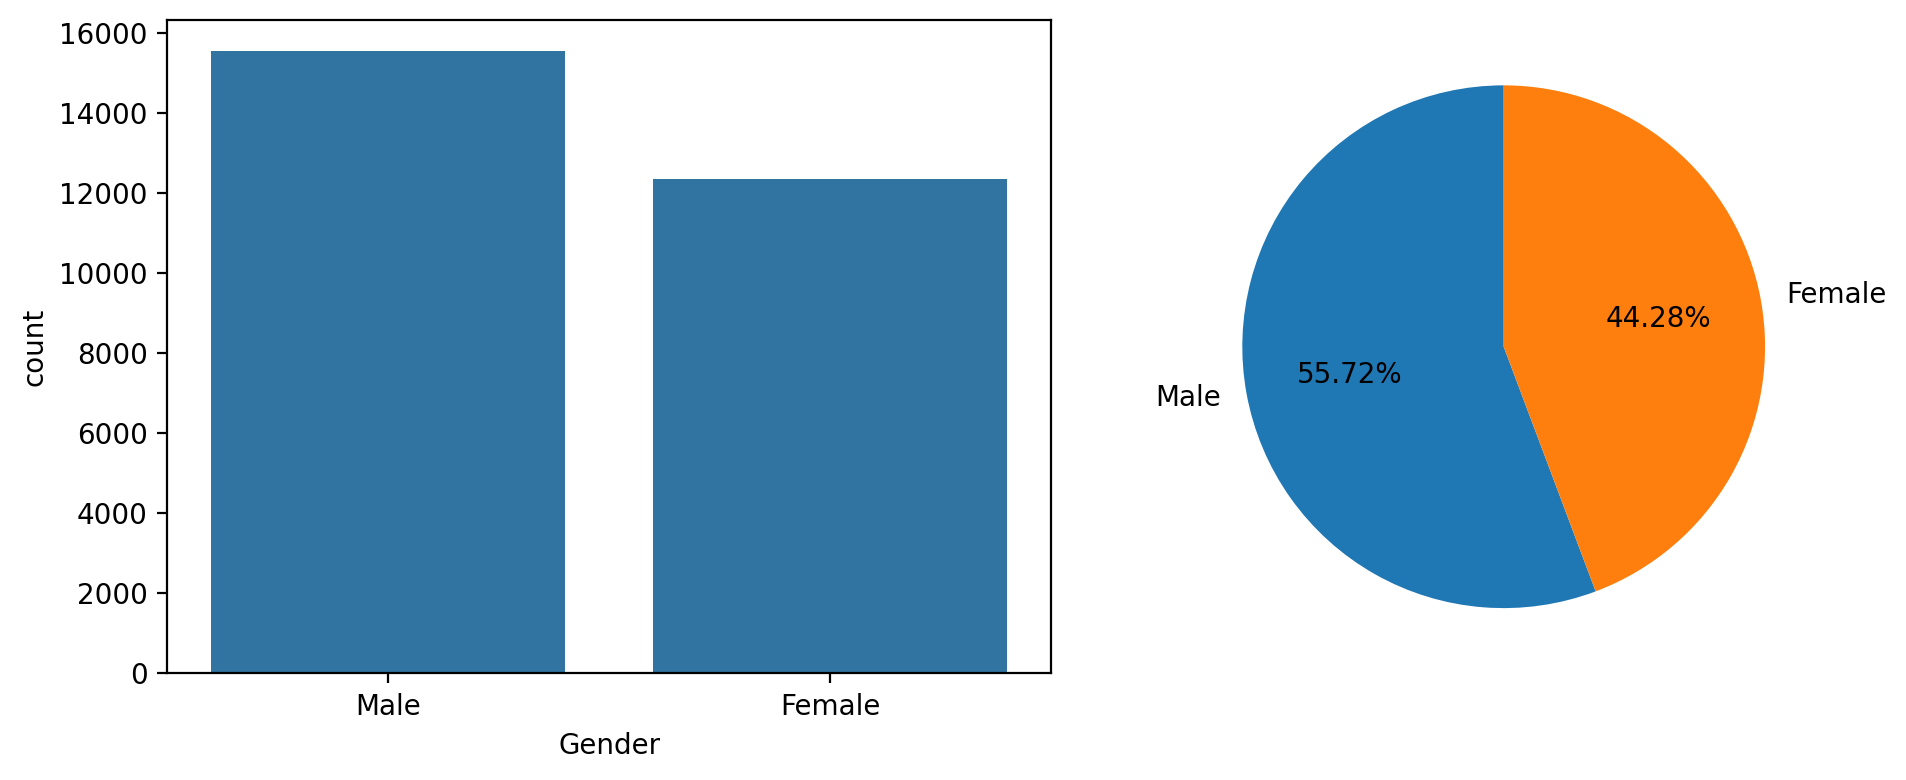

In [5]:
# 1)Gender (범주형) Data 확인
val = 'Gender'
print(depression[val].value_counts())
print('-'*100)
temp = depression[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depression)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct="%.2f%%", startangle=90)

plt.tight_layout()
plt.show()

### 2)Age (수치형)

       count     mean       std   min   25%   50%   75%   max
Age  27901.0  25.8223  4.905687  18.0  21.0  25.0  30.0  59.0
----------------------------------------------------------------------------------------------------


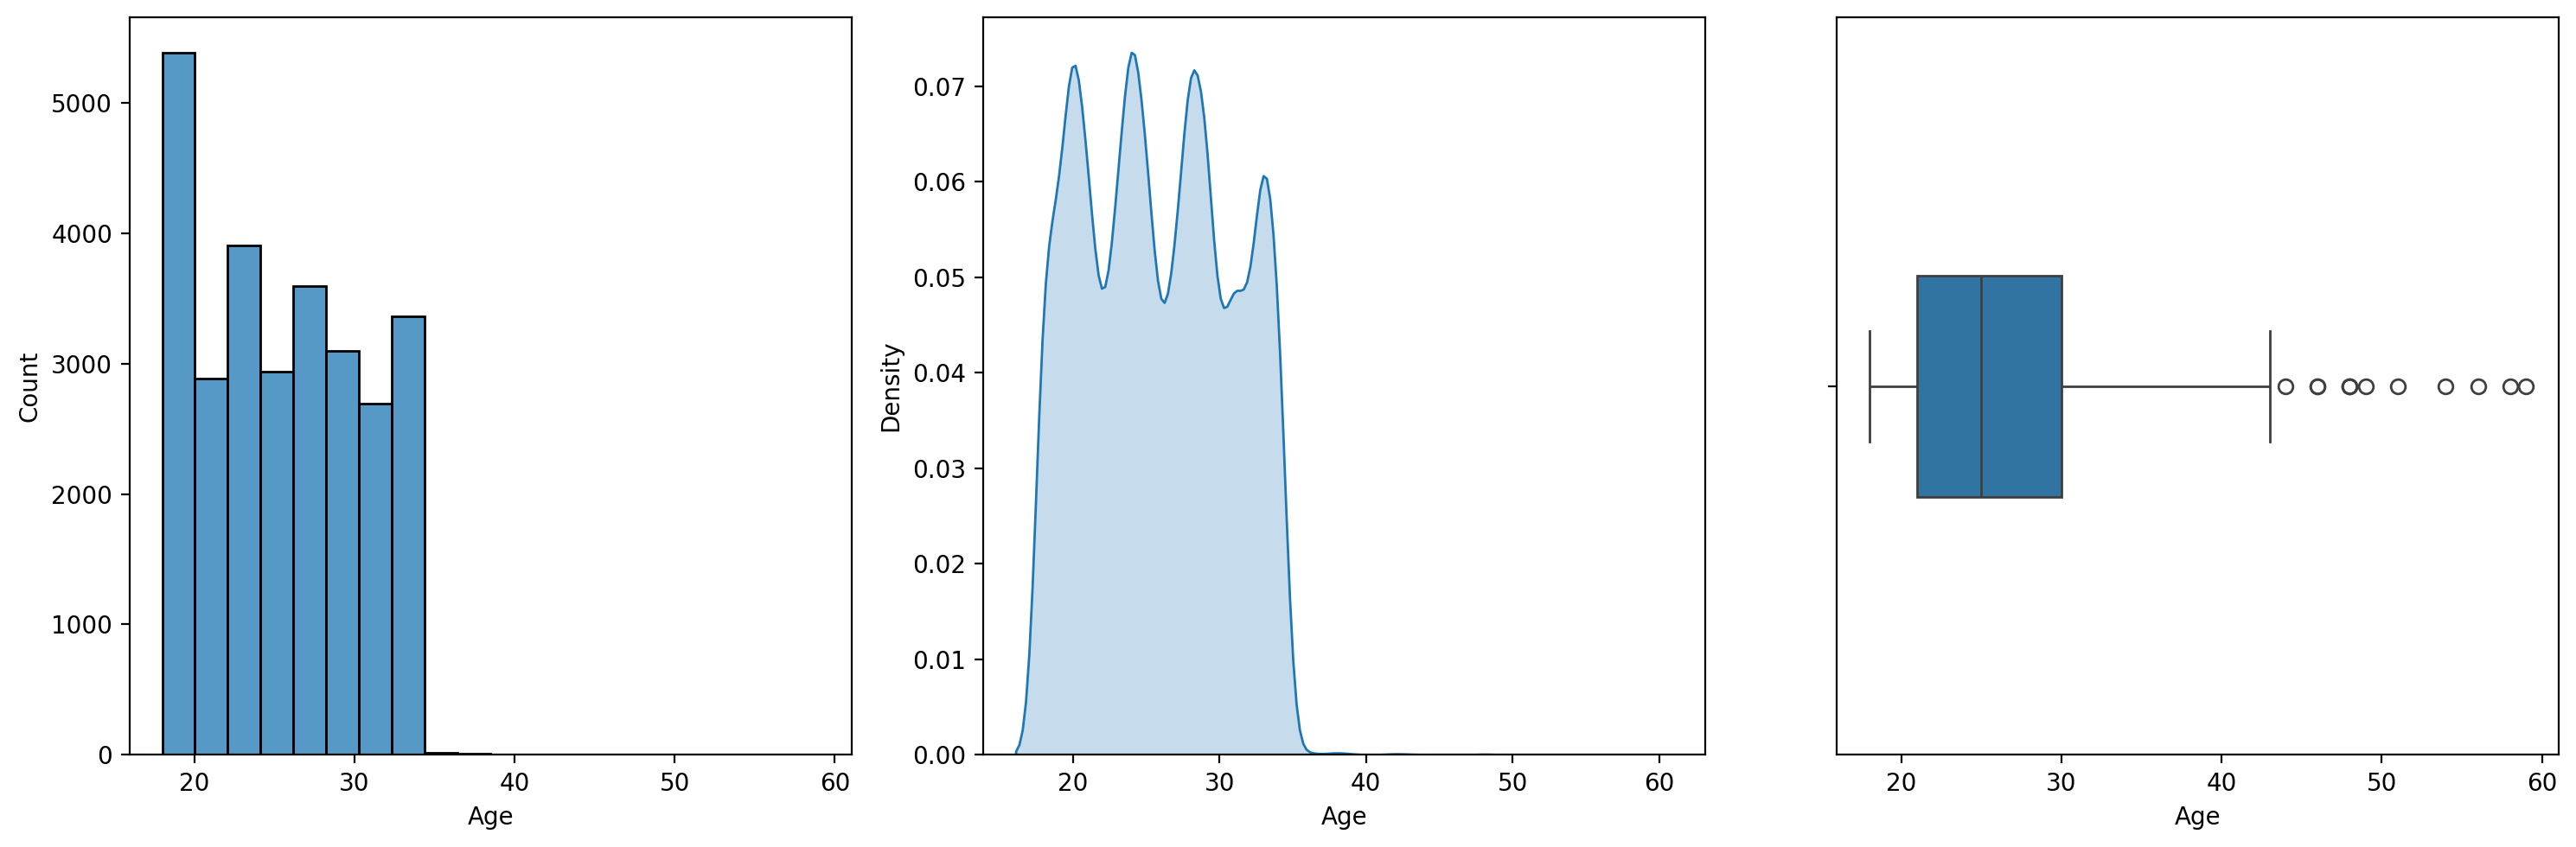

In [6]:
# 2)Age (수치형) Data 확인
val = 'Age'
print(depression[[val]].describe().T)
print('-'*100)
# histplot, kdeplot, boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=val, data=depression, bins=20)
plt.subplot(1, 3, 2)
sns.kdeplot(x=val, data=depression, fill=True)
plt.subplot(1, 3, 3)
sns.boxplot(x=val, data=depression, width=0.3)

plt.tight_layout()
plt.show()

# student만 보고 초등학생~고등학생 어린 학생을 생각했었는데, 고등학생~대학생과 대학원생등을 상대로 조사한 자료인거 같아요.

### 3)City (범주형)

City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
'Less Del

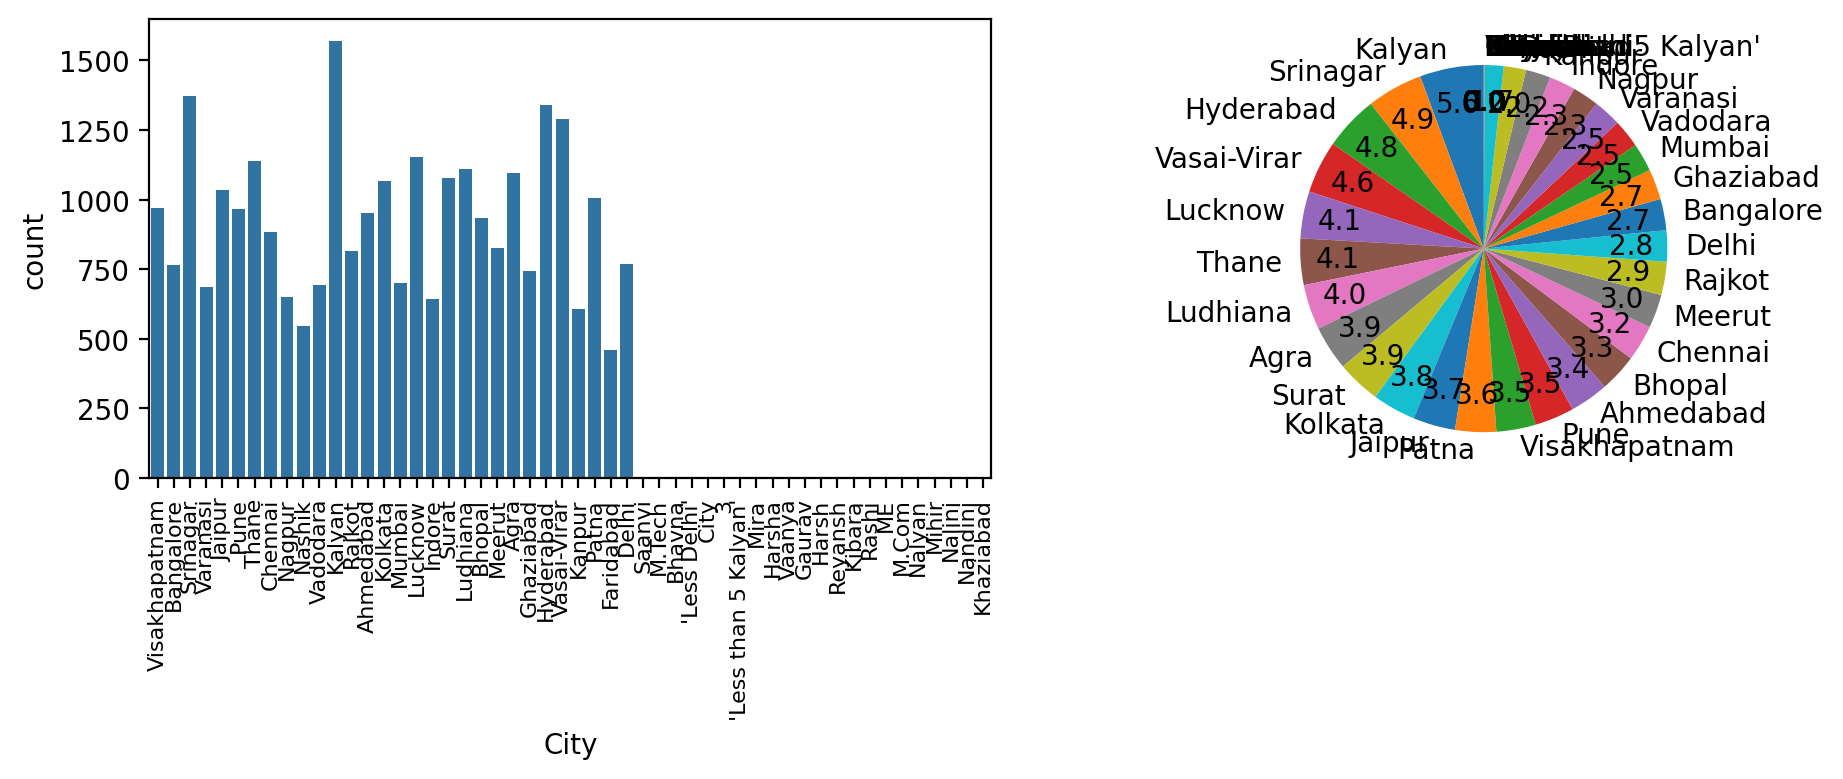

In [7]:
# 3)City (범주형) Data 확인
val = 'City'
print(depression[val].value_counts())
print('-'*100)
temp = depression[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depression)
plt.xticks(rotation=90, fontsize=8)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct='%.1f', startangle=90, pctdistance=0.8)

plt.tight_layout()
plt.show()

# 아래의 데이터를 보면 1~2개의 데이터만 가지고 있는 도시는 삭제하는게 좋을거 같아요.
# GPT에게 아래의 데이터에 대한 정보를 물어보니 이 도시들을 보면 인도(India)가 바로 떠오른다 하네요.
# 모두 인도의 주요 도시들이고, 일부는 인구도 많고 산업 중심지이기도 해요
# Mumbai, Delhi, Bangalore, Hyderabad, Kolkata, Chennai → 인도의 6대 대도시
# Lucknow, Jaipur, Ahmedabad, Pune, Surat → 인구 많고 성장 중인 도시들
# Kalyan, Vasai-Virar, Thane → Mumbai 근교 대규모 주거지

### 4)Profession (범주형)

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


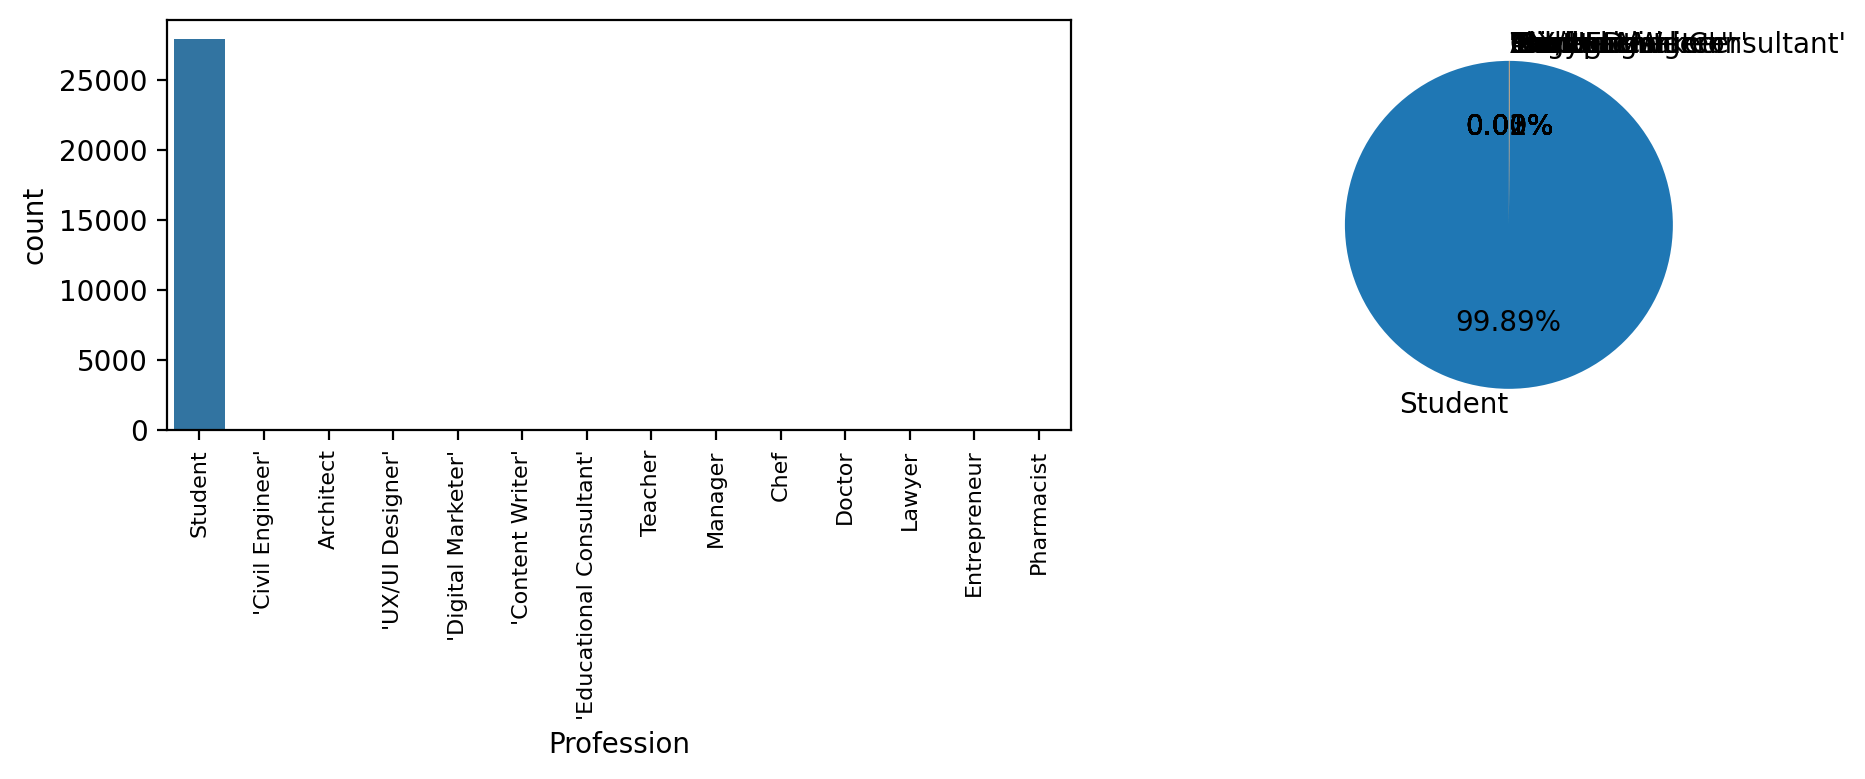

In [8]:
# 4)Profession (범주형) Data 확인
val = 'Profession'
print(depression[val].value_counts())
print('-'*100)
temp = depression[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depression)
plt.xticks(rotation=90, fontsize=8)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct="%.2f%%", startangle=90)

plt.tight_layout()
plt.show()

# 아래의 데이터를 보면 Student 항목을 제외하고 사용하는게 좋을거 같아요.

### 5)Academic Pressure 학업 스트레스 수준 (수치형)

                     count      mean       std  min  25%  50%  75%  max
Academic Pressure  27901.0  3.141214  1.381465  0.0  2.0  3.0  4.0  5.0
----------------------------------------------------------------------------------------------------


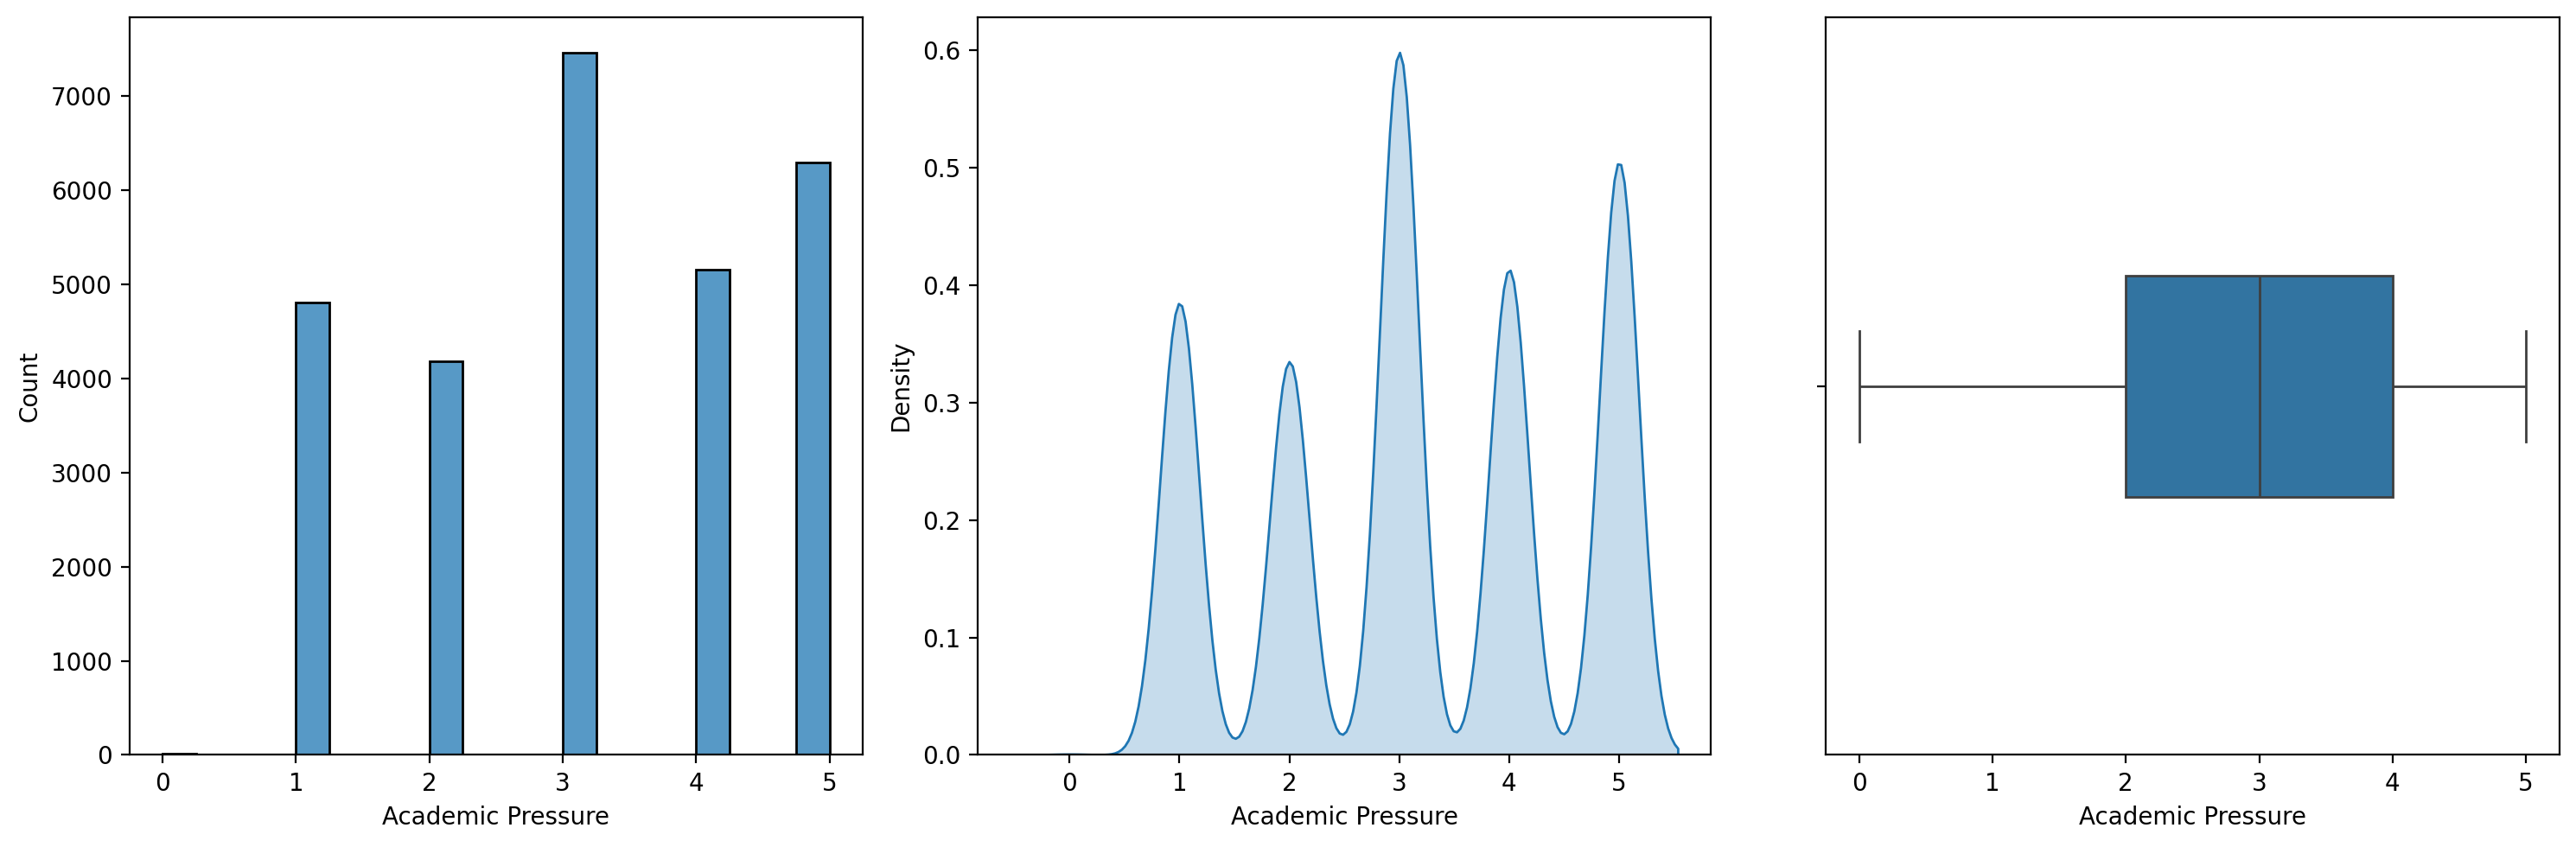

In [9]:
# 5)Academic Pressure 학업 스트레스 수준 (수치형) Data 확인
val = 'Academic Pressure'
print(depression[[val]].describe().T)
print('-'*100)
# histplot, kdeplot, boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=val, data=depression, bins=20)
plt.subplot(1, 3, 2)
sns.kdeplot(x=val, data=depression, fill=True)
plt.subplot(1, 3, 3)
sns.boxplot(x=val, data=depression, width=0.3)

plt.tight_layout()
plt.show()

### 6)Work Pressure 직업 스트레스 수준 (수치형)

                 count     mean       std  min  25%  50%  75%  max
Work Pressure  27901.0  0.00043  0.043992  0.0  0.0  0.0  0.0  5.0
----------------------------------------------------------------------------------------------------


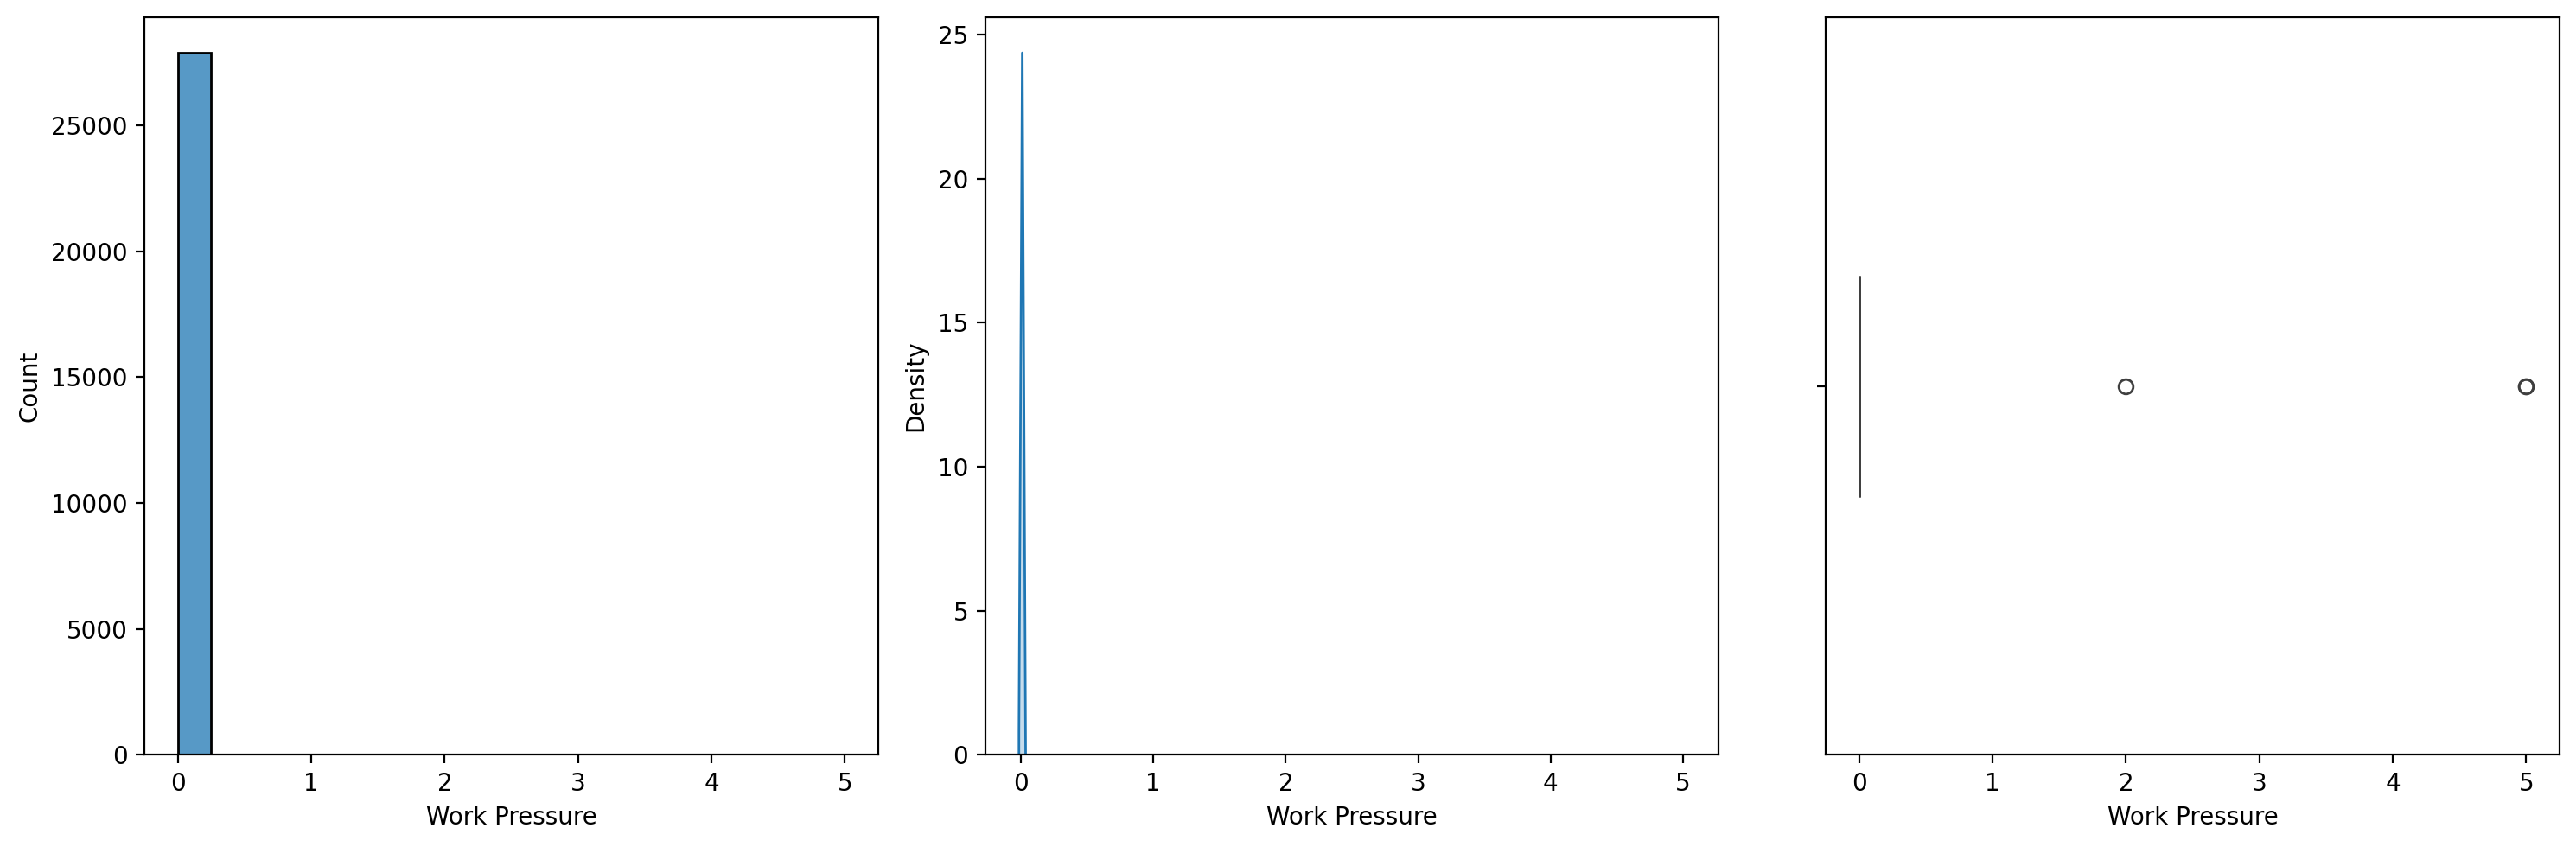

In [10]:
# 6)Work Pressure 직업 스트레스 수준 (수치형)
val = 'Work Pressure'
print(depression[[val]].describe().T)
print('-'*100)
# histplot, kdeplot, boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=val, data=depression, bins=20)
plt.subplot(1, 3, 2)
sns.kdeplot(x=val, data=depression, fill=True)
plt.subplot(1, 3, 3)
sns.boxplot(x=val, data=depression, width=0.3)

plt.tight_layout()
plt.show()

# 학생들이 대부분이라 불필요한 컬럼이 되어버린거 같아요.

### 7)CGPA 대학 평점(수치형)

        count      mean       std  min   25%   50%   75%   max
CGPA  27901.0  7.656104  1.470707  0.0  6.29  7.77  8.92  10.0
----------------------------------------------------------------------------------------------------


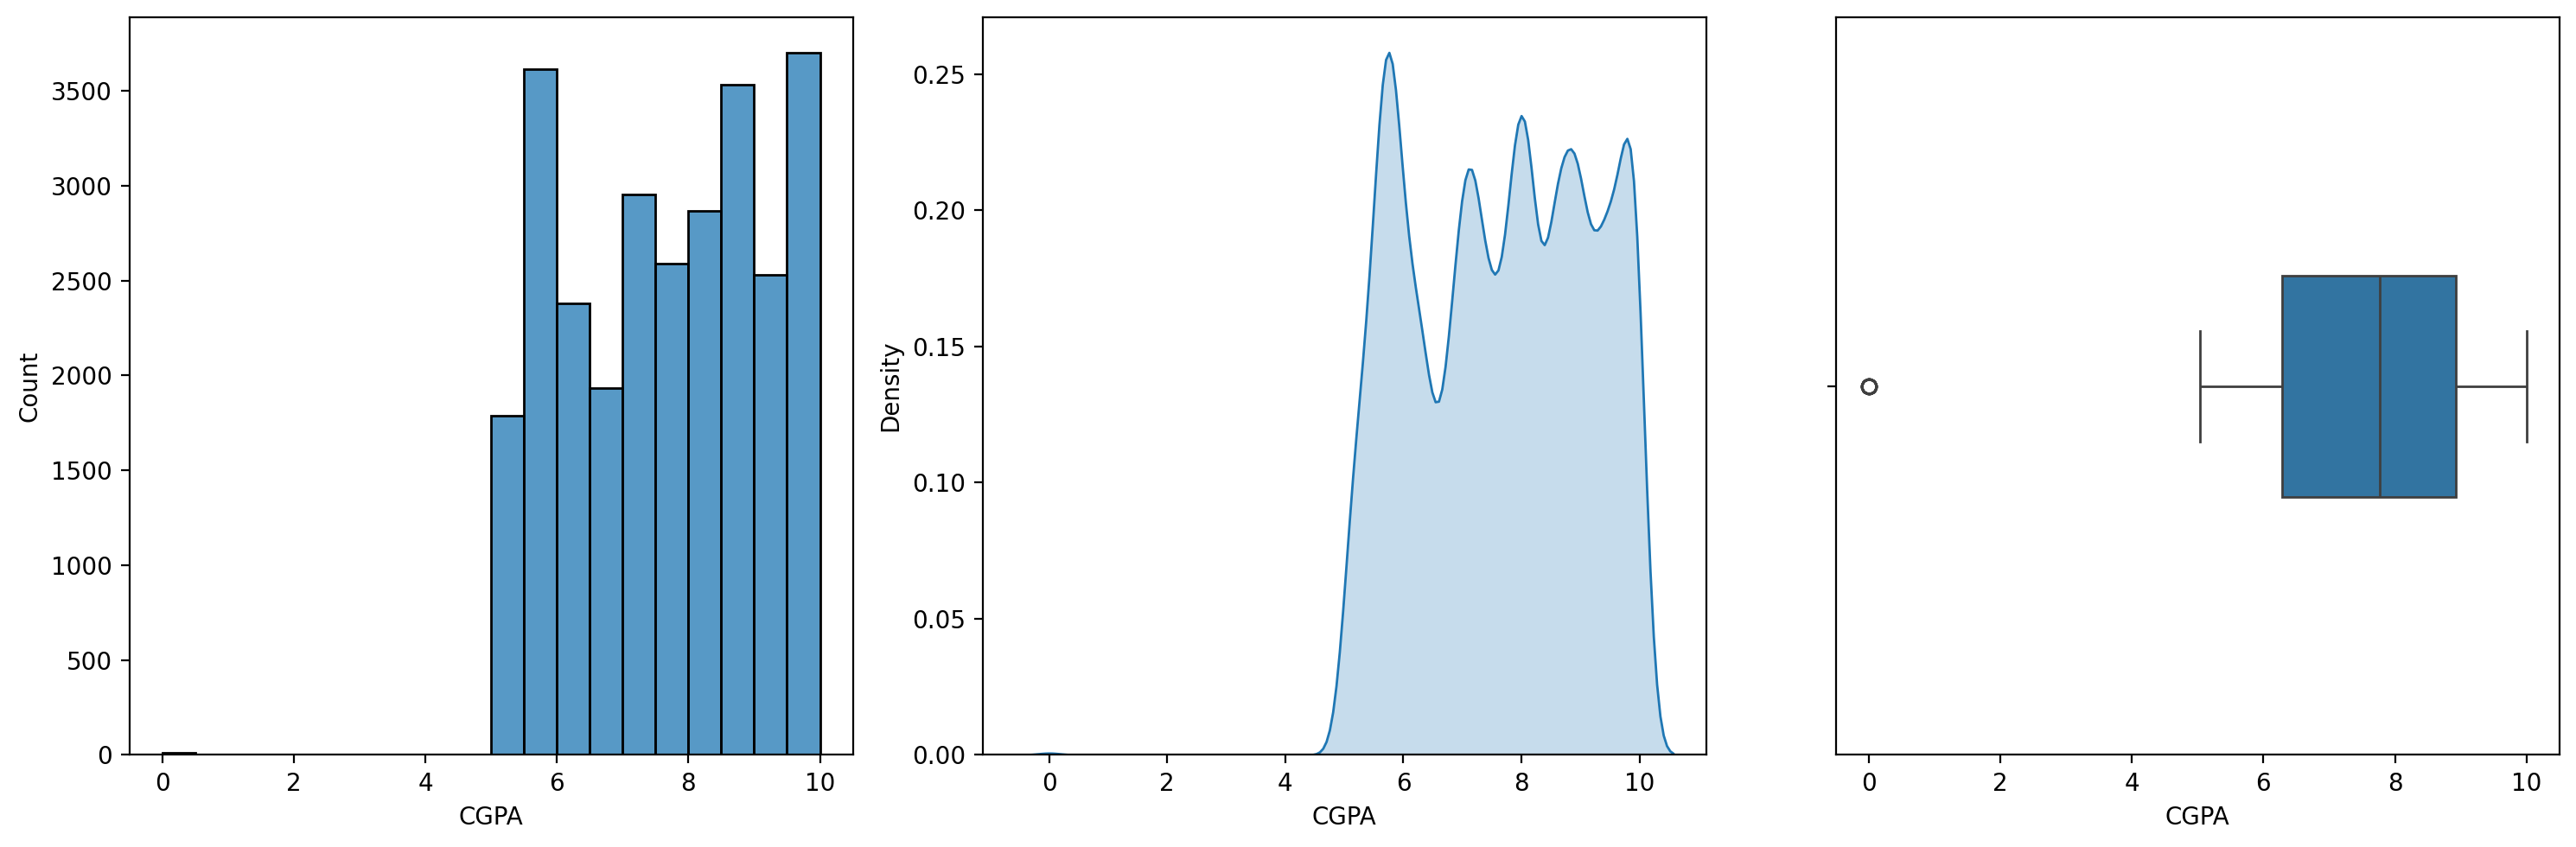

In [11]:
# 7)CGPA 대학 평점(수치형)
val = 'CGPA'
print(depression[[val]].describe().T)
print('-'*100)
# histplot, kdeplot, boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=val, data=depression, bins=20)
plt.subplot(1, 3, 2)
sns.kdeplot(x=val, data=depression, fill=True)
plt.subplot(1, 3, 3)
sns.boxplot(x=val, data=depression, width=0.3)

plt.tight_layout()
plt.show()
# 학점이 너무 낮은 이상치를 지워야 될거 같아요.

### 8)Study Satisfaction 학업 만족도(수치형)

                      count      mean       std  min  25%  50%  75%  max
Study Satisfaction  27901.0  2.943837  1.361148  0.0  2.0  3.0  4.0  5.0
----------------------------------------------------------------------------------------------------


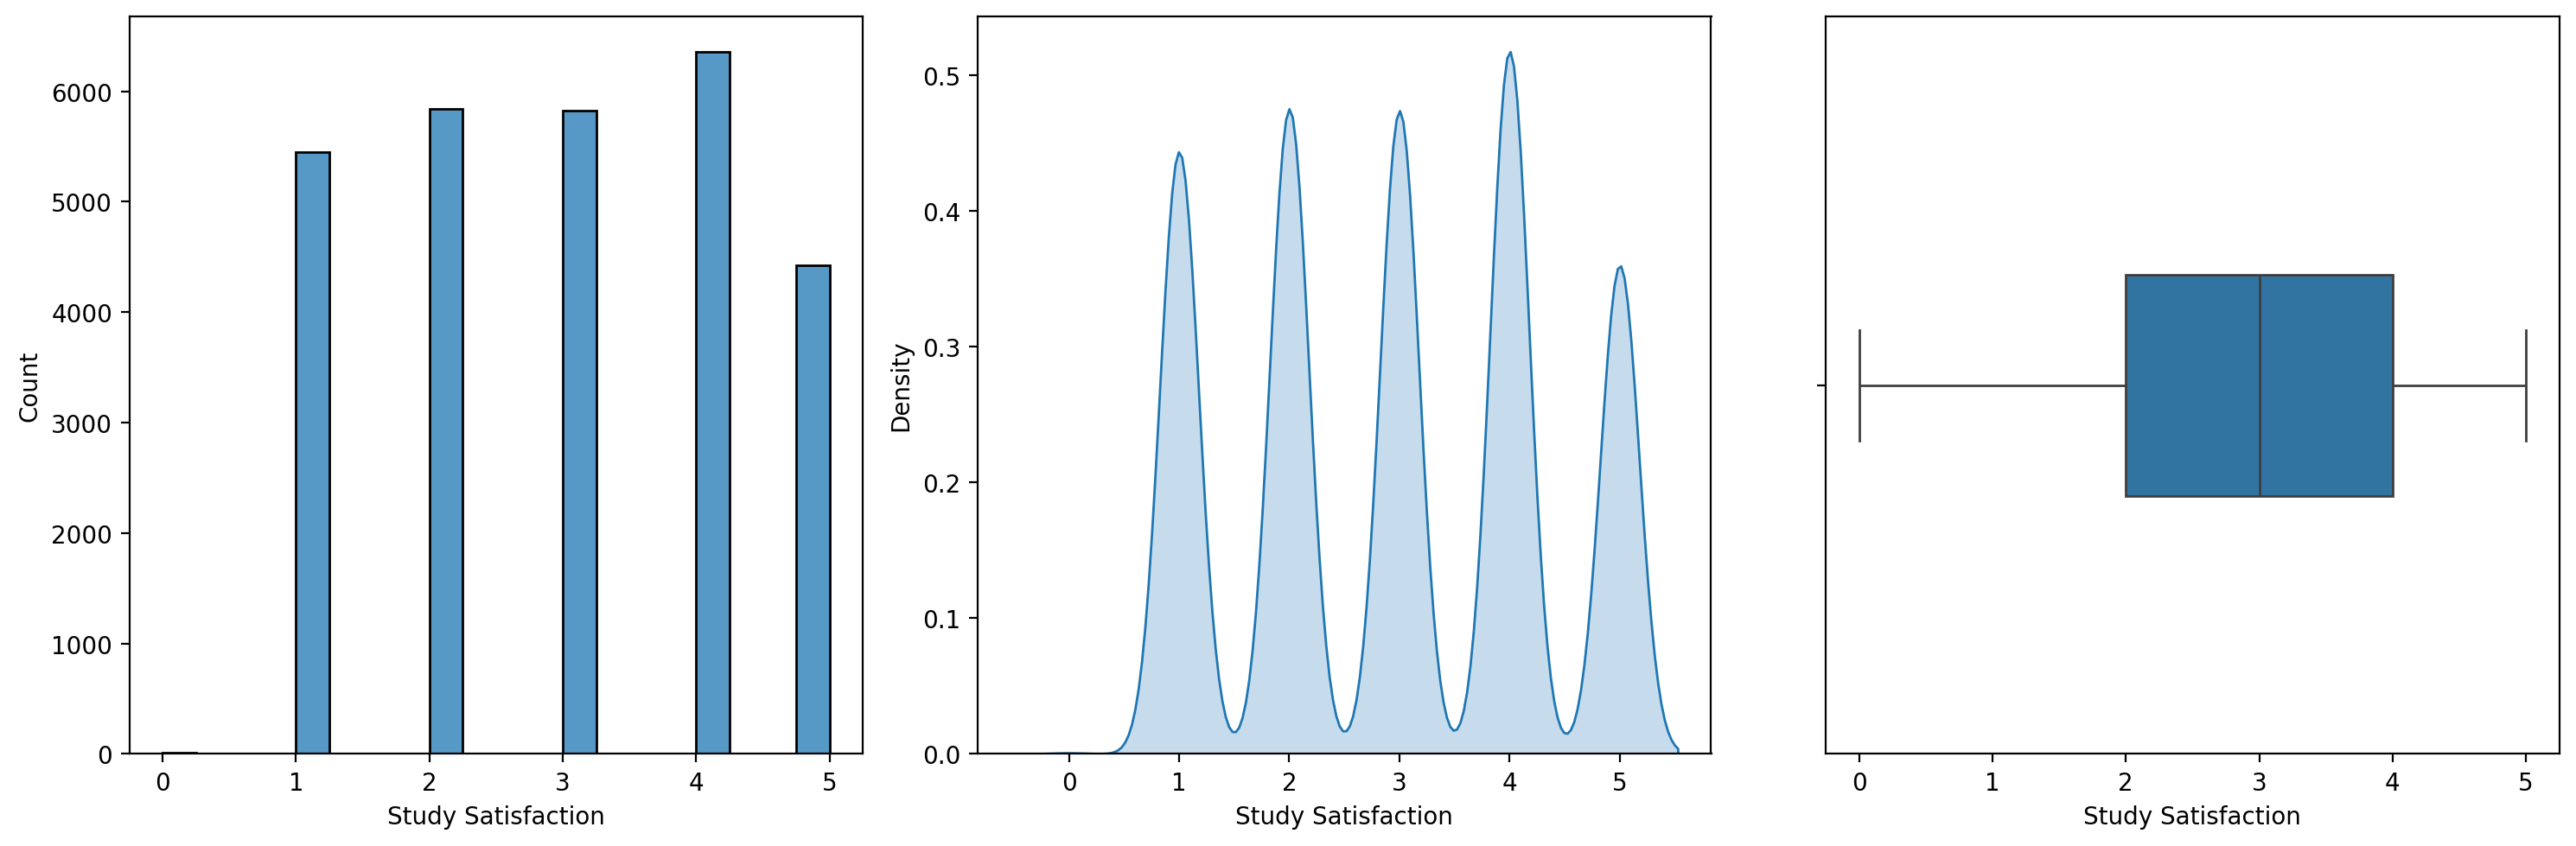

In [12]:
# 8)Study Satisfaction 학업 만족도(수치형)
val = 'Study Satisfaction'
print(depression[[val]].describe().T)
print('-'*100)
# histplot, kdeplot, boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=val, data=depression, bins=20)
plt.subplot(1, 3, 2)
sns.kdeplot(x=val, data=depression, fill=True)
plt.subplot(1, 3, 3)
sns.boxplot(x=val, data=depression, width=0.3)

plt.tight_layout()
plt.show()

### 9)Job Satisfaction 직업 만족도(수치형)

                    count      mean       std  min  25%  50%  75%  max
Job Satisfaction  27901.0  0.000681  0.044394  0.0  0.0  0.0  0.0  4.0
----------------------------------------------------------------------------------------------------


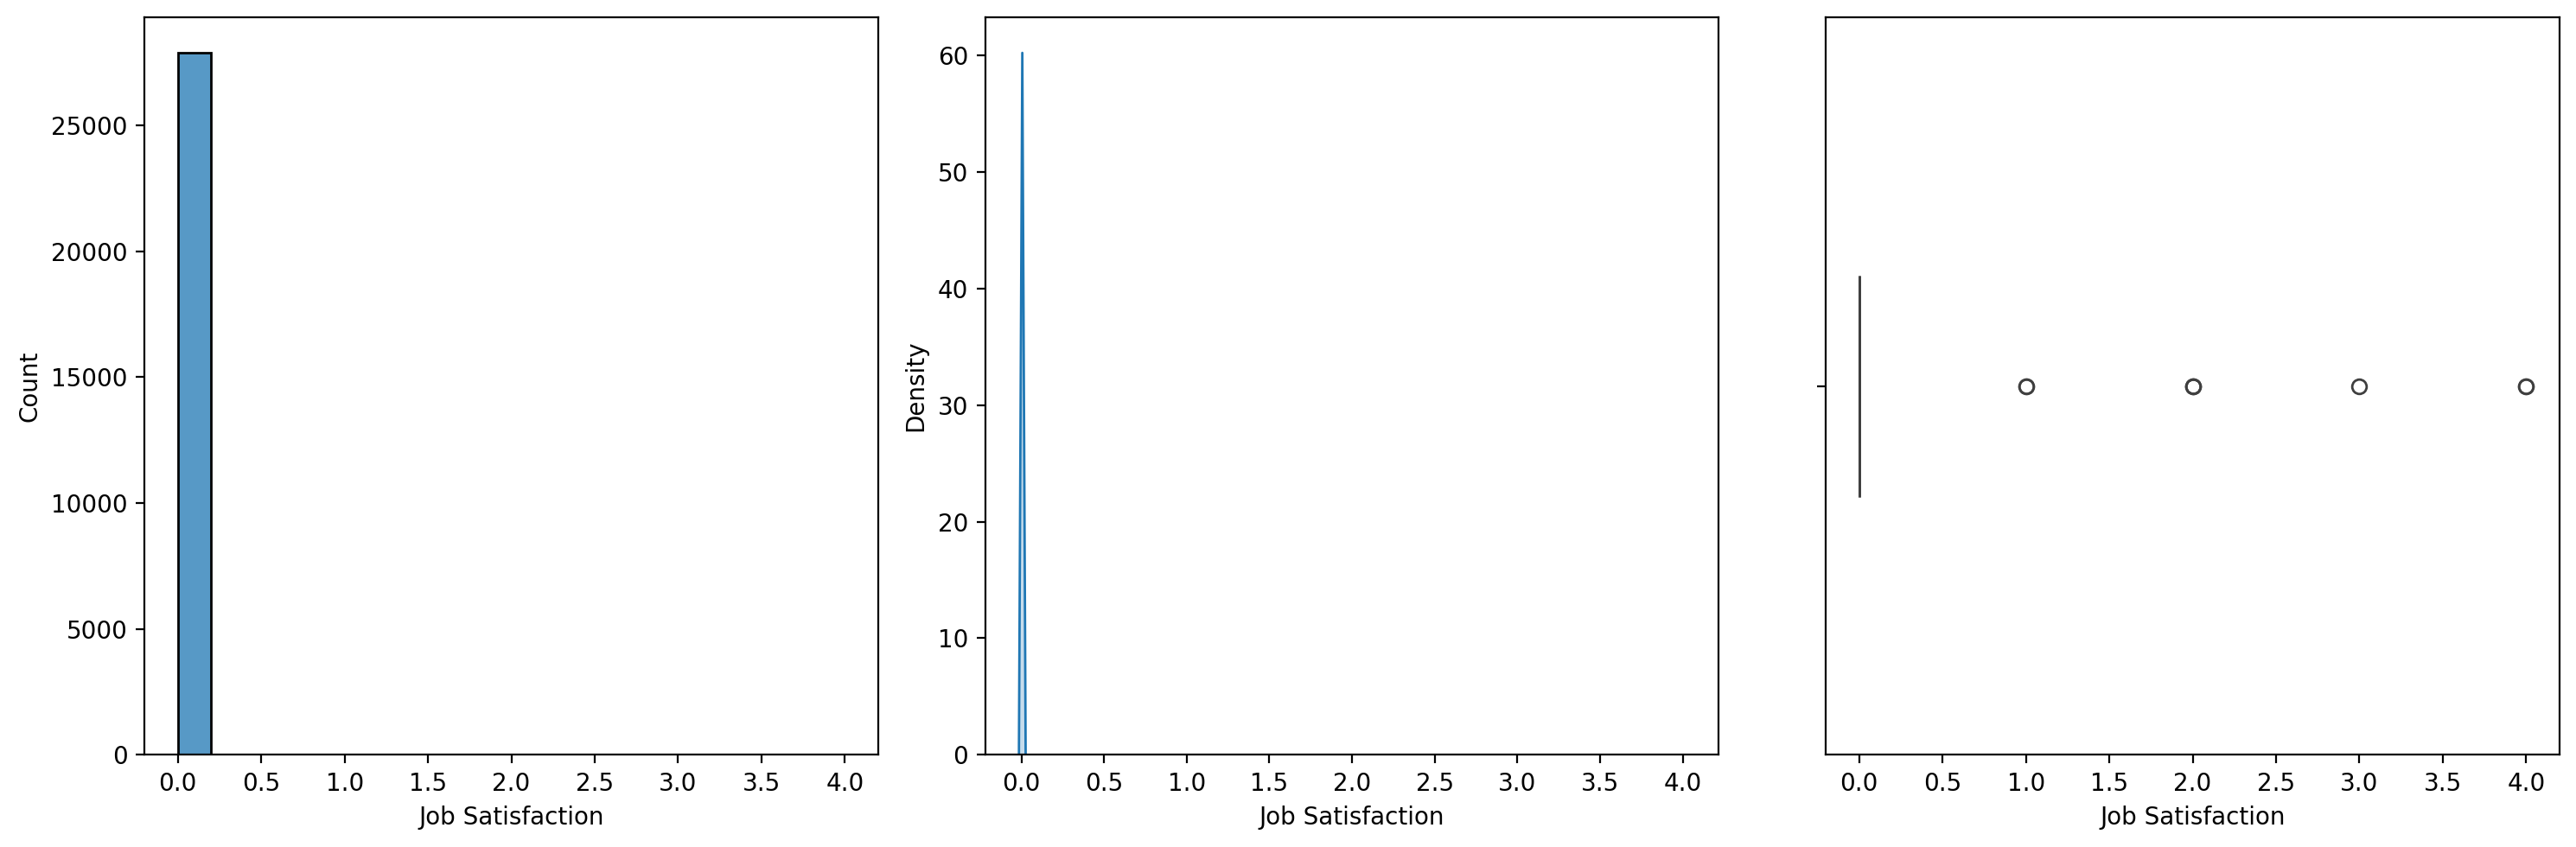

In [13]:
# 9)Job Satisfaction 직업 만족도(수치형)
val = 'Job Satisfaction'
print(depression[[val]].describe().T)
print('-'*100)
# histplot, kdeplot, boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=val, data=depression, bins=20)
plt.subplot(1, 3, 2)
sns.kdeplot(x=val, data=depression, fill=True)
plt.subplot(1, 3, 3)
sns.boxplot(x=val, data=depression, width=0.3)

plt.tight_layout()
plt.show()
# 학생들이 대부분이라 불필요한 컬럼이 된거 같아요.

### 10)Sleep Duration 평균 수면 시간 (범주형)

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


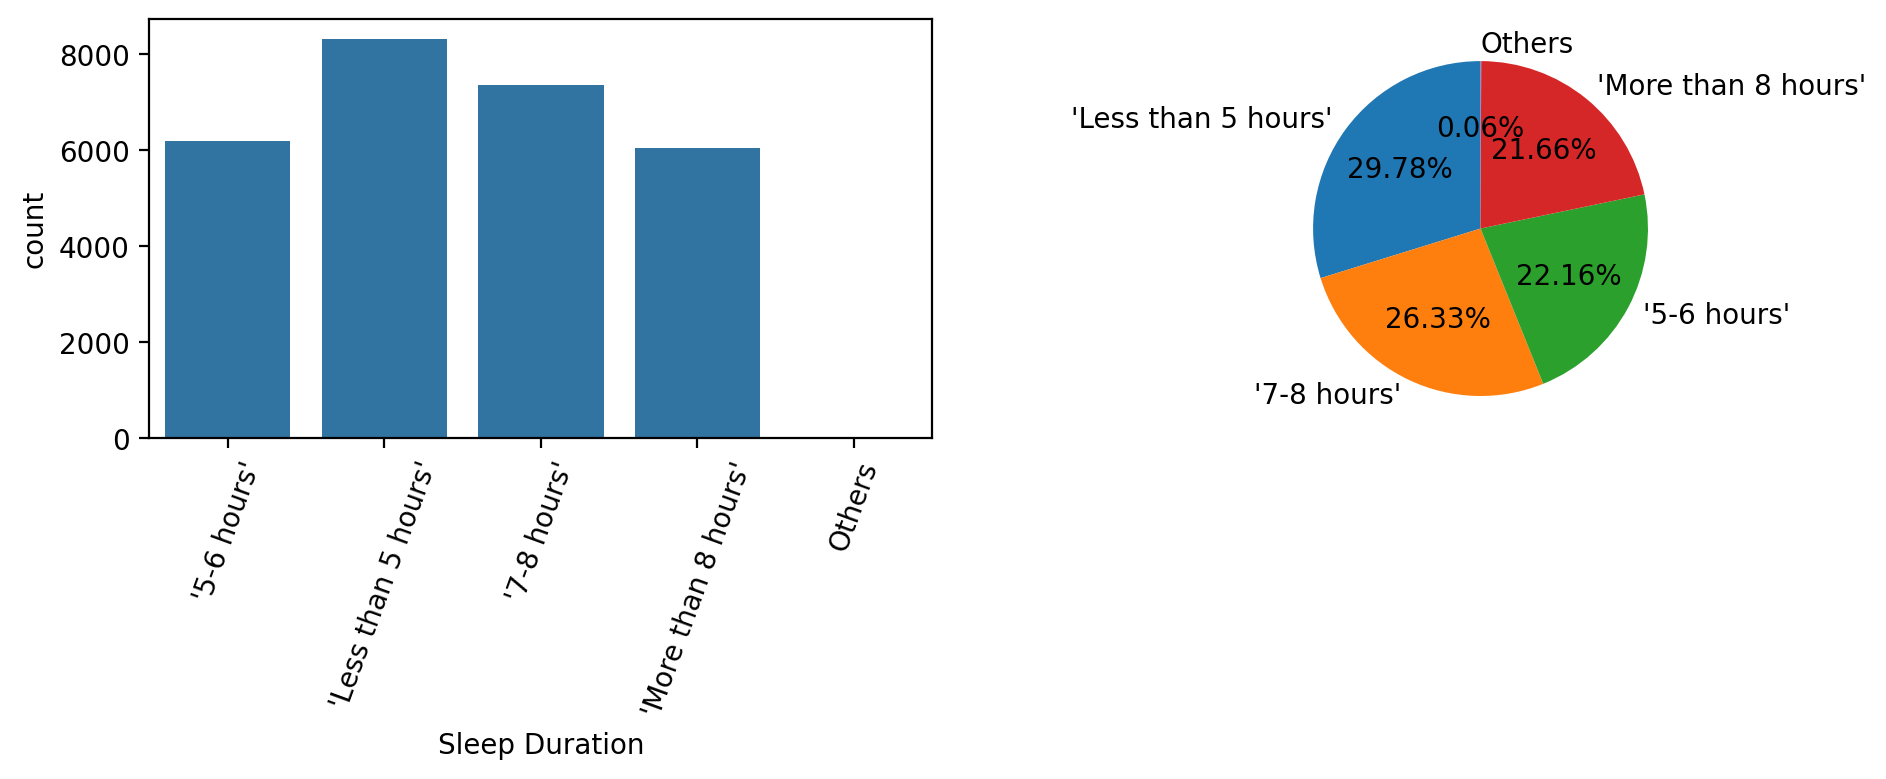

In [14]:
# 10)Sleep Duration 평균 수면 시간 (범주형)
val = 'Sleep Duration'
print(depression[val].value_counts())
print('-'*100)
temp = depression[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depression)
plt.xticks(rotation=70)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct="%.2f%%", startangle=90)

plt.tight_layout()
plt.show()

# 평균적인 수면 시간이 되게 적어보이네요.

### 11)Dietary Habits 식습관(범주형)

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


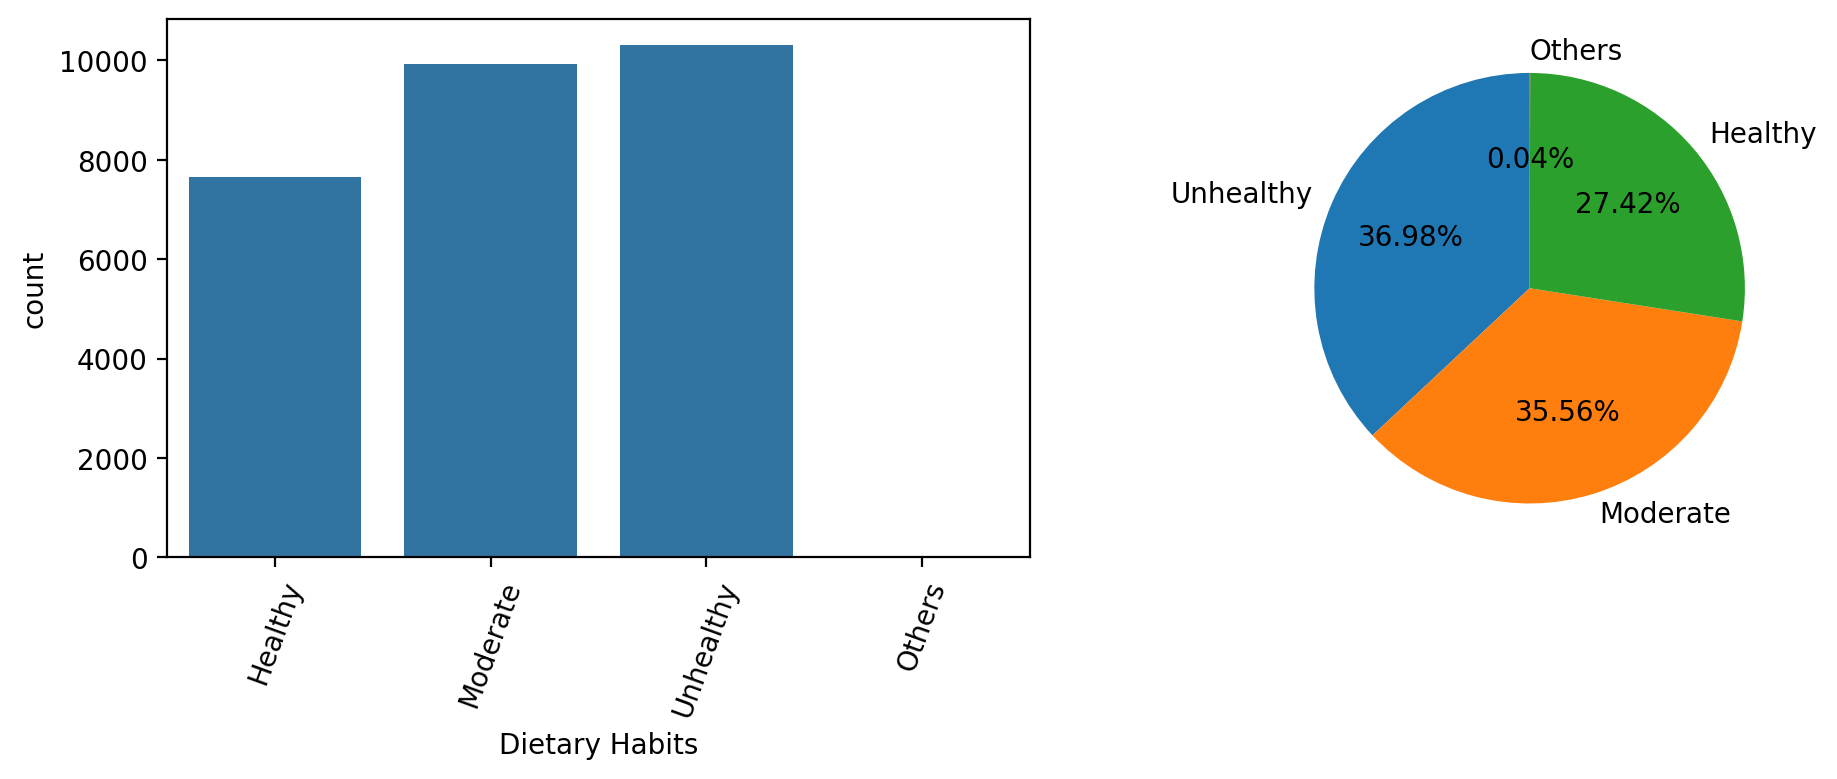

In [15]:
# 11)Dietary Habits 식습관(범주형)
val = 'Dietary Habits'
print(depression[val].value_counts())
print('-'*100)
temp = depression[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depression)
plt.xticks(rotation=70)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct="%.2f%%", startangle=90)

plt.tight_layout()
plt.show()

### 12)Degree 학위명 (범주형)

Degree
'Class 12'    6080
B.Ed          1867
B.Com         1506
B.Arch        1478
BCA           1433
MSc           1190
B.Tech        1152
MCA           1044
M.Tech        1022
BHM            925
BSc            888
M.Ed           821
B.Pharm        810
M.Com          734
BBA            696
MBBS           696
LLB            671
BE             613
BA             600
M.Pharm        582
MD             572
MBA            562
MA             544
PhD            522
LLM            482
MHM            191
ME             185
Others          35
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


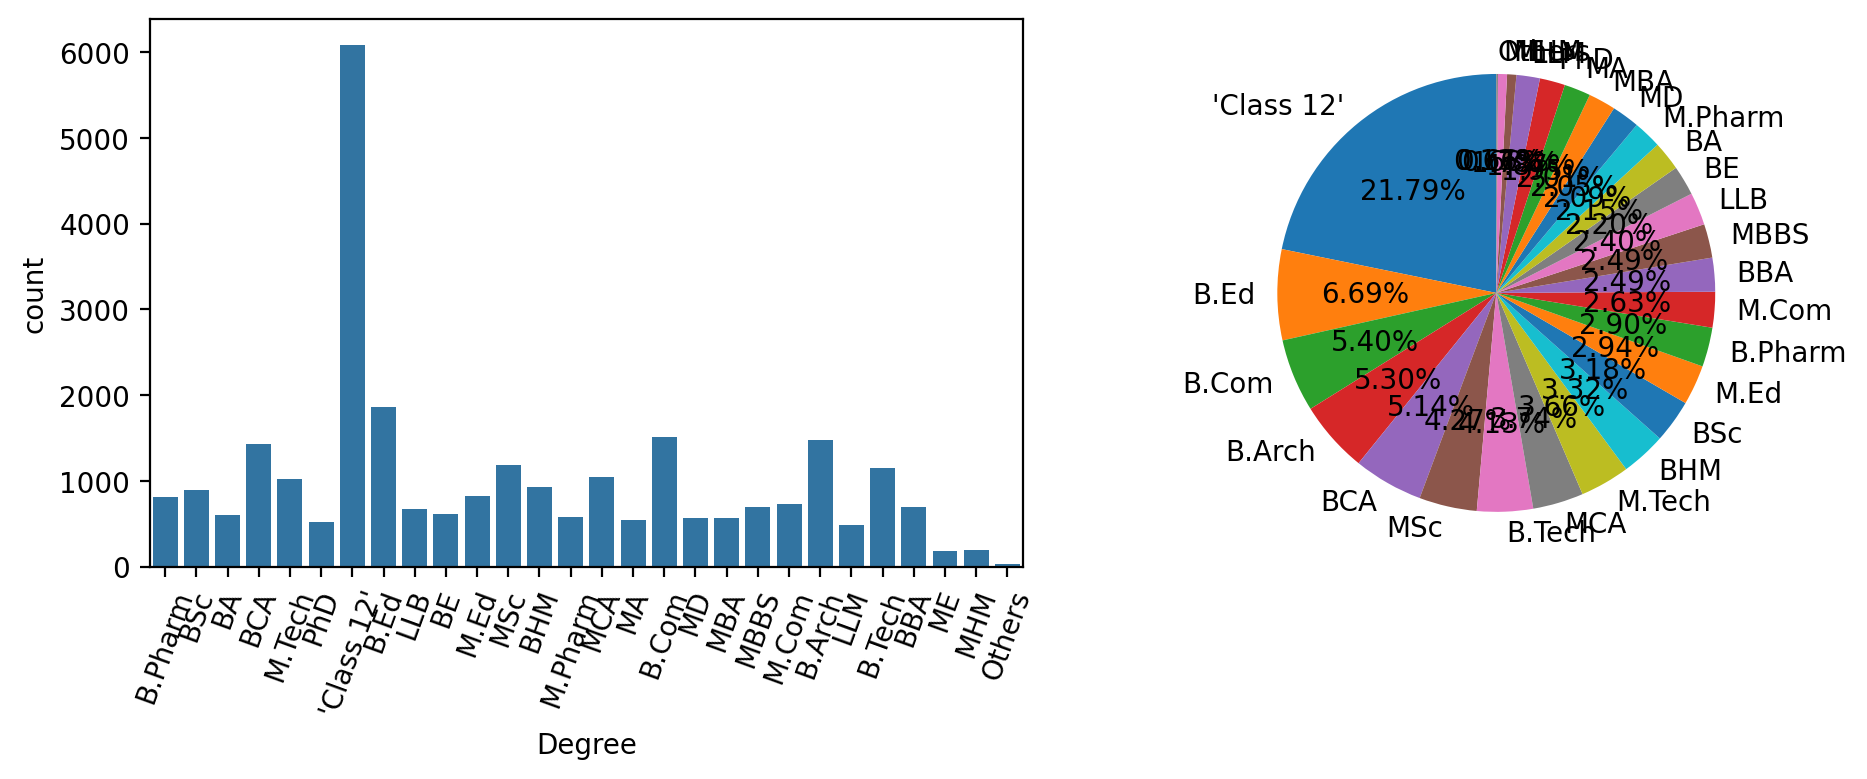

In [16]:
# 12)Degree 학위명 (범주형)
val = 'Degree'
print(depression[val].value_counts())
print('-'*100)
temp = depression[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depression)
plt.xticks(rotation=70)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct="%.2f%%", startangle=90)

plt.tight_layout()
plt.show()

# Class12가 뭔지 몰라서 찾아보니 고등학교 12학년 수준 (한국 기준: 고3 졸업 혹은 수험생 정도) 라고 하네요.

### 13)Have you ever had suicidal thoughts? 자살 생각 여부(범주형)

Have you ever had suicidal thoughts ?
Yes    17656
No     10245
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


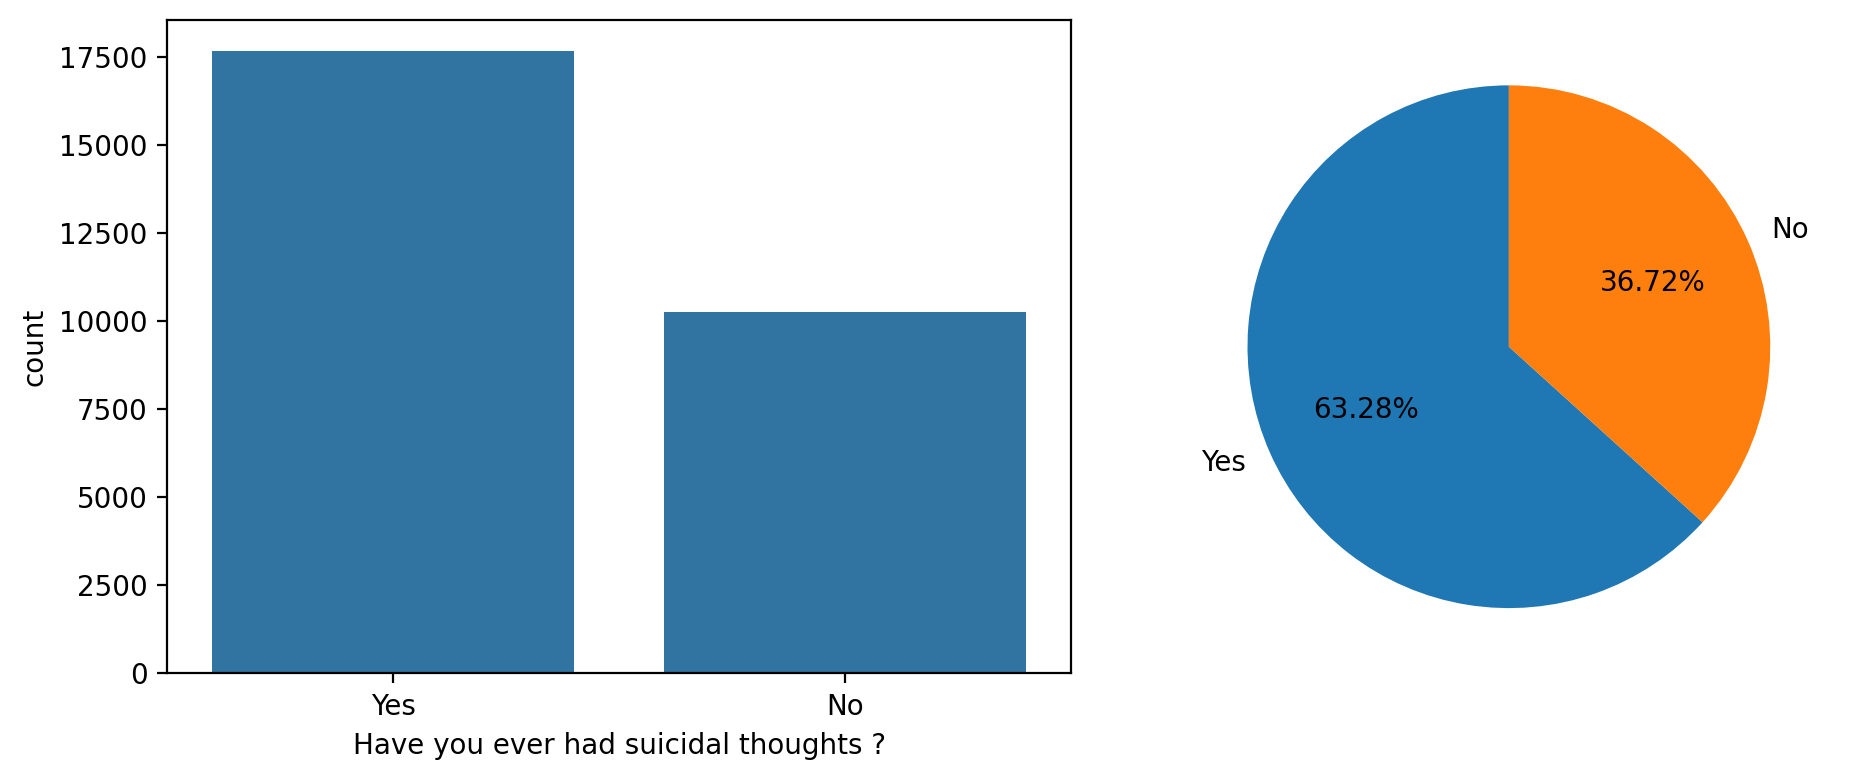

In [17]:
# 13)Have you ever had suicidal thoughts? 자살 생각 여부(범주형)
val = 'Have you ever had suicidal thoughts ?'
print(depression[val].value_counts())
print('-'*100)
temp = depression[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depression)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct="%.2f%%", startangle=90)

plt.tight_layout()
plt.show()

# 자살 생각 여부에 대한 답변인데 저의 생각보다 높은 평균 수치네요 ㅠ.ㅠ

### 14)Work/Study Hours (수치형)

                    count      mean       std  min  25%  50%   75%   max
Work/Study Hours  27901.0  7.156984  3.707642  0.0  4.0  8.0  10.0  12.0
----------------------------------------------------------------------------------------------------


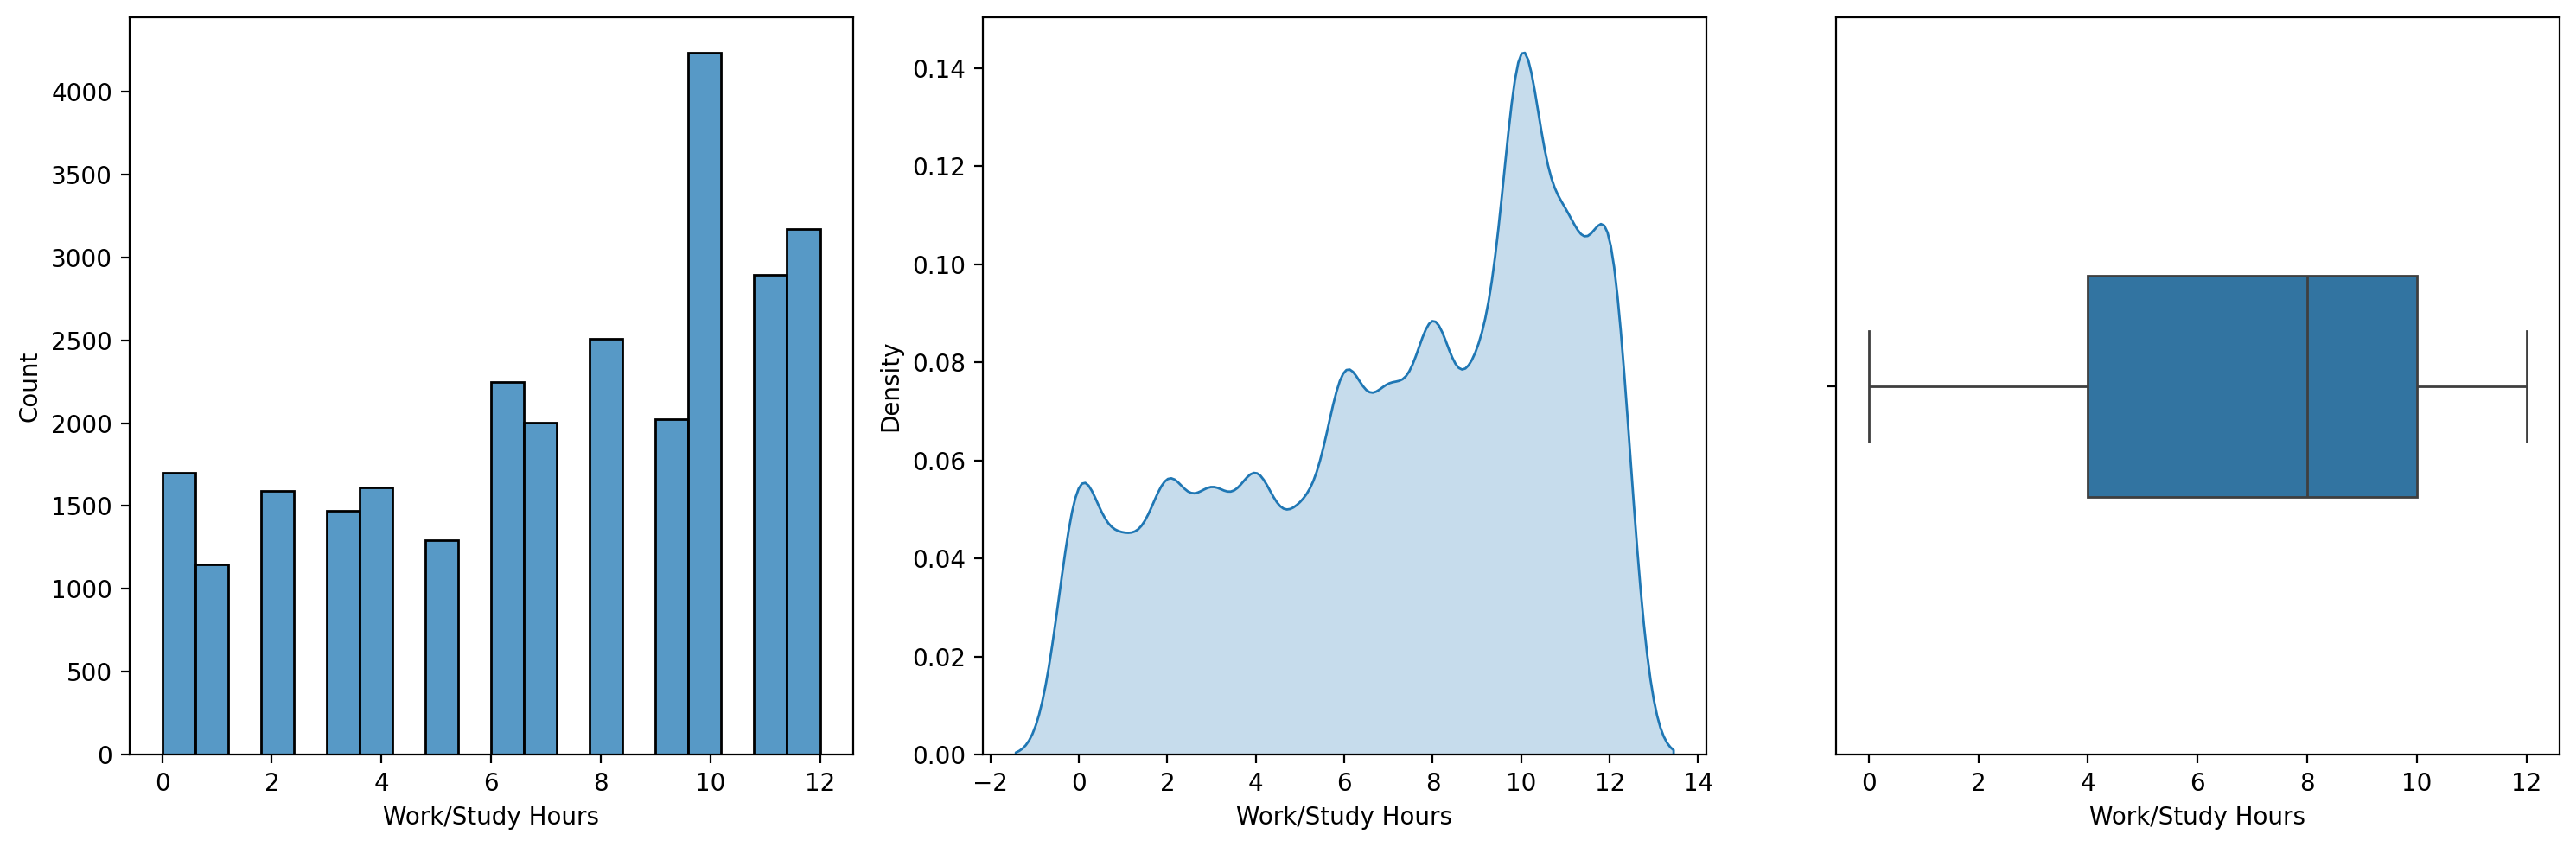

In [18]:
# 14)Work/Study Hours 하루 평균 업무/공부 시간(수치형)
val = 'Work/Study Hours'
print(depression[[val]].describe().T)
print('-'*100)
# histplot, kdeplot, boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=val, data=depression, bins=20)
plt.subplot(1, 3, 2)
sns.kdeplot(x=val, data=depression, fill=True)
plt.subplot(1, 3, 3)
sns.boxplot(x=val, data=depression, width=0.3)

plt.tight_layout()
plt.show()

### 15)Financial Stress 경제적 스트레스 (범주형)

Financial Stress
5    6715
4    5775
3    5226
1    5121
2    5061
?       3
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


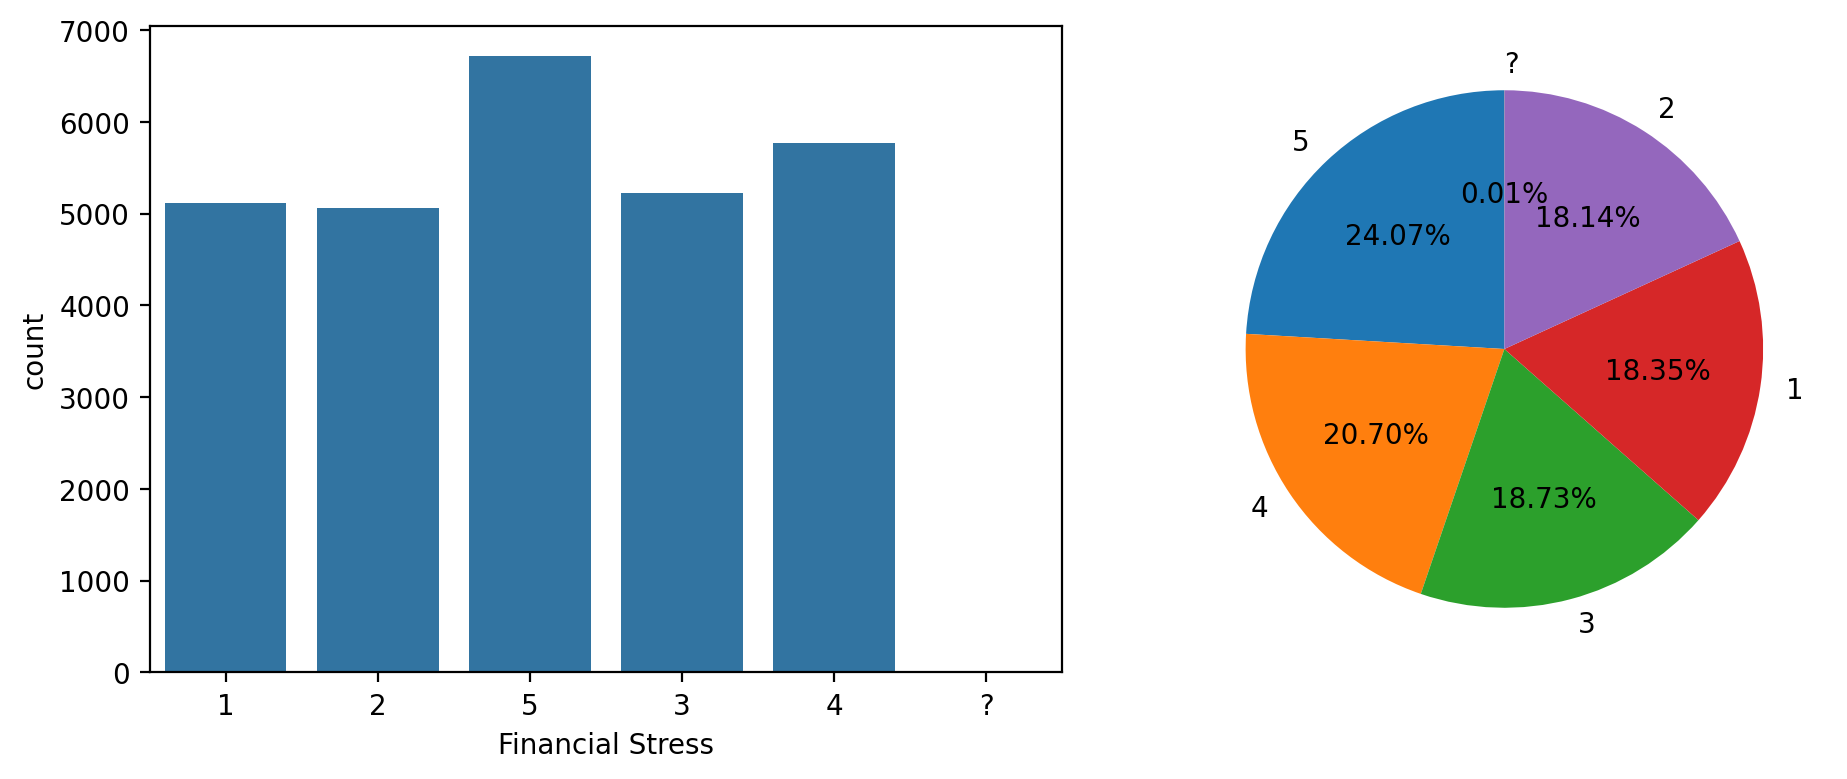

In [19]:
# 15)Financial Stress 경제적 스트레스 (범주형)
val = 'Financial Stress'
print(depression[val].value_counts())
print('-'*100)
temp = depression[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depression)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct="%.2f%%", startangle=90)

plt.tight_layout()
plt.show()

### 16)Family History of Mental Illness 가족의 정신질환 병력 여부 (범주형)

Family History of Mental Illness
No     14398
Yes    13503
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


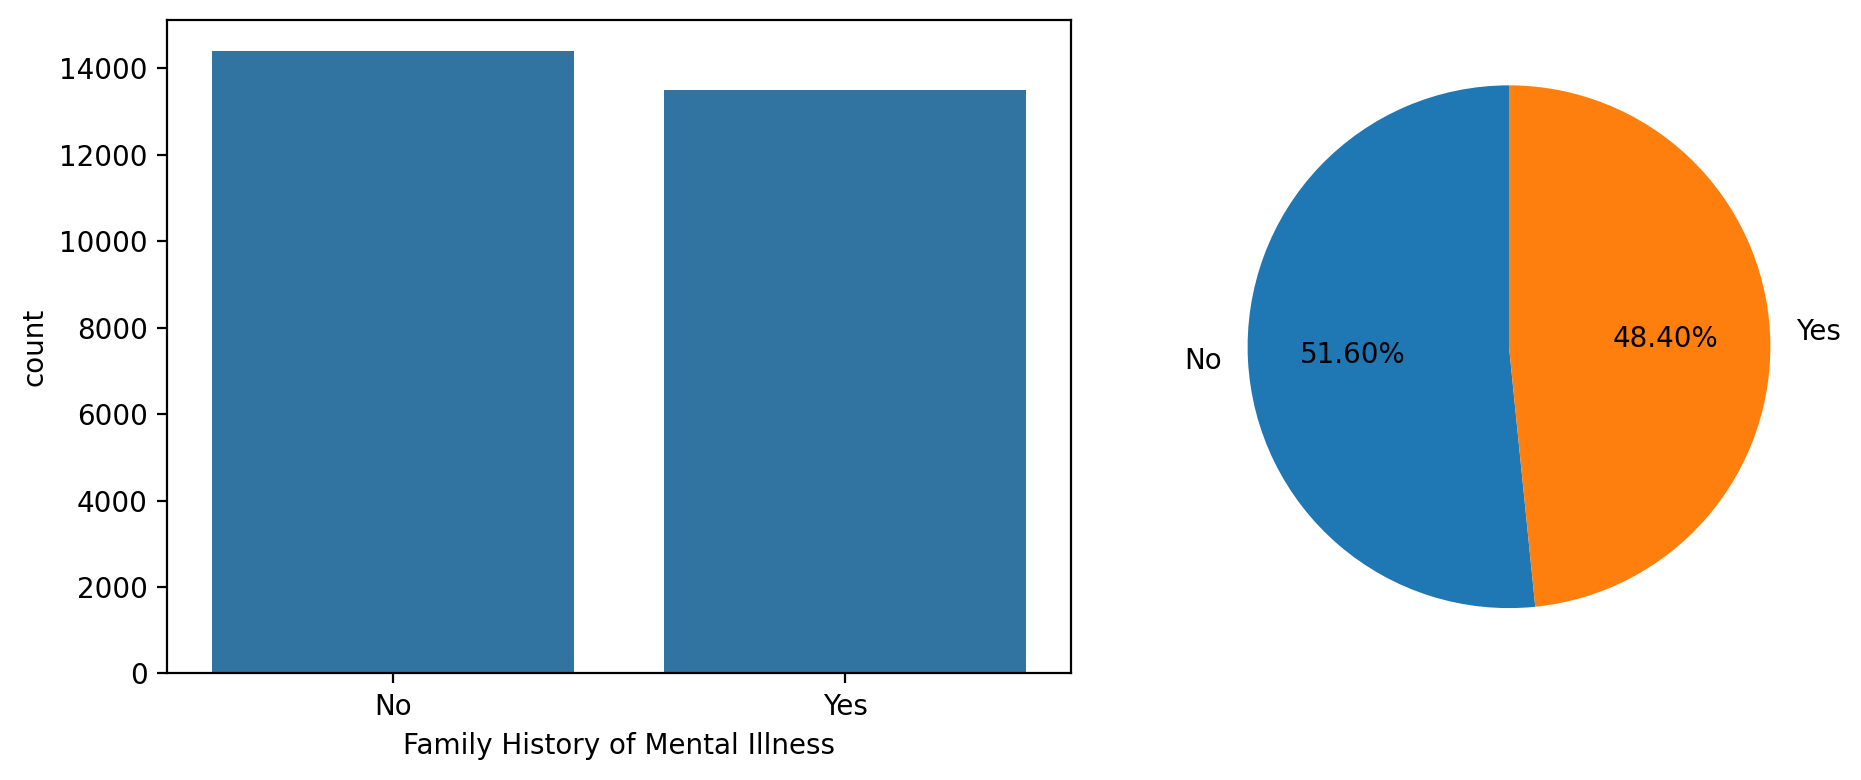

In [20]:
# 16)Family History of Mental Illness 가족의 정신질환 병력 여부 (범주형)
val = 'Family History of Mental Illness'
print(depression[val].value_counts())
print('-'*100)
temp = depression[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depression)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct="%.2f%%", startangle=90)

plt.tight_layout()
plt.show()

### 17)Depression 우울증 여부 (범주형)

Depression
1    16336
0    11565
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


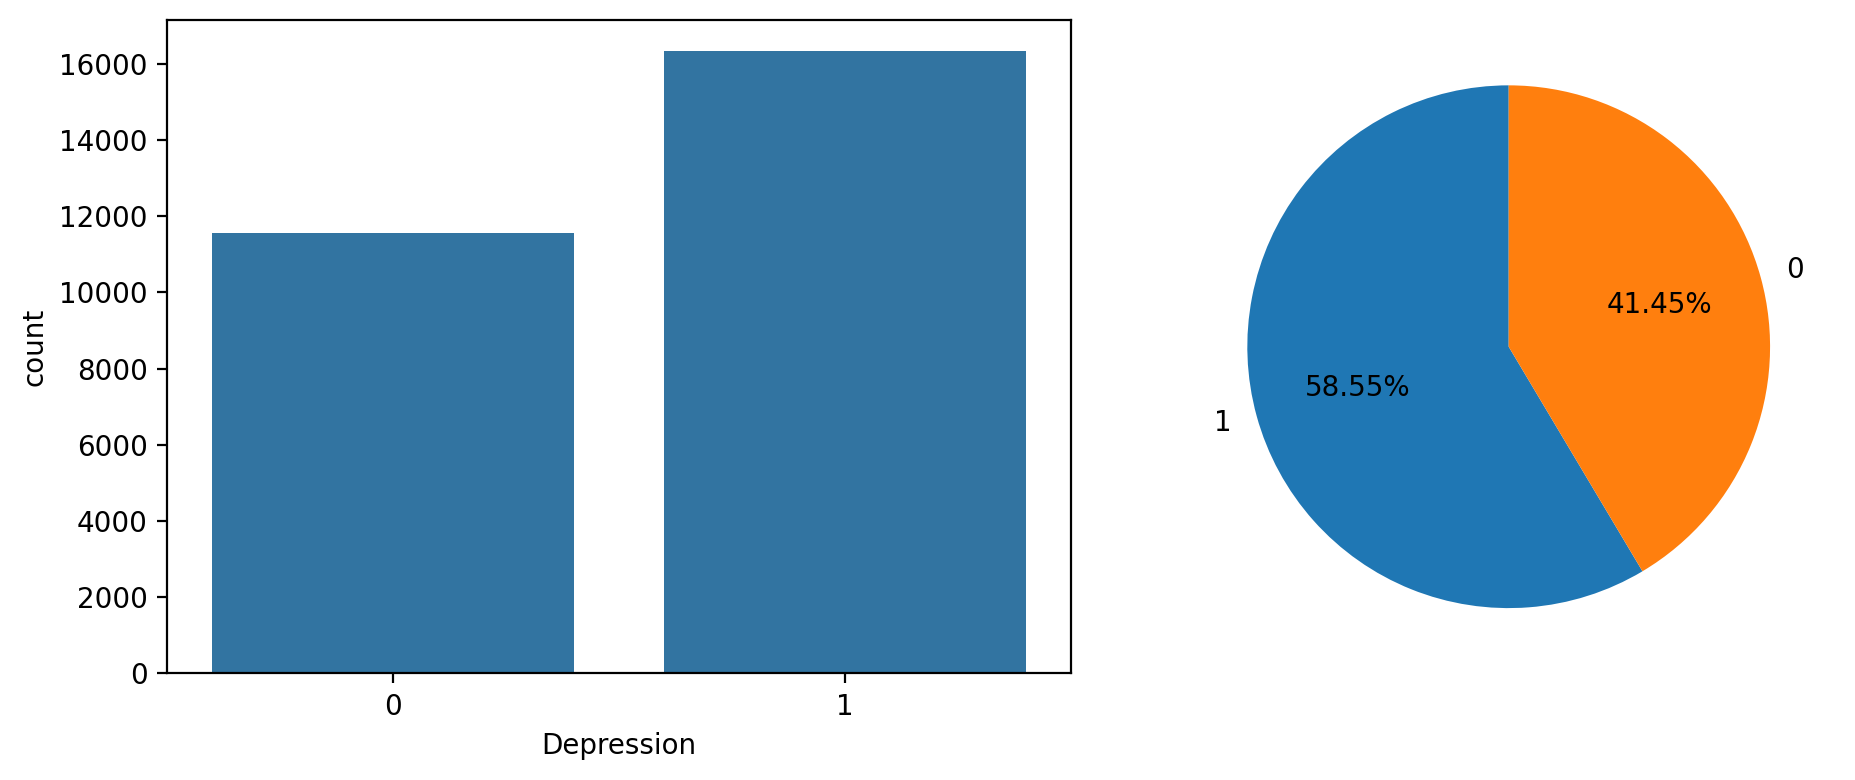

In [21]:
# 17)Depression 우울증 여부 (범주형)
val = 'Depression'
print(depression[val].value_counts())
print('-'*100)
temp = depression[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depression)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct="%.2f%%", startangle=90)

plt.tight_layout()
plt.show()
# 우울증 여부의 값으로 1은 Yes, 0은 No입니다.

단변량 분석을 통해서 확인한 결과
- 1)id 컬럼은 고유 식별자로, 모델 학습에 예측에 도움이 되는 정보가 아니기 때문에 제거합니다.
- 2)Age 이상치 제거
- 3)City 1~2개의 데이터만 가진 도시 삭제
- 7)CGPA 대학 평점 이상치 삭제 필요
- 4)“Profession(직업)과 6)Work Pressure(직업 스트레스 수준) 9)Job Satisfaction 컬럼은 대부분의 값이
'Student'과 관련된 항목에 편중되어 있어 분석에 유의미한 기준이 되기 어려워 제외가 필요할거 같습니다.”

In [22]:
# 불필요한 컬럼 제거
depr_df = depression.copy()
depr_df = depr_df.drop(['id', 'Profession', 'Work Pressure', 'Job Satisfaction'], axis=1)
depr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  int64  
 2   City                                   27901 non-null  object 
 3   Academic Pressure                      27901 non-null  int64  
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  int64  
 6   Sleep Duration                         27901 non-null  object 
 7   Dietary Habits                         27901 non-null  object 
 8   Degree                                 27901 non-null  object 
 9   Have you ever had suicidal thoughts ?  27901 non-null  object 
 10  Work/Study Hours                       27901 non-null  int64  
 11  Fi

       count       mean       std   min   25%   50%   75%   max
Age  27889.0  25.811646  4.878764  18.0  21.0  25.0  30.0  43.0
----------------------------------------------------------------------------------------------------


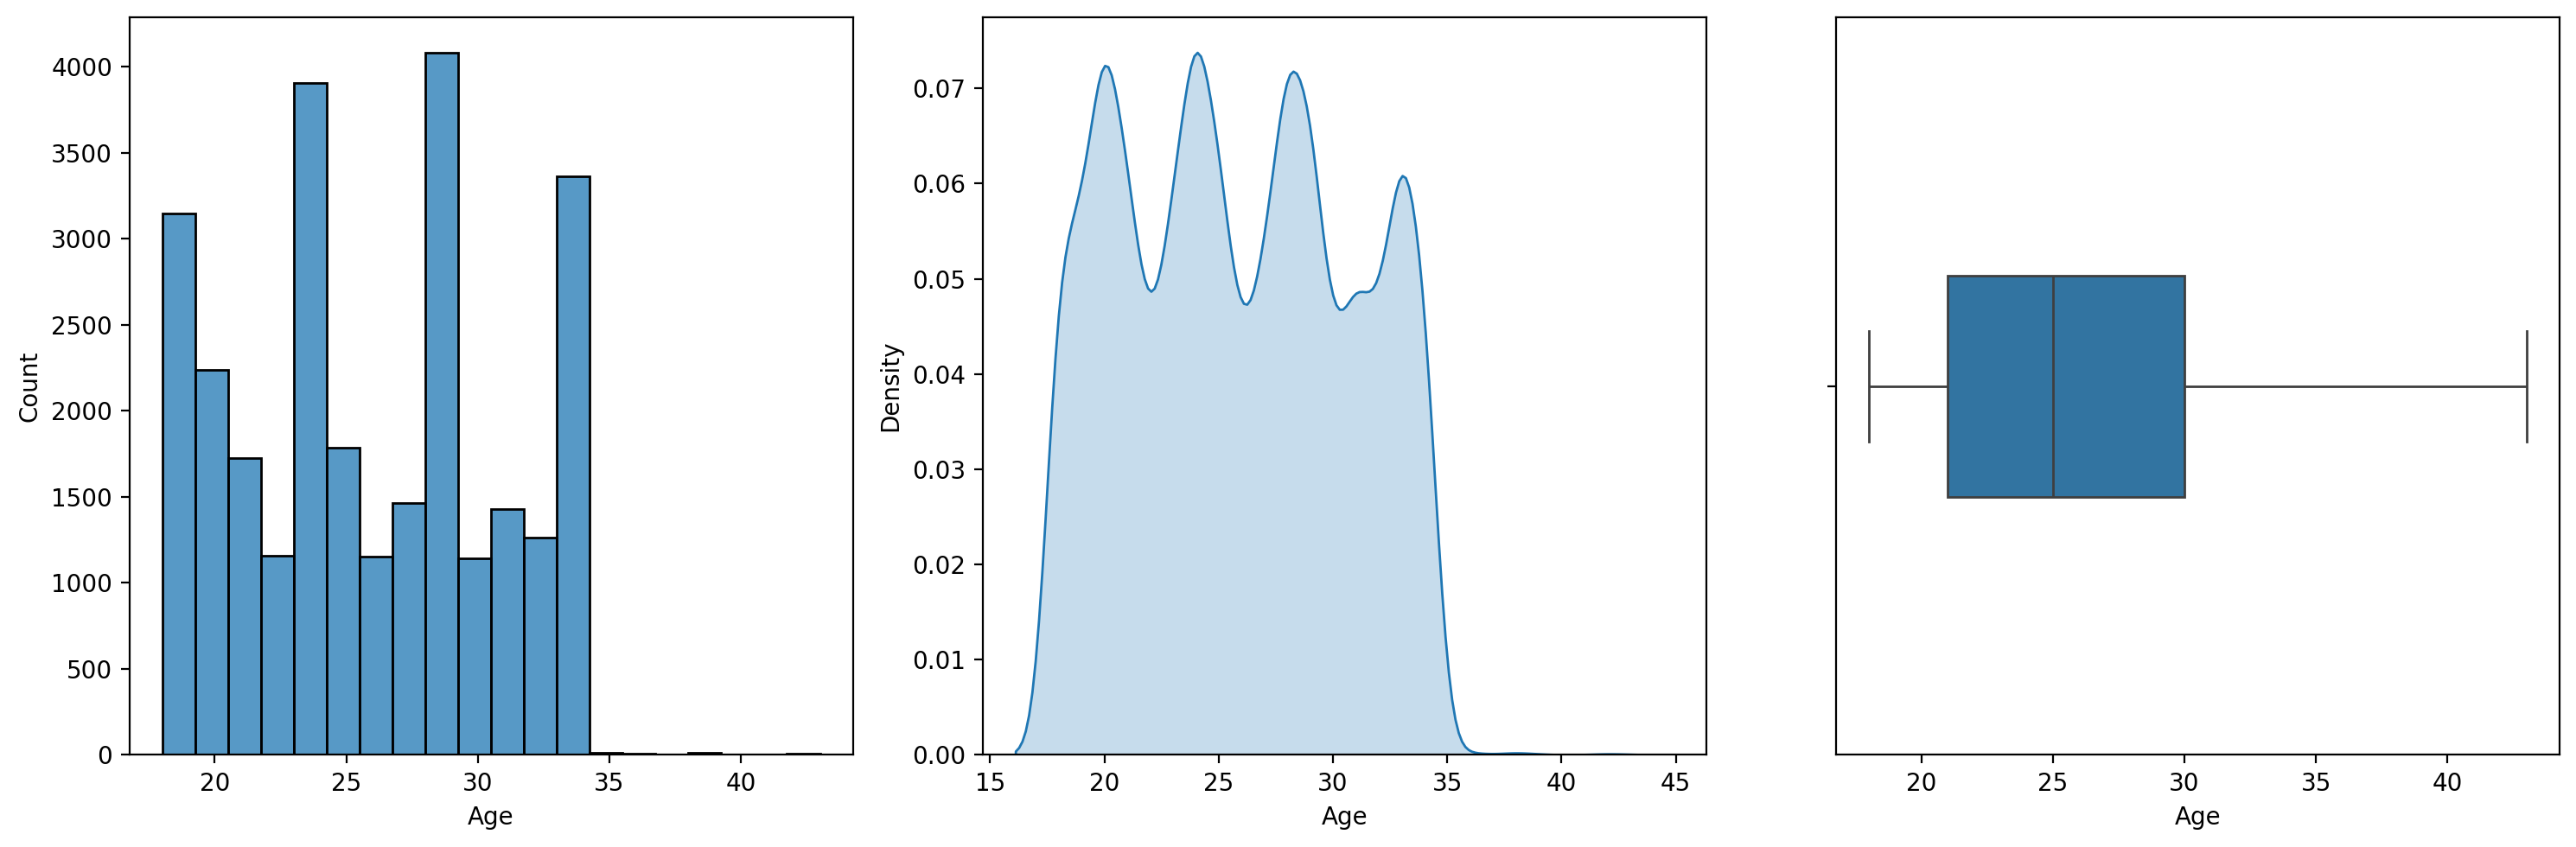

In [23]:
# 2)Age 이상치 제거
Q1 = depr_df['Age'].quantile(0.25)
Q3 = depr_df['Age'].quantile(0.75)
IQR = Q3 - Q1
depr_df = depr_df[(depr_df['Age'] >= Q1 - 1.5 * IQR) & (depr_df['Age'] <= Q3 + 1.5 * IQR)]

# 2)Age (수치형) Data 확인
val = 'Age'
print(depr_df[[val]].describe().T)
print('-'*100)
# histplot, kdeplot, boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=val, data=depr_df, bins=20)
plt.subplot(1, 3, 2)
sns.kdeplot(x=val, data=depr_df, fill=True)
plt.subplot(1, 3, 3)
sns.boxplot(x=val, data=depr_df, width=0.3)

plt.tight_layout()
plt.show()

City
Kalyan           1570
Srinagar         1371
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1154
Thane            1139
Ludhiana         1110
Agra             1093
Surat            1077
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            933
Chennai           884
Meerut            825
Rajkot            815
Delhi             768
Bangalore         767
Ghaziabad         744
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            650
Indore            643
Kanpur            609
Nashik            545
Faridabad         461
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


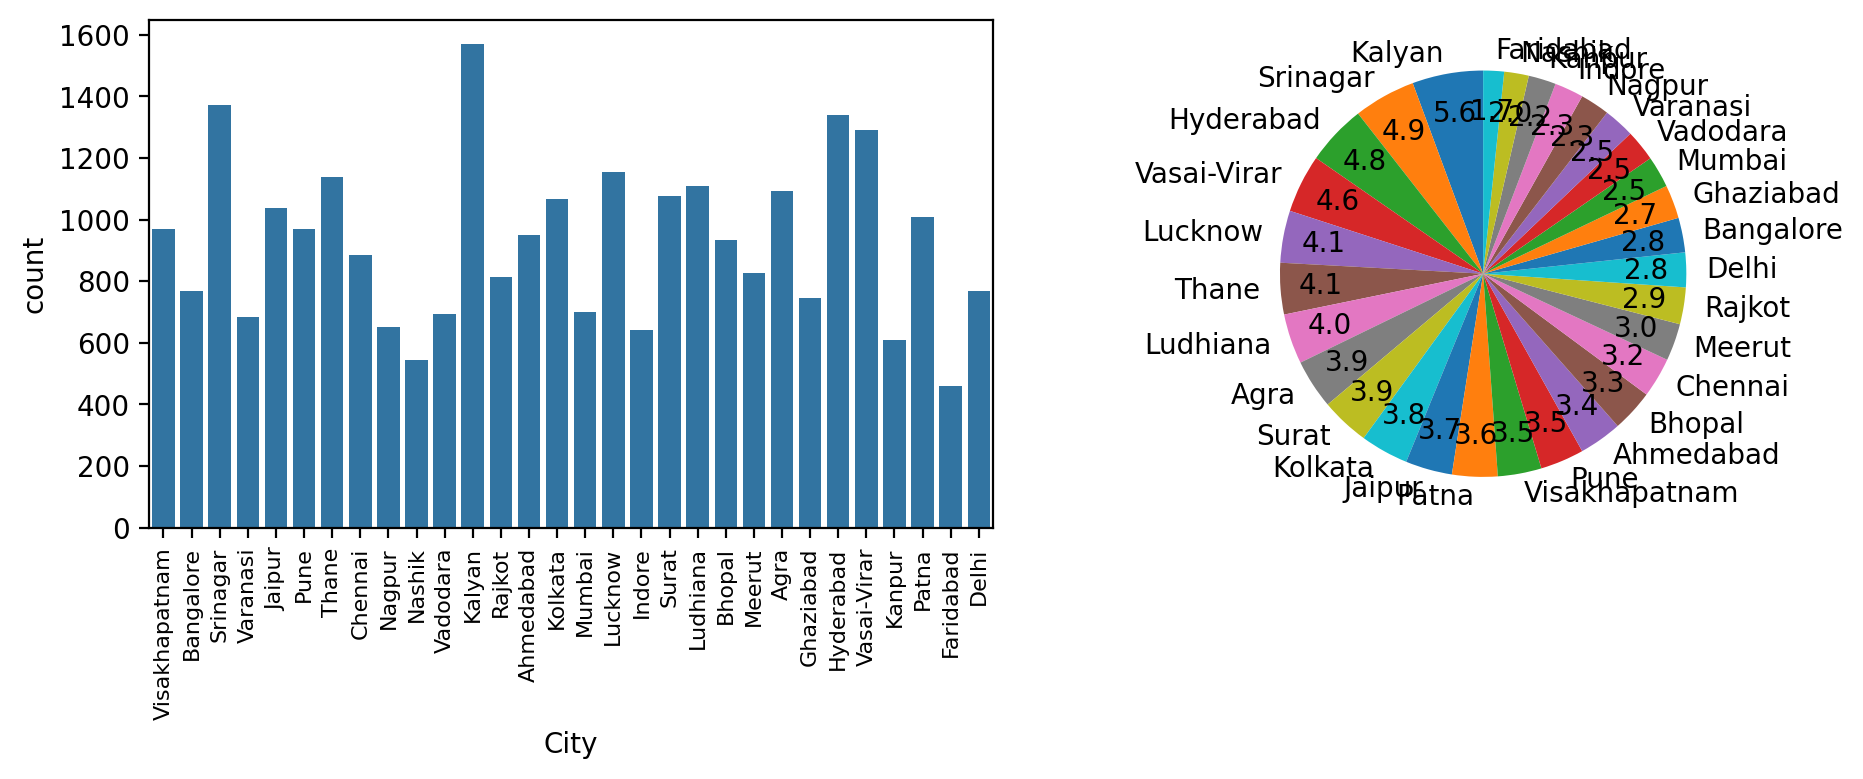

In [24]:
# 3)City 1~2개의 값을 가진 행은 제거
depr_df = depr_df[depr_df['City'].map(depr_df['City'].value_counts()) > 2]

# 3)City (범주형) Data 확인
val = 'City'
print(depr_df[val].value_counts())
print('-'*100)
temp = depr_df[val].value_counts()
plt.figure(figsize=(10, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x=val, data=depr_df)
plt.xticks(rotation=90, fontsize=8)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(temp.values, labels=temp.index, autopct='%.1f', startangle=90, pctdistance=0.8)

plt.tight_layout()
plt.show()

        count      mean       std   min   25%   50%   75%   max
CGPA  27854.0  7.658404  1.464811  5.03  6.29  7.77  8.92  10.0
----------------------------------------------------------------------------------------------------


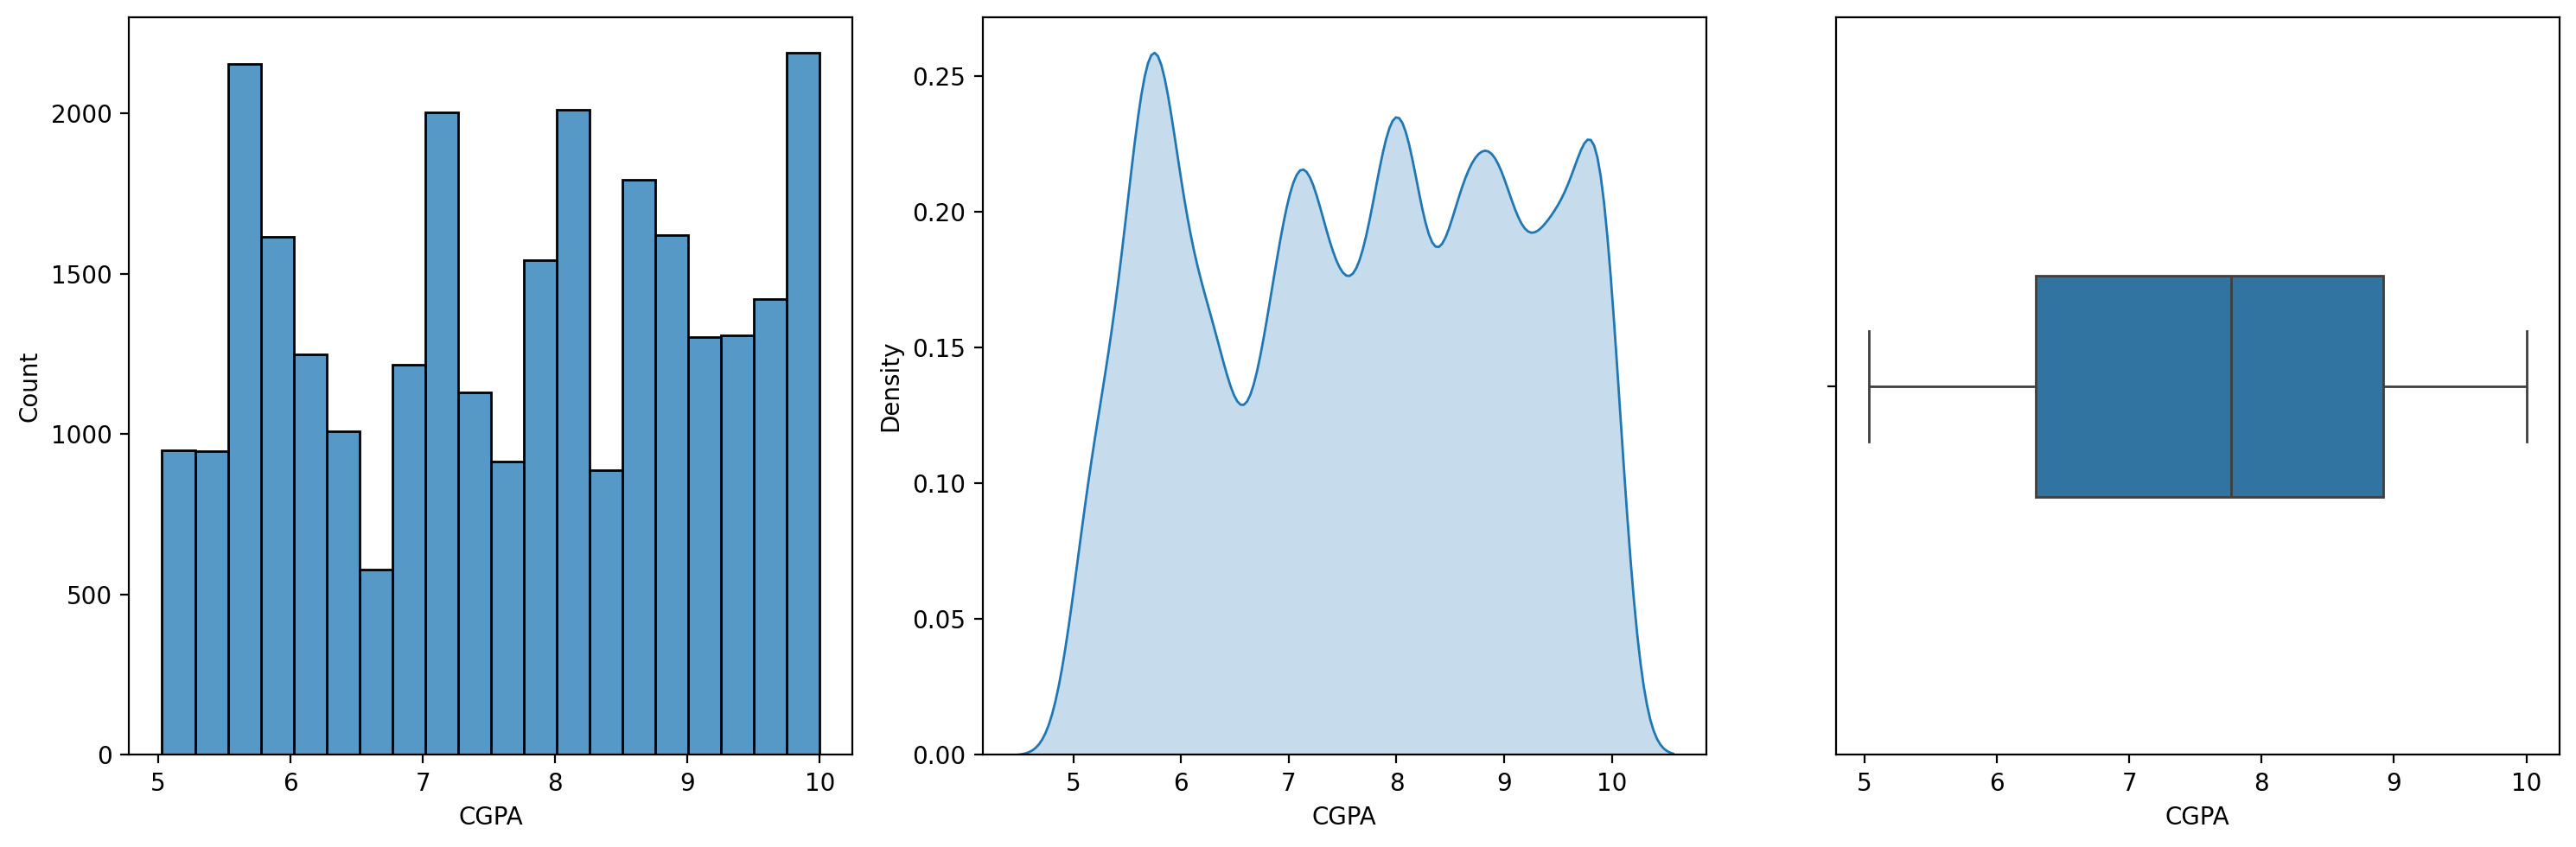

In [25]:
# 7)CGPA 이상치 제거
Q1 = depr_df['CGPA'].quantile(0.25)
Q3 = depr_df['CGPA'].quantile(0.75)
IQR = Q3 - Q1
depr_df = depr_df[(depr_df['CGPA'] >= Q1 - 1.5 * IQR) & (depr_df['CGPA'] <= Q3 + 1.5 * IQR)]

# 7)CGPA 대학 평점(수치형)
val = 'CGPA'
print(depr_df[[val]].describe().T)
print('-'*100)
# histplot, kdeplot, boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x=val, data=depr_df, bins=20)
plt.subplot(1, 3, 2)
sns.kdeplot(x=val, data=depr_df, fill=True)
plt.subplot(1, 3, 3)
sns.boxplot(x=val, data=depr_df, width=0.3)

plt.tight_layout()
plt.show()

In [26]:
# 간단한 데이터 전처리 후
# 컬럼 18개 -> 14개
# 27901 -> 27854 이상치 제거로 인한 데이터 수 변화.
depr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27854 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27854 non-null  object 
 1   Age                                    27854 non-null  int64  
 2   City                                   27854 non-null  object 
 3   Academic Pressure                      27854 non-null  int64  
 4   CGPA                                   27854 non-null  float64
 5   Study Satisfaction                     27854 non-null  int64  
 6   Sleep Duration                         27854 non-null  object 
 7   Dietary Habits                         27854 non-null  object 
 8   Degree                                 27854 non-null  object 
 9   Have you ever had suicidal thoughts ?  27854 non-null  object 
 10  Work/Study Hours                       27854 non-null  int64  
 11  Financi

# 3.이변량 분석
- Depression 우울증 여부를 Target 값으로 정하고 남은 변수들과의 관계를 파악해볼께요.

In [27]:
# 참고용 - 수치형 변수들간의 상관관계
depr_df.corr(numeric_only=True).style.background_gradient()

### 0)Gender 성별 (범주형) -> Depression 우울증 여부 (범주형)

In [28]:
# 이변량 분석을 위한 추가 라이브러리 Import
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst
import statsmodels.api as sm

Depression     0     1
Gender                
Female      5121  7210
Male        6418  9105
----------------------------------------------------------------------------------------------------
Depression         0         1
Gender                        
Female      0.415295  0.584705
Male        0.413451  0.586549
----------------------------------------------------------------------------------------------------


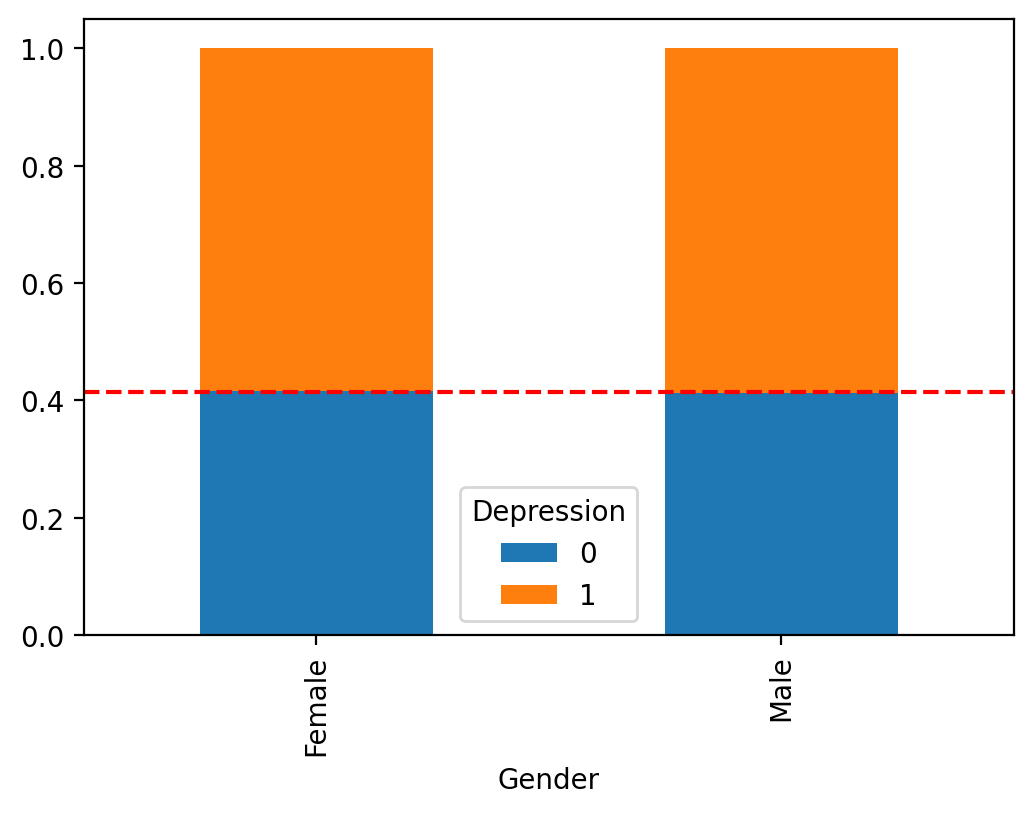

In [29]:
# 0)Gender 성별 (범주형) -> Depression 우울증 여부 (범주형) 시각화
print(pd.crosstab(depr_df['Gender'], depr_df['Depression']))
print('-'*100)

temp = pd.crosstab(depr_df['Gender'], depr_df['Depression'], normalize='index')
print(temp)
print('-'*100)

temp.plot(kind='bar', stacked=True)
plt.axhline(1-depr_df['Depression'].mean(), color='r', linestyle='--')
plt.show()

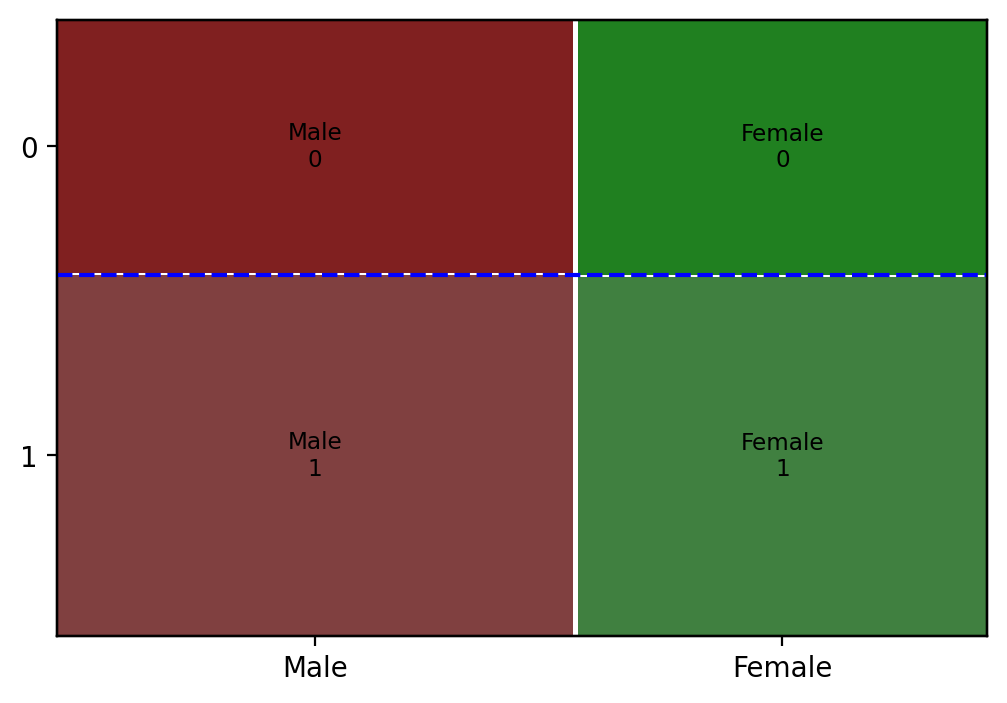

In [30]:
mosaic(depr_df, ['Gender', 'Depression'])
plt.axhline(depr_df['Depression'].mean(), color='b', linestyle='--')
plt.show()

In [31]:
# 0)Gender 성별 (범주형) -> Depression 우울증 여부 (범주형) 수치화 / 카이제곱 검정
table = pd.crosstab(depr_df['Gender'], depr_df['Depression'])
result = spst.chi2_contingency(table)
print("카이제곱 통계량: ", result[0])
print("P-value: ", result[1])
print("자유도: ", result[2])

카이제곱 통계량:  0.08882856300648122
P-value:  0.7656717108398372
자유도:  1


🤔 Gender 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 없어, 분석 변수로서의 설명력이 낮은 것으로 판단됩니다.

### 1)Age 나이 (수치형) -> Depression 우울증 여부 (범주형)

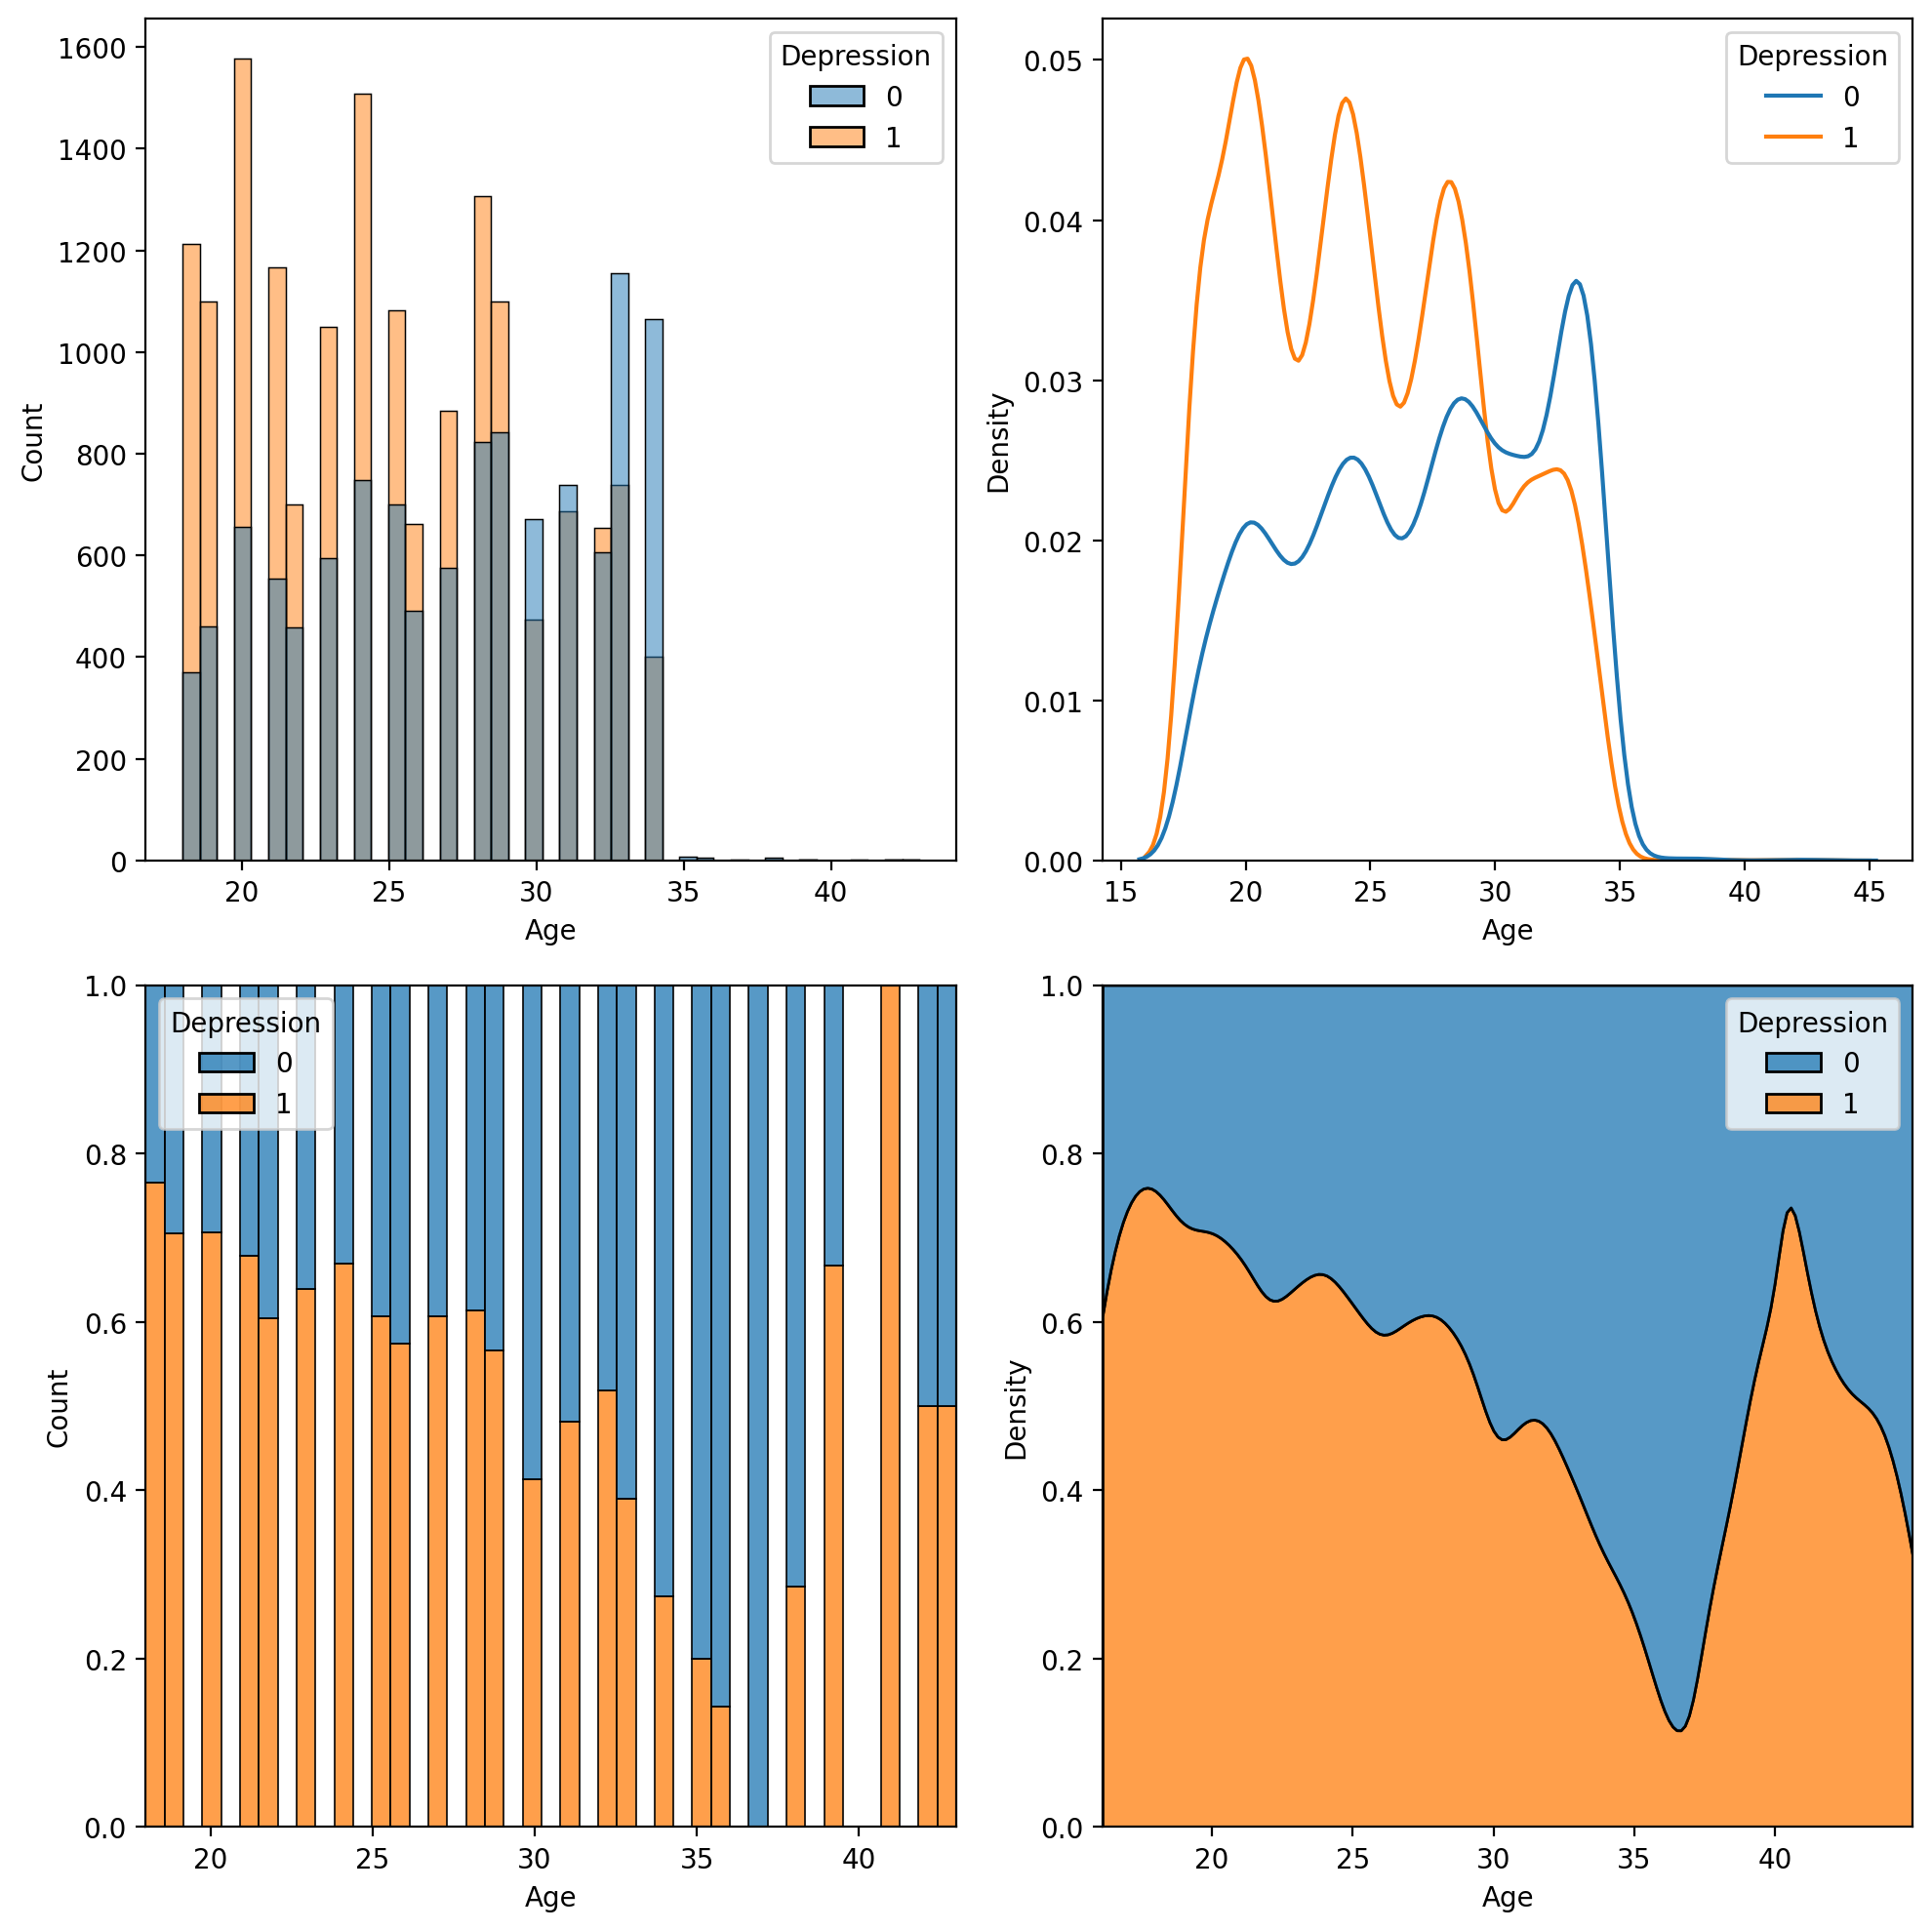

In [32]:
# 1)Age 나이 (수치형) -> Depression 우울증 여부 (범주형) 시각화
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.histplot(x='Age', hue='Depression', data=depr_df)

plt.subplot(2, 2, 2)
sns.kdeplot(x='Age', hue='Depression', data=depr_df)

plt.subplot(2, 2, 3)
sns.histplot(x='Age', hue='Depression', data=depr_df, multiple='fill')

plt.subplot(2, 2, 4)
sns.kdeplot(x='Age', hue='Depression', data=depr_df, multiple='fill')

plt.tight_layout()
plt.show()

In [33]:
# 1)Age 나이 (수치형) -> Depression 우울증 여부 (범주형) - 로지스틱 회귀모델 P-value
model = sm.Logit(depr_df['Depression'], depr_df['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.685035
         Iterations 3
Age    2.240462e-99
dtype: float64


🤔 Age 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 10대 후반~30대의 젊은층에서의 우울증 여부가 많아보이네요.
- Logistic 회귀 분석에서도 p-value가 2.24e-99로 매우 낮아, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.

### 2)City 도시 (범주형) -> Depression 우울증 여부 (범주형)

Depression       0    1
City                   
Agra           508  585
Ahmedabad      311  638
Bangalore      300  467
Bhopal         354  579
Chennai        355  528
Delhi          300  468
Faridabad      190  271
Ghaziabad      316  428
Hyderabad      443  897
Indore         254  389
Jaipur         493  543
Kalyan         636  934
Kanpur         279  330
Kolkata        417  649
Lucknow        513  640
Ludhiana       463  647
Meerut         331  493
Mumbai         313  386
Nagpur         287  363
Nashik         256  289
Patna          371  636
Pune           426  541
Rajkot         305  509
Srinagar       608  763
Surat          452  625
Thane          466  673
Vadodara       303  389
Varanasi       321  364
Vasai-Virar    551  739
Visakhapatnam  417  552
----------------------------------------------------------------------------------------------------
Depression            0         1
City                             
Agra           0.464776  0.535224
Ahmedabad      0.327713  0.67

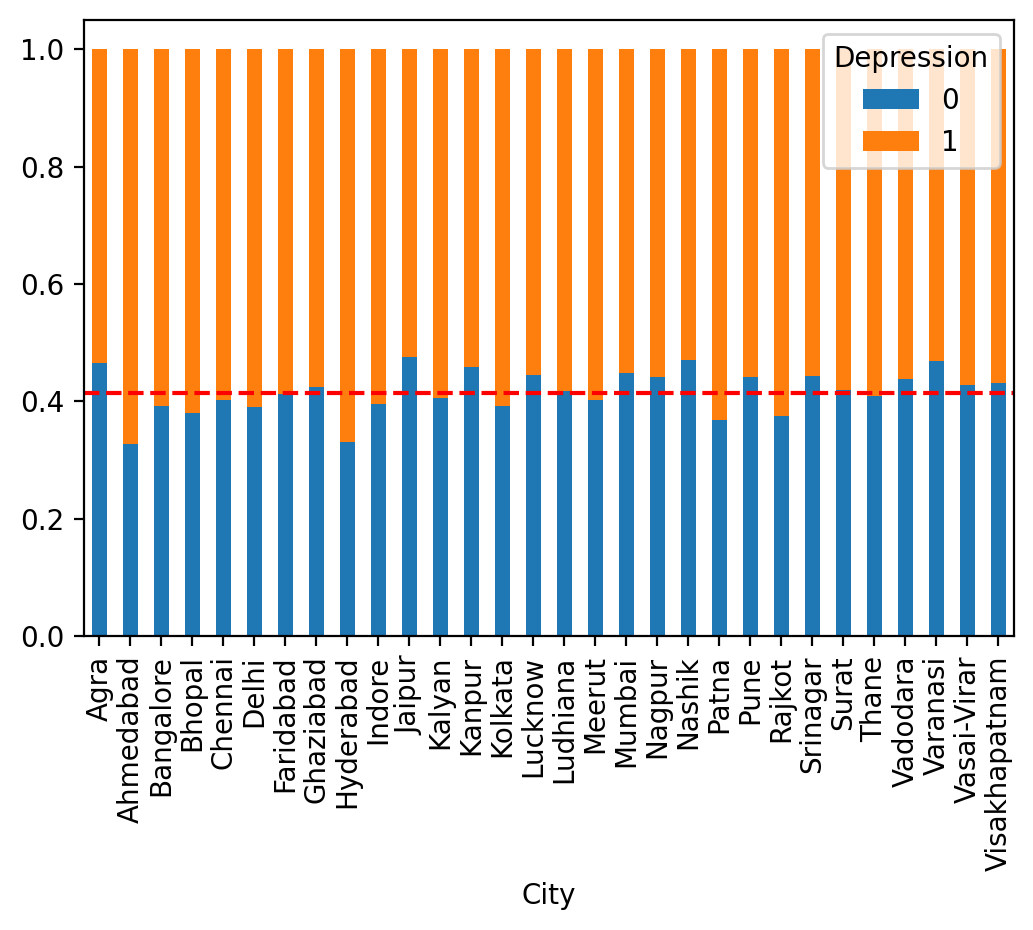

In [34]:
# 2)City 도시 (범주형) -> Depression 우울증 여부 (범주형) 시각화
print(pd.crosstab(depr_df['City'], depr_df['Depression']))
print('-'*100)

temp = pd.crosstab(depr_df['City'], depr_df['Depression'], normalize='index')
print(temp)
print('-'*100)

temp.plot(kind='bar', stacked=True)
plt.axhline(1-depr_df['Depression'].mean(), color='r', linestyle='--')
plt.show()

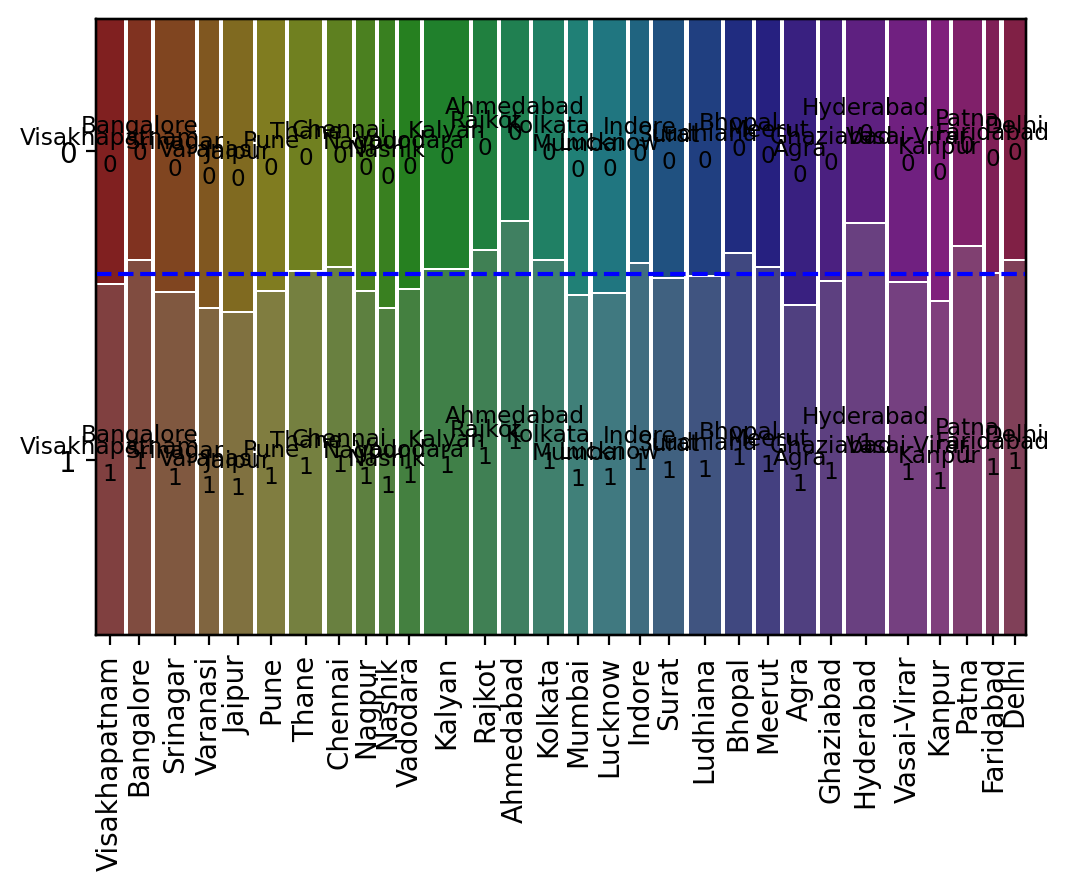

In [35]:
mosaic(depr_df, ['City', 'Depression'], label_rotation=(90, 0))
plt.axhline(depr_df['Depression'].mean(), color='b', linestyle='--')
plt.show()

In [36]:
# 2)City 도시 (범주형) -> Depression 우울증 여부 (범주형) 수치화 / 카이제곱 검정
table = pd.crosstab(depr_df['City'], depr_df['Depression'])
result = spst.chi2_contingency(table)
print("카이제곱 통계량: ", result[0])
print("P-value: ", result[1])
print("자유도: ", result[2])

카이제곱 통계량:  164.1786324083827
P-value:  8.040661352758305e-21
자유도:  29


🤔 City 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 카이제곱 통계량의 p-value가 8.04e-21로 낮아, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.
- 대도시, 성장중인 도시들 카테고리로 묶어서 보았을 때 유의미한 차이가 보이는거 같진 않습니다.
- Mumbai, Delhi, Bangalore, Hyderabad, Kolkata, Chennai → 인도의 6대 대도시
- Lucknow, Jaipur, Ahmedabad, Pune, Surat → 인구 많고 성장 중인 도시들
- Kalyan, Vasai-Virar, Thane → Mumbai 근교 대규모 주거지

### 3)Academic Pressure 학업 스트레스 수준 (범주형) -> Depression 우울증 여부 (범주형)

Depression            0     1
Academic Pressure            
0                     2     1
1                  3861   931
2                  2607  1563
3                  2966  4482
4                  1228  3922
5                   875  5416
----------------------------------------------------------------------------------------------------
Depression                0         1
Academic Pressure                    
0                  0.666667  0.333333
1                  0.805718  0.194282
2                  0.625180  0.374820
3                  0.398228  0.601772
4                  0.238447  0.761553
5                  0.139088  0.860912
----------------------------------------------------------------------------------------------------


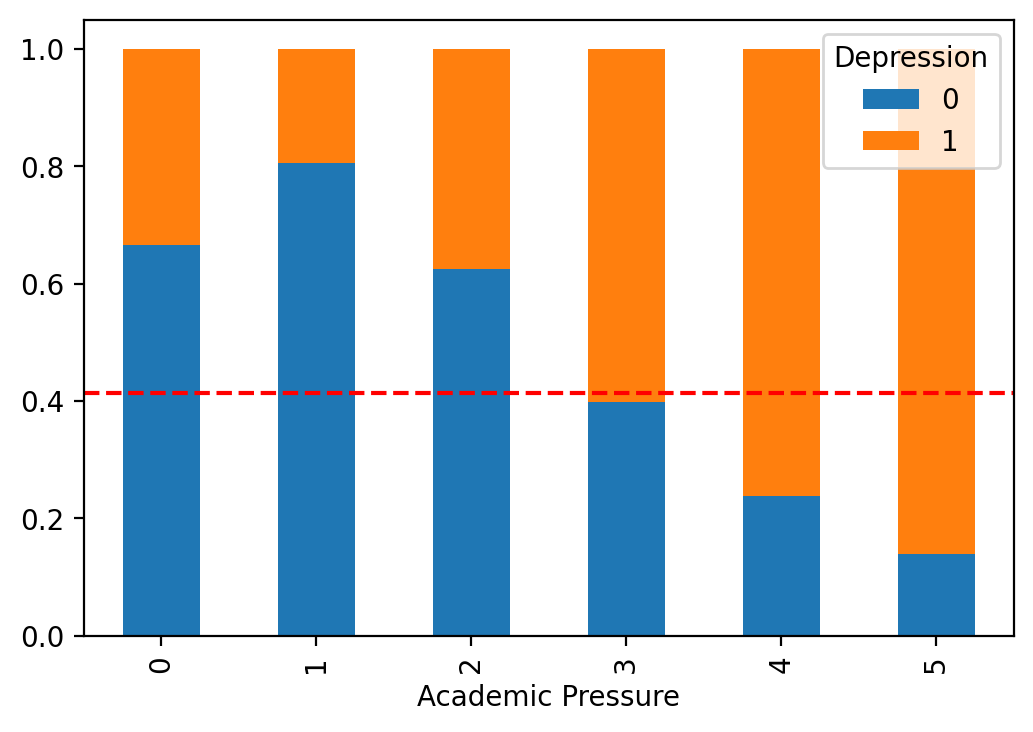

In [37]:
# 3)Academic Pressure 학업 스트레스 수준 (범주형) -> Depression 우울증 여부 (범주형) 시각화
print(pd.crosstab(depr_df['Academic Pressure'], depr_df['Depression']))
print('-'*100)

temp = pd.crosstab(depr_df['Academic Pressure'], depr_df['Depression'], normalize='index')
print(temp)
print('-'*100)

temp.plot(kind='bar', stacked=True)
plt.axhline(1-depr_df['Depression'].mean(), color='r', linestyle='--')
plt.show()

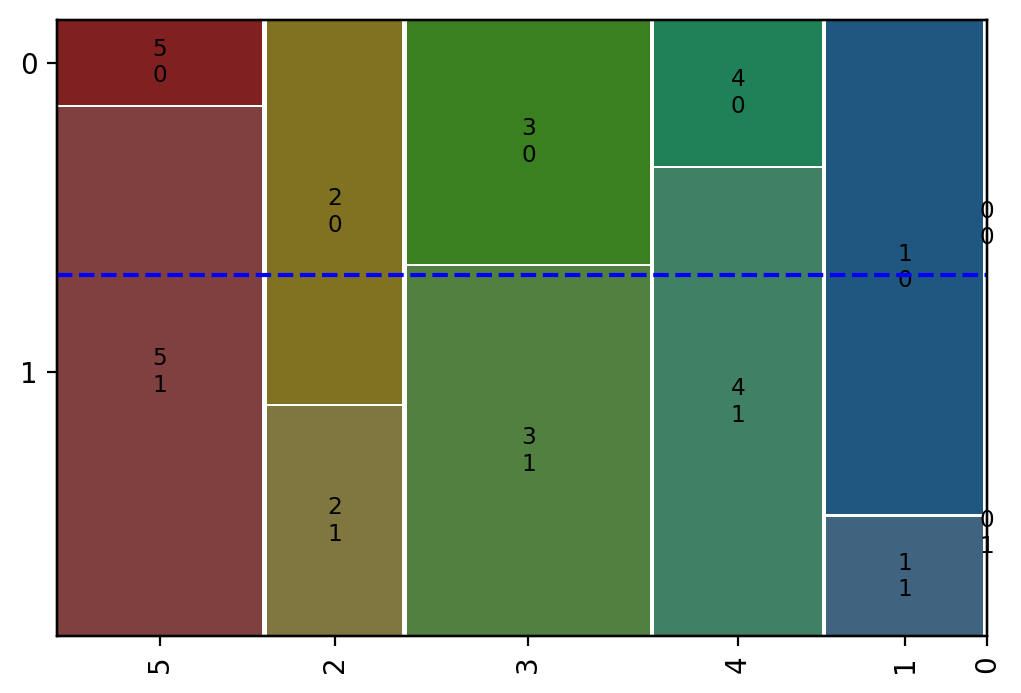

In [38]:
mosaic(depr_df, ['Academic Pressure', 'Depression'], label_rotation=(90, 0))
plt.axhline(depr_df['Depression'].mean(), color='b', linestyle='--')
plt.show()

In [39]:
# 3)Academic Pressure 학업 스트레스 수준 (범주형) -> Depression 우울증 여부 (범주형) 수치화 / 카이제곱 검정
table = pd.crosstab(depr_df['Academic Pressure'], depr_df['Depression'])
result = spst.chi2_contingency(table)
print("카이제곱 통계량: ", result[0])
print("P-value: ", f'{result[1]:.30f}')
print("자유도: ", result[2])

카이제곱 통계량:  6418.636762513527
P-value:  0.000000000000000000000000000000
자유도:  5


🤔 Academic Pressure 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 카이제곱 통계량의 p-value가 0.0으로, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.
- 학업 스트레스 수준이 높을수록 우울증이 많아 보이네요..

### 4)CGPA 대학 평점 (수치형) -> Depression 우울증 여부 (범주형)

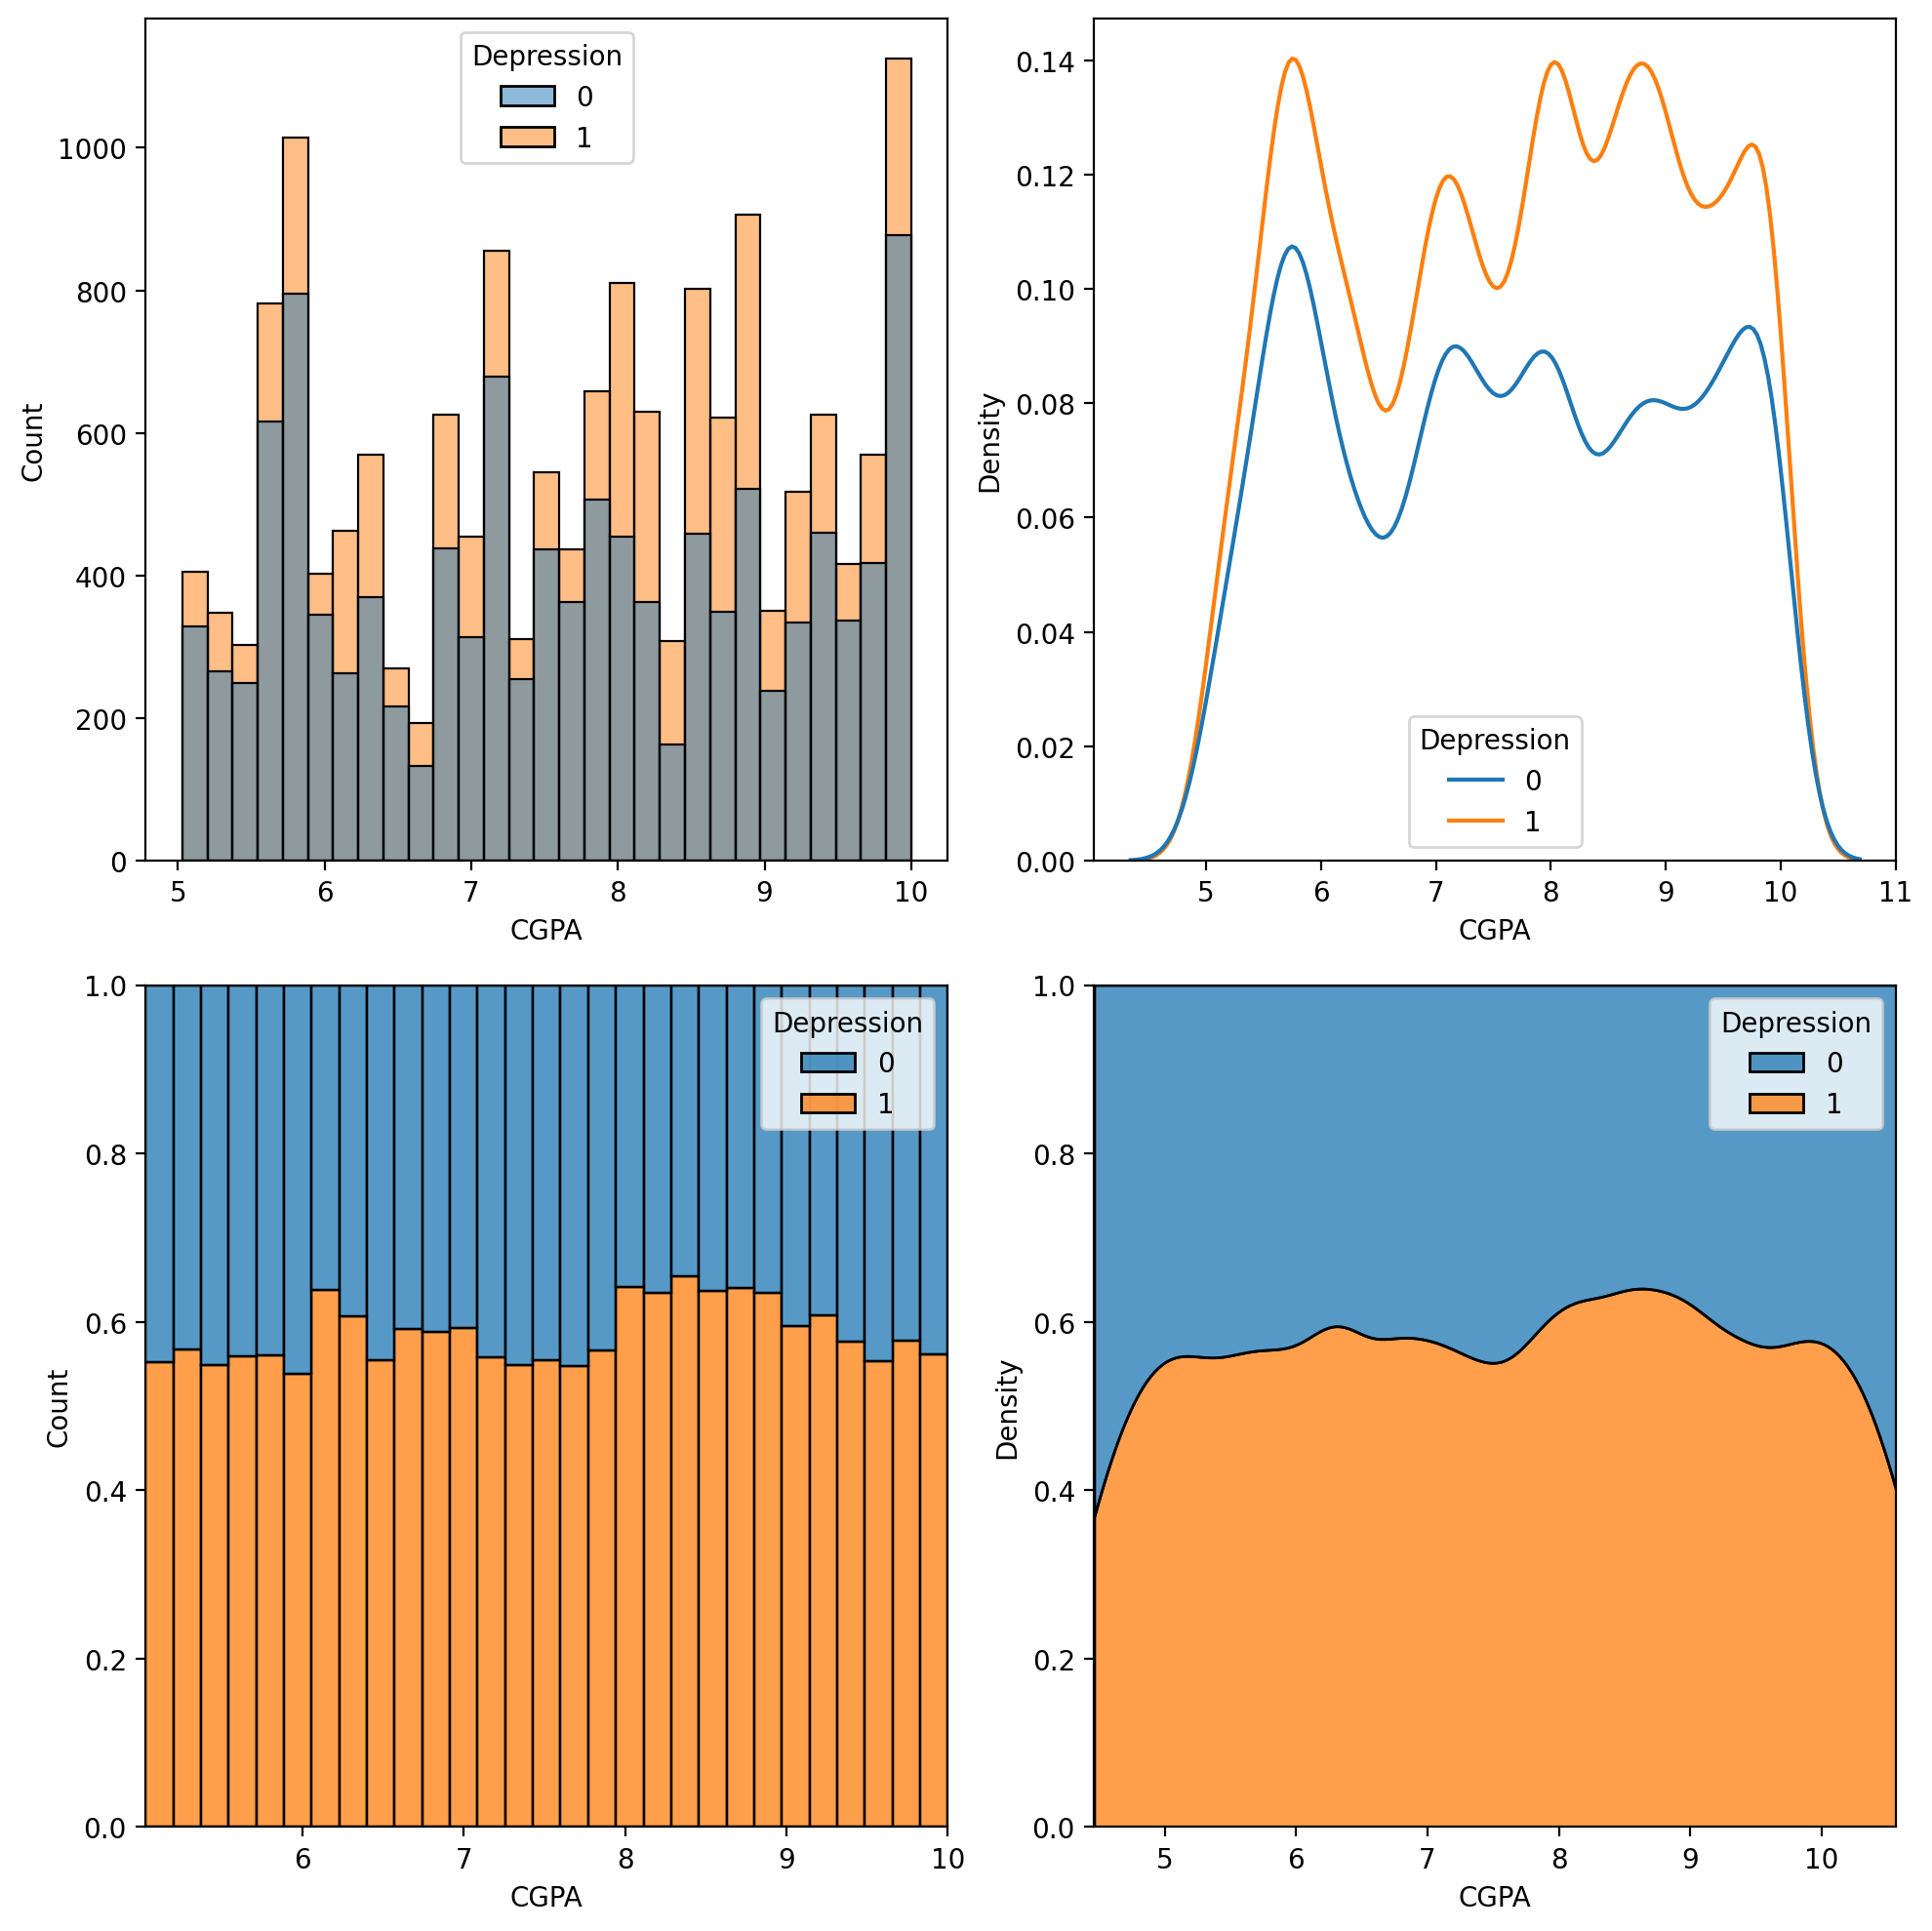

In [40]:
# 4)CGPA 대학 평점 (수치형) -> Depression 우울증 여부 (범주형) 시각화
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.histplot(x='CGPA', hue='Depression', data=depr_df)

plt.subplot(2, 2, 2)
sns.kdeplot(x='CGPA', hue='Depression', data=depr_df)

plt.subplot(2, 2, 3)
sns.histplot(x='CGPA', hue='Depression', data=depr_df, multiple='fill')

plt.subplot(2, 2, 4)
sns.kdeplot(x='CGPA', hue='Depression', data=depr_df, multiple='fill')

plt.tight_layout()
plt.show()

In [41]:
# 4)CGPA 대학 평점 (수치형) -> Depression 우울증 여부 (범주형) - 로지스틱 회귀모델 P-value
model = sm.Logit(depr_df['Depression'], depr_df['CGPA'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.678201
         Iterations 4
CGPA    5.138303e-180
dtype: float64


🤔 CGPA 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 시각화를 봤을 때에는 대부분 비슷하지만 8~10 대학 평점이 높은 측에서 우울증 여부가 더 많아보입니다.
- Logistic 회귀 분석에서도 p-value가 5.13e-180으로 매우 낮아, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.

### 5)Study Satisfaction 학업 만족도 (수치형) -> Depression 우울증 여부 (범주형)

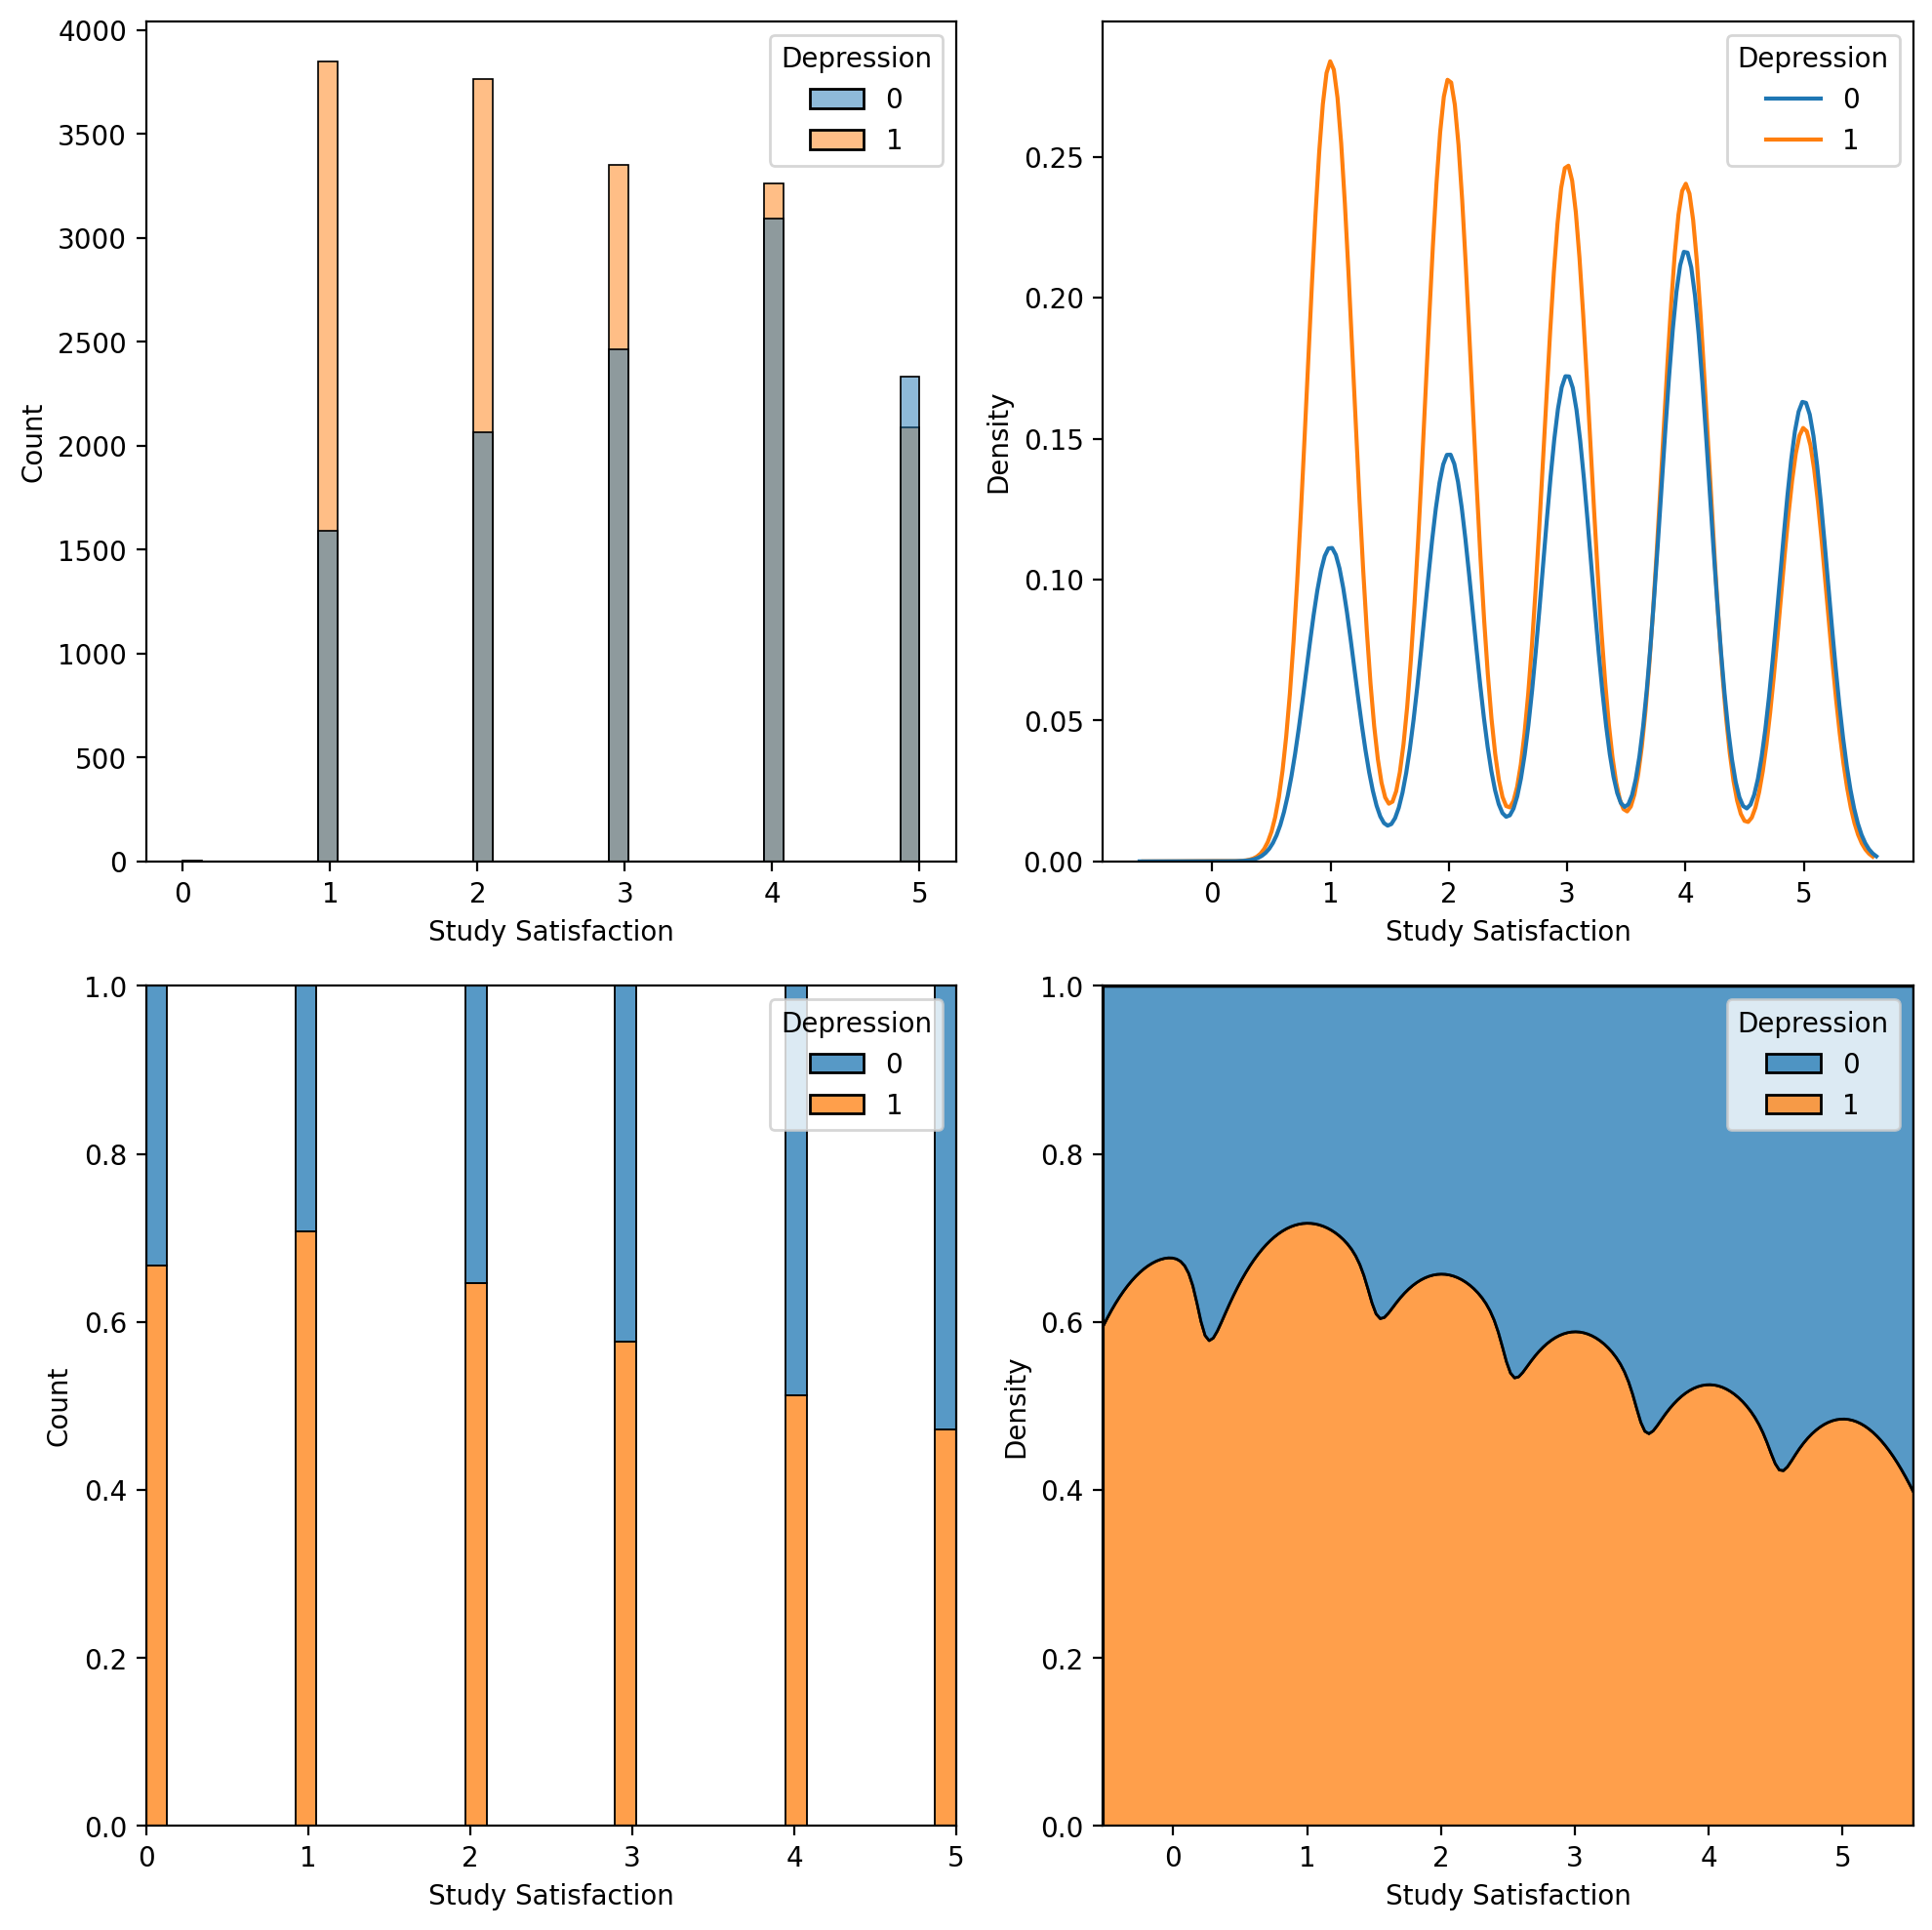

In [42]:
# 5)Study Satisfaction 학업 만족도 (수치형) -> Depression 우울증 여부 (범주형) 시각화
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.histplot(x='Study Satisfaction', hue='Depression', data=depr_df)

plt.subplot(2, 2, 2)
sns.kdeplot(x='Study Satisfaction', hue='Depression', data=depr_df)

plt.subplot(2, 2, 3)
sns.histplot(x='Study Satisfaction', hue='Depression', data=depr_df, multiple='fill')

plt.subplot(2, 2, 4)
sns.kdeplot(x='Study Satisfaction', hue='Depression', data=depr_df, multiple='fill')

plt.tight_layout()
plt.show()

In [43]:
# 5)Study Satisfaction 학업 만족도 (수치형) -> Depression 우울증 여부 (범주형) - 로지스틱 회귀모델 P-value
model = sm.Logit(depr_df['Depression'], depr_df['Study Satisfaction'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689428
         Iterations 4
Study Satisfaction    1.055898e-46
dtype: float64


🤔 Study Satisfaction 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 시각화를 봤을 때에 학업 만족도가 낮을수록 우울증 여부가 더 많아보입니다.
- Logistic 회귀 분석에서도 p-value가 1.05e-180으로 매우 낮아, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.

### 6)Sleep Duration 평균 수면 시간 (범주형) -> Depression 우울증 여부 (범주형)

Depression              0     1
Sleep Duration                 
'5-6 hours'          2660  3512
'7-8 hours'          2965  4365
'Less than 5 hours'  2943  5353
'More than 8 hours'  2962  3076
Others                  9     9
----------------------------------------------------------------------------------------------------
Depression                  0         1
Sleep Duration                         
'5-6 hours'          0.430979  0.569021
'7-8 hours'          0.404502  0.595498
'Less than 5 hours'  0.354749  0.645251
'More than 8 hours'  0.490560  0.509440
Others               0.500000  0.500000
----------------------------------------------------------------------------------------------------


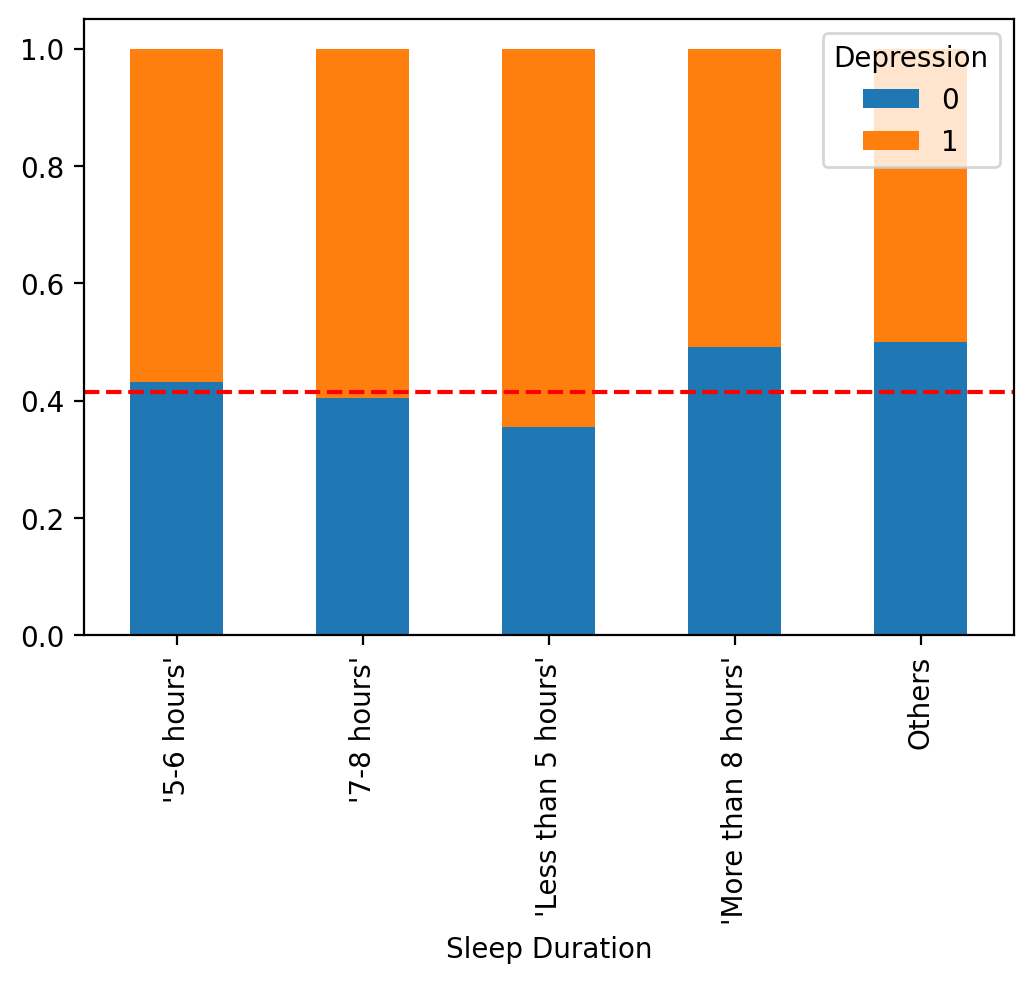

In [44]:
# 6)Sleep Duration 평균 수면 시간 (범주형) -> Depression 우울증 여부 (범주형) 시각화
print(pd.crosstab(depr_df['Sleep Duration'], depr_df['Depression']))
print('-'*100)

temp = pd.crosstab(depr_df['Sleep Duration'], depr_df['Depression'], normalize='index')
print(temp)
print('-'*100)

temp.plot(kind='bar', stacked=True)
plt.axhline(1-depr_df['Depression'].mean(), color='r', linestyle='--')
plt.show()

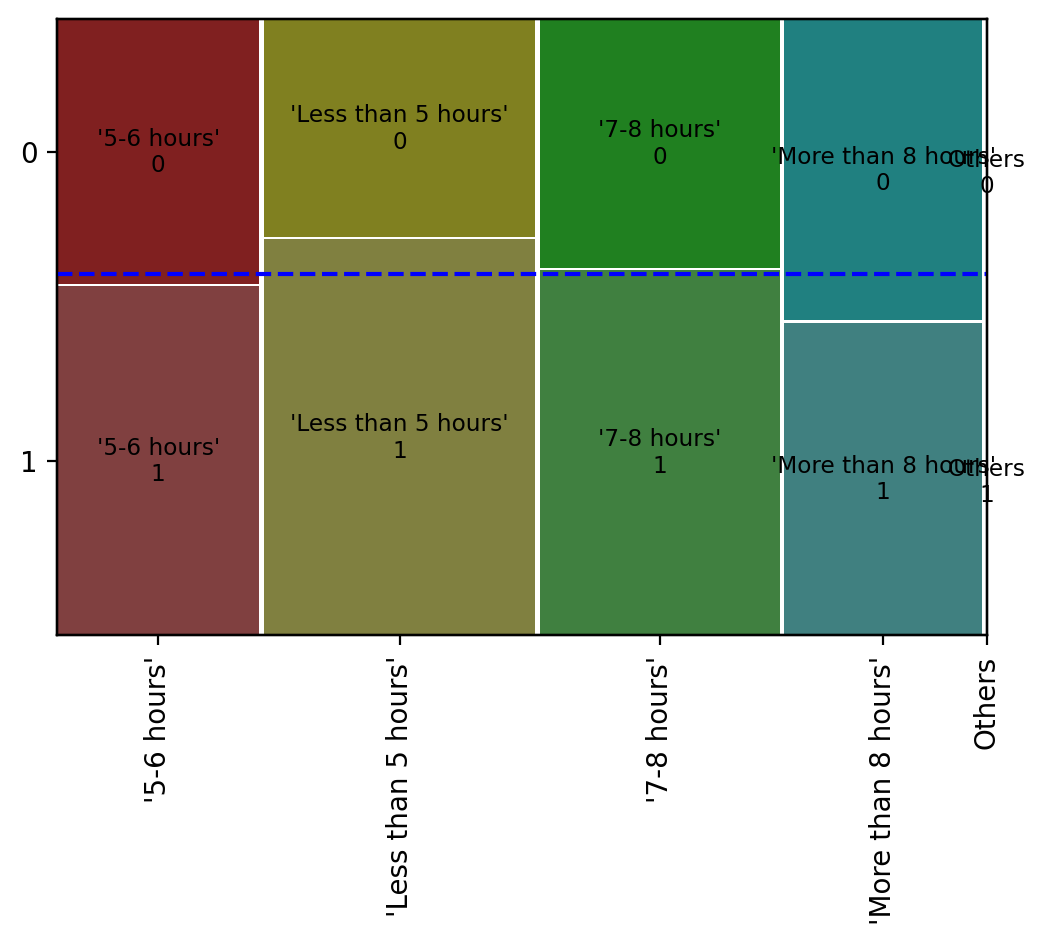

In [45]:
mosaic(depr_df, ['Sleep Duration', 'Depression'], label_rotation=(90, 0))
plt.axhline(depr_df['Depression'].mean(), color='b', linestyle='--')
plt.show()

In [46]:
# 6)Sleep Duration 평균 수면 시간 (범주형) -> Depression 우울증 여부 (범주형) 수치화 / 카이제곱 검정
table = pd.crosstab(depr_df['Sleep Duration'], depr_df['Depression'])
result = spst.chi2_contingency(table)
print("카이제곱 통계량: ", result[0])
print("P-value: ", f'{result[1]:.30f}')
print("자유도: ", result[2])

카이제곱 통계량:  276.4768817909442
P-value:  0.000000000000000000000000000000
자유도:  4


🤔 Sleep Duration 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 카이제곱 통계량의 p-value가 0.0으로, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.
- 수면 시간이 적을수록 우울증이 많아 보이네요..

### 7)Dietary Habits 식습관 (범주형) -> Depression 우울증 여부 (범주형)

Depression         0     1
Dietary Habits            
Healthy         4170  3469
Moderate        4356  5552
Others             4     8
Unhealthy       3009  7286
----------------------------------------------------------------------------------------------------
Depression             0         1
Dietary Habits                    
Healthy         0.545883  0.454117
Moderate        0.439645  0.560355
Others          0.333333  0.666667
Unhealthy       0.292278  0.707722
----------------------------------------------------------------------------------------------------


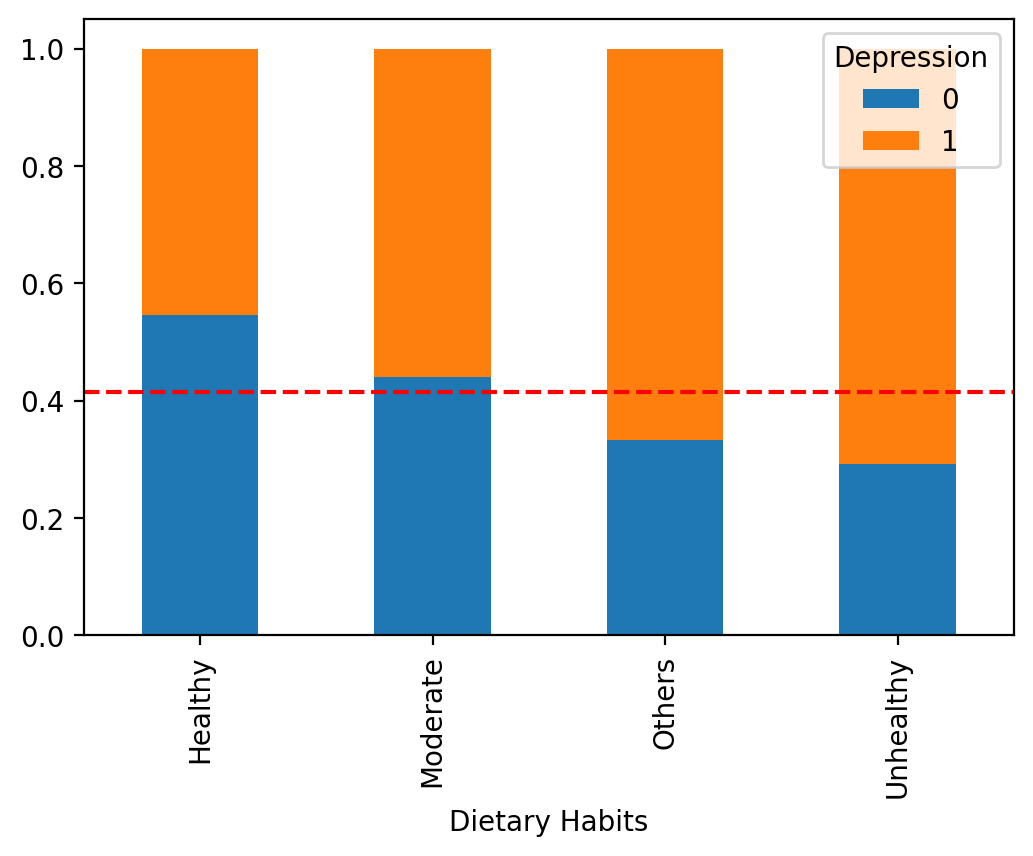

In [47]:
# 7)Dietary Habits 식습관 (범주형) -> Depression 우울증 여부 (범주형) 시각화
print(pd.crosstab(depr_df['Dietary Habits'], depr_df['Depression']))
print('-'*100)

temp = pd.crosstab(depr_df['Dietary Habits'], depr_df['Depression'], normalize='index')
print(temp)
print('-'*100)

temp.plot(kind='bar', stacked=True)
plt.axhline(1-depr_df['Depression'].mean(), color='r', linestyle='--')
plt.show()

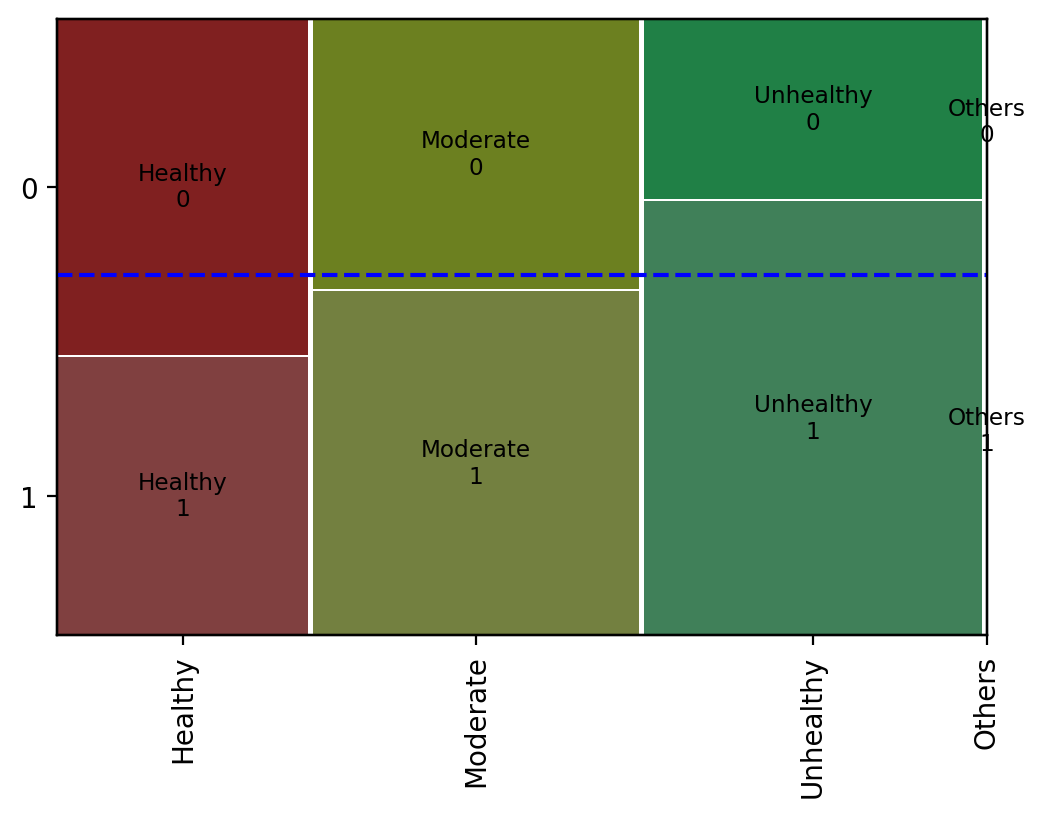

In [48]:
mosaic(depr_df, ['Dietary Habits', 'Depression'], label_rotation=(90, 0))
plt.axhline(depr_df['Depression'].mean(), color='b', linestyle='--')
plt.show()

In [49]:
# 7)Dietary Habits 식습관 (범주형) -> Depression 우울증 여부 (범주형) 수치화 / 카이제곱 검정
table = pd.crosstab(depr_df['Dietary Habits'], depr_df['Depression'])
result = spst.chi2_contingency(table)
print("카이제곱 통계량: ", result[0])
print("P-value: ", f'{result[1]:.30f}')
print("자유도: ", result[2])

카이제곱 통계량:  1203.3463800998284
P-value:  0.000000000000000000000000000000
자유도:  3


🤔 Dietary Haibts 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 카이제곱 통계량의 p-value가 0.0으로, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.
- 건강하지 않은 식습관을 가질수록 우울증이 많아 보이네요..

### 8)Degree 학위명 (범주형) -> Depression 우울증 여부 (범주형)

Depression     0     1
Degree                
'Class 12'  1771  4294
B.Arch       607   871
B.Com        652   853
B.Ed         845  1018
B.Pharm      382   428
B.Tech       497   655
BA           277   321
BBA          288   407
BCA          614   817
BE           278   333
BHM          415   509
BSc          363   523
LLB          314   355
LLM          222   259
M.Com        344   390
M.Ed         404   414
M.Pharm      268   314
M.Tech       500   521
MA           254   290
MBA          259   302
MBBS         291   403
MCA          485   558
MD           272   298
ME            87    98
MHM           92    99
MSc          510   678
Others        14    21
PhD          234   286
----------------------------------------------------------------------------------------------------
Depression         0         1
Degree                        
'Class 12'  0.292003  0.707997
B.Arch      0.410690  0.589310
B.Com       0.433223  0.566777
B.Ed        0.453570  0.546430
B.Pharm     0.471605  0

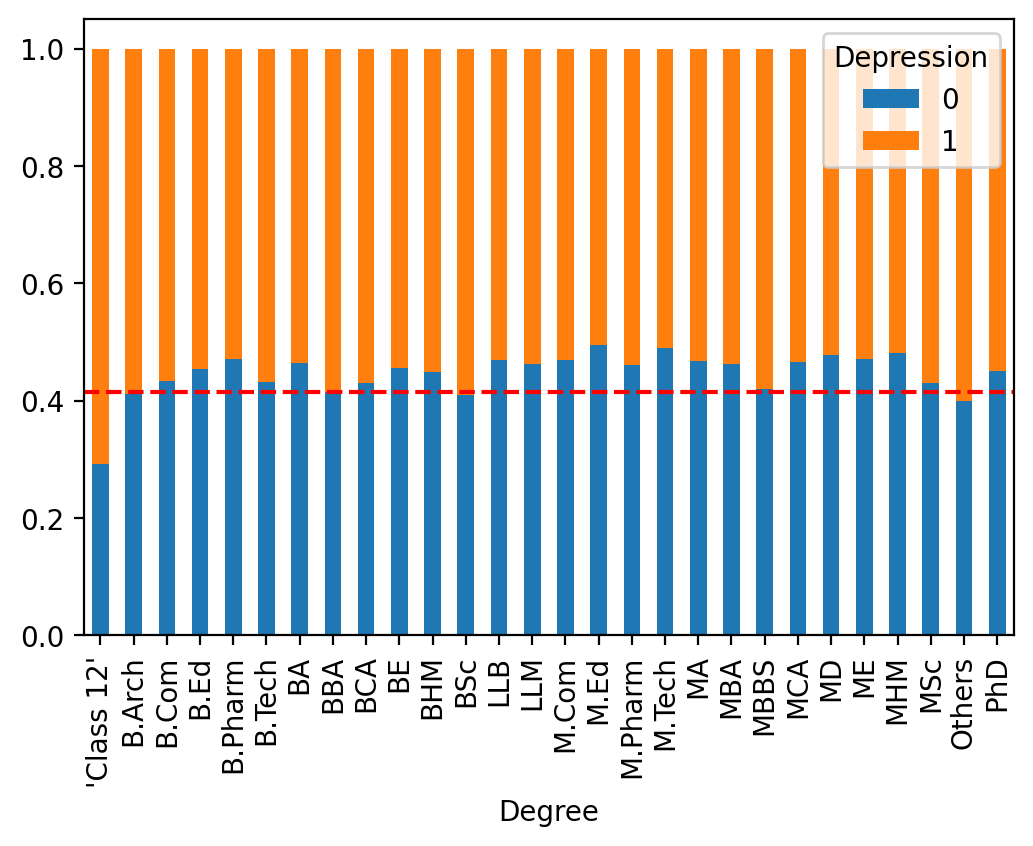

In [50]:
# 8)Degree 학위명 (범주형) -> Depression 우울증 여부 (범주형) 시각화
print(pd.crosstab(depr_df['Degree'], depr_df['Depression']))
print('-'*100)

temp = pd.crosstab(depr_df['Degree'], depr_df['Depression'], normalize='index')
print(temp)
print('-'*100)

temp.plot(kind='bar', stacked=True)
plt.axhline(1-depr_df['Depression'].mean(), color='r', linestyle='--')
plt.show()

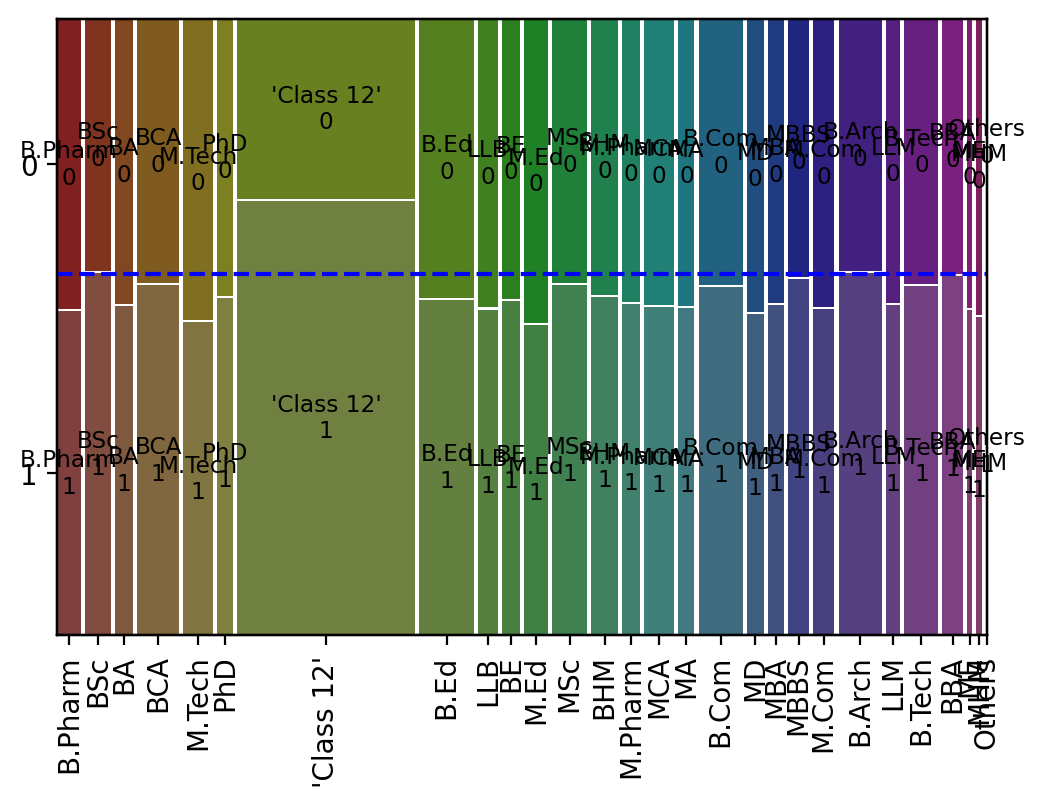

In [51]:
mosaic(depr_df, ['Degree', 'Depression'], label_rotation=(90, 0))
plt.axhline(depr_df['Depression'].mean(), color='b', linestyle='--')
plt.show()

In [52]:
# 8)Degree 학위명 (범주형) -> Depression 우울증 여부 (범주형) 수치화 / 카이제곱 검정
table = pd.crosstab(depr_df['Degree'], depr_df['Depression'])
result = spst.chi2_contingency(table)
print("카이제곱 통계량: ", result[0])
print("P-value: ", f'{result[1]:.30f}')
print("자유도: ", result[2])

카이제곱 통계량:  530.1319563135166
P-value:  0.000000000000000000000000000000
자유도:  27


🤔 Degree 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 카이제곱 통계량의 p-value가 0.0으로, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.
- 여러가지 학위 종류에 따라서는 비슷한 분포를 보이지만, 'Class 12'(고등학교 졸업 수준)은 우울증 빈도가 더 높아보입니다.

### 9)Have you ever had suicidal thoughts ? 자살 생각 여부 (범주형) -> Depression 우울증 여부 (범주형)

Depression                                0      1
Have you ever had suicidal thoughts ?             
No                                     7851   2374
Yes                                    3688  13941
----------------------------------------------------------------------------------------------------
Depression                                    0         1
Have you ever had suicidal thoughts ?                    
No                                     0.767824  0.232176
Yes                                    0.209201  0.790799
----------------------------------------------------------------------------------------------------


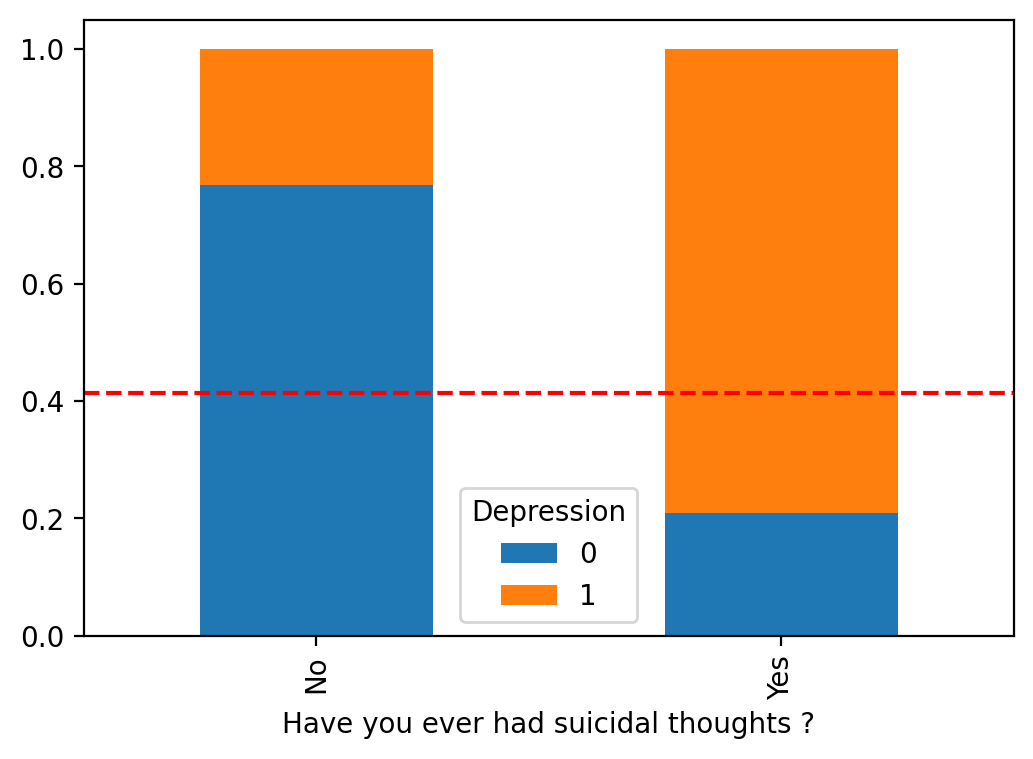

In [53]:
# 9)Have you ever had suicidal thoughts ? 자살 생각 여부 (범주형) -> Depression 우울증 여부 (범주형) 시각화
print(pd.crosstab(depr_df['Have you ever had suicidal thoughts ?'], depr_df['Depression']))
print('-'*100)

temp = pd.crosstab(depr_df['Have you ever had suicidal thoughts ?'], depr_df['Depression'], normalize='index')
print(temp)
print('-'*100)

temp.plot(kind='bar', stacked=True)
plt.axhline(1-depr_df['Depression'].mean(), color='r', linestyle='--')
plt.show()

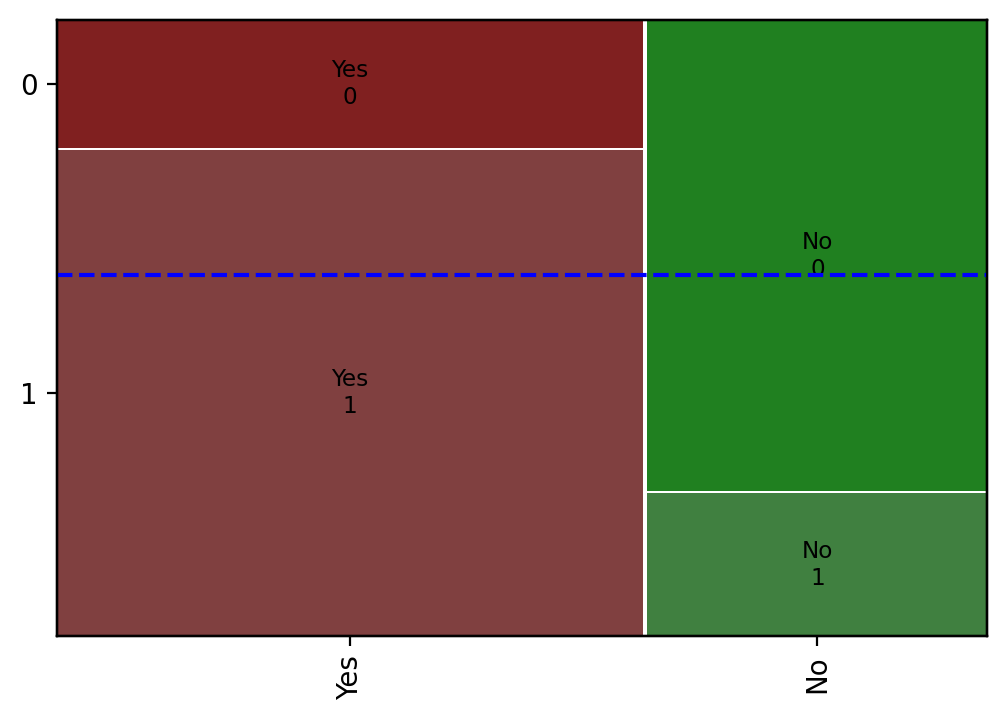

In [54]:
mosaic(depr_df, ['Have you ever had suicidal thoughts ?', 'Depression'], label_rotation=(90, 0))
plt.axhline(depr_df['Depression'].mean(), color='b', linestyle='--')
plt.show()

In [55]:
# 9)Have you ever had suicidal thoughts ? 자살 생각 여부 (범주형) -> Depression 우울증 여부 (범주형) 수치화 / 카이제곱 검정
table = pd.crosstab(depr_df['Have you ever had suicidal thoughts ?'], depr_df['Depression'])
result = spst.chi2_contingency(table)
print("카이제곱 통계량: ", result[0])
print("P-value: ", f'{result[1]:.30f}')
print("자유도: ", result[2])

카이제곱 통계량:  8320.341051758012
P-value:  0.000000000000000000000000000000
자유도:  1


🤔 Have you ever had suicidal thoughts ? 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 카이제곱 통계량의 p-value가 0.0으로, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.
- 자살 생각 여부는 우울증과 상관성이 매우 높아보입니다.

### 10)Work/Study Hours 하루 평균 업무/공부 시간 (수치형) -> Depression 우울증 여부 (범주형)

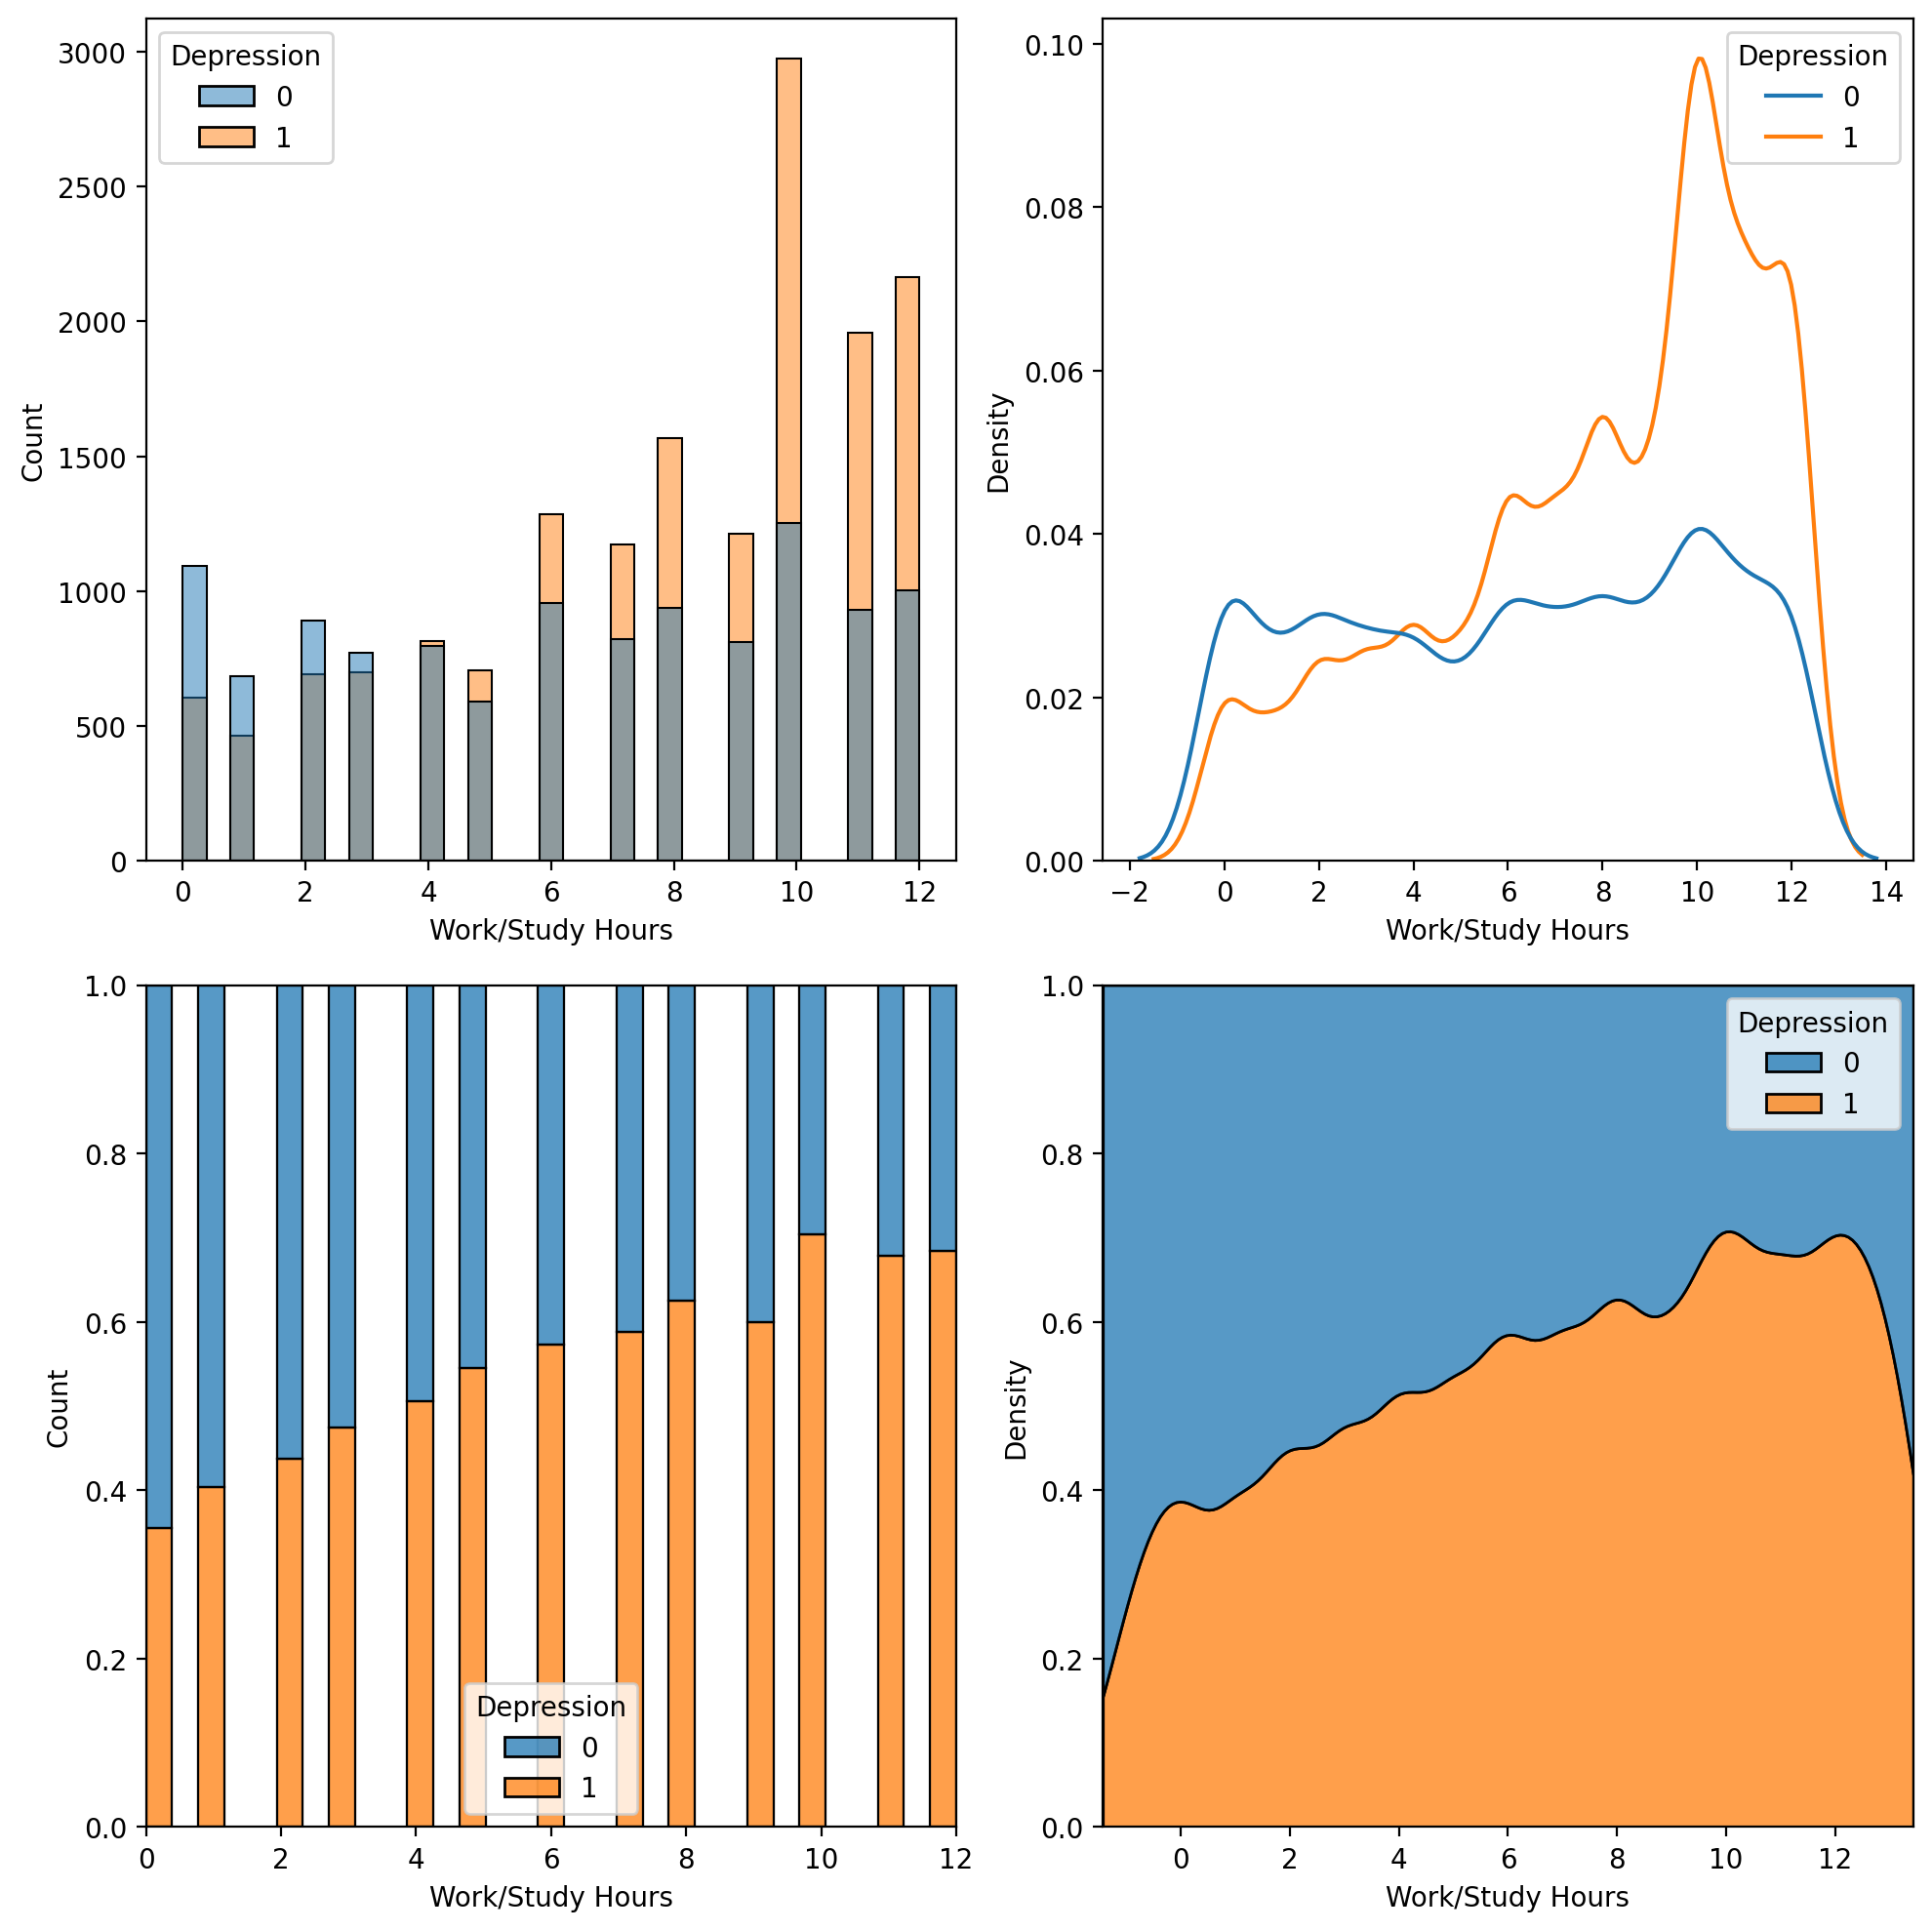

In [56]:
# 10)Work/Study Hours 하루 평균 업무/공부 시간 (수치형) -> Depression 우울증 여부 (범주형) 시각화
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.histplot(x='Work/Study Hours', hue='Depression', data=depr_df)

plt.subplot(2, 2, 2)
sns.kdeplot(x='Work/Study Hours', hue='Depression', data=depr_df)

plt.subplot(2, 2, 3)
sns.histplot(x='Work/Study Hours', hue='Depression', data=depr_df, multiple='fill')

plt.subplot(2, 2, 4)
sns.kdeplot(x='Work/Study Hours', hue='Depression', data=depr_df, multiple='fill')

plt.tight_layout()
plt.show()

In [57]:
# 10)Work/Study Hours 하루 평균 업무/공부 시간 (수치형) -> Depression 우울증 여부 (범주형) - 로지스틱 회귀모델 P-value
model = sm.Logit(depr_df['Depression'], depr_df['Work/Study Hours'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.662217
         Iterations 4
Work/Study Hours    0.0
dtype: float64


🤔 Work/Study Hours 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 시각화를 봤을 때에 공부 시간이 많을수록 우울증 여부가 더 많아보입니다.
- Logistic 회귀 분석에서도 p-value가 0.0으로 매우 낮아, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.

### 11)Financial Stress 경제적 스트레스 수준 (범주형) -> Depression 우울증 여부 (범주형)

Depression           0     1
Financial Stress            
1                 3483  1630
2                 2879  2173
3                 2140  3077
4                 1781  3987
5                 1254  5447
?                    2     1
----------------------------------------------------------------------------------------------------
Depression               0         1
Financial Stress                    
1                 0.681205  0.318795
2                 0.569873  0.430127
3                 0.410197  0.589803
4                 0.308773  0.691227
5                 0.187136  0.812864
?                 0.666667  0.333333
----------------------------------------------------------------------------------------------------


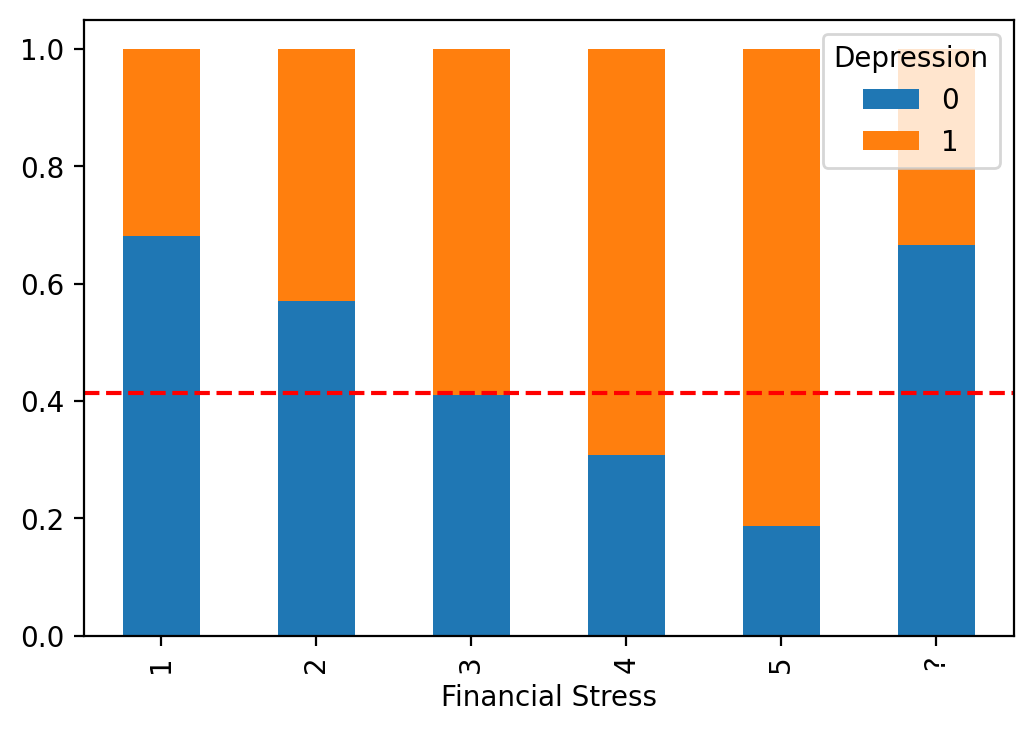

In [58]:
# 11)Financial Stress 경제적 스트레스 수준 (범주형) -> Depression 우울증 여부 (범주형) 시각화
print(pd.crosstab(depr_df['Financial Stress'], depr_df['Depression']))
print('-'*100)

temp = pd.crosstab(depr_df['Financial Stress'], depr_df['Depression'], normalize='index')
print(temp)
print('-'*100)

temp.plot(kind='bar', stacked=True)
plt.axhline(1-depr_df['Depression'].mean(), color='r', linestyle='--')
plt.show()

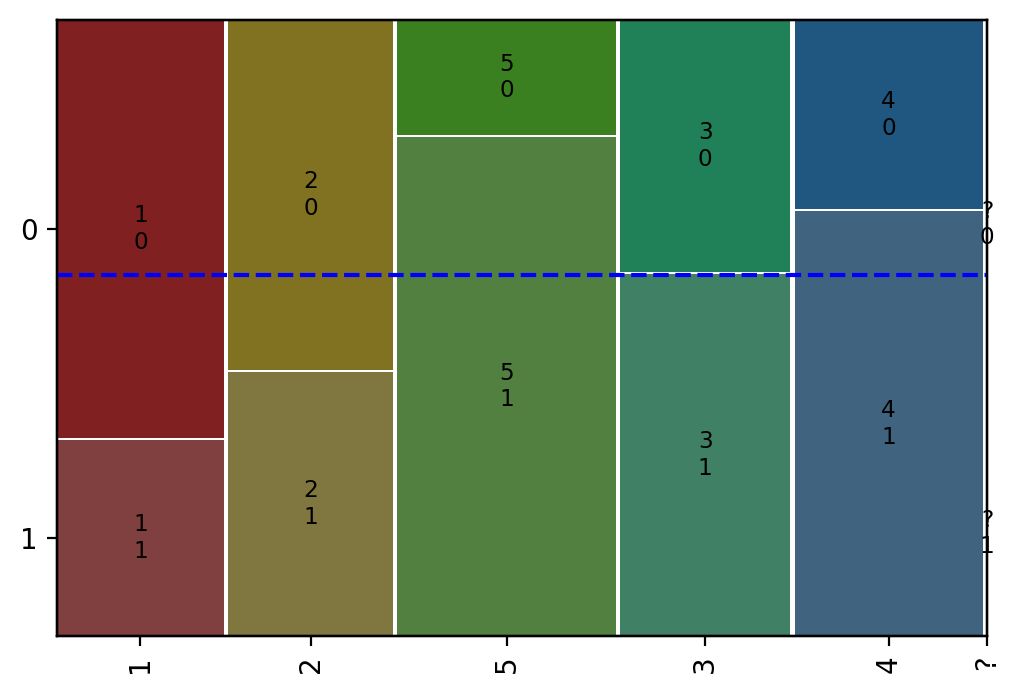

In [59]:
mosaic(depr_df, ['Financial Stress', 'Depression'], label_rotation=(90, 0))
plt.axhline(depr_df['Depression'].mean(), color='b', linestyle='--')
plt.show()

In [60]:
# 11)Financial Stress 경제적 스트레스 수준 (범주형) -> Depression 우울증 여부 (범주형) 수치화 / 카이제곱 검정
table = pd.crosstab(depr_df['Financial Stress'], depr_df['Depression'])
result = spst.chi2_contingency(table)
print("카이제곱 통계량: ", result[0])
print("P-value: ", f'{result[1]:.30f}')
print("자유도: ", result[2])

카이제곱 통계량:  3695.9433962114076
P-value:  0.000000000000000000000000000000
자유도:  5


🤔 Financial Stress 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 카이제곱 통계량의 p-value가 0.0으로, 통계적으로 강한 유의성을 가지는 변수로 확인됩니다.
- 경제적 스트레스가 높을수록 우울증과의 상관성이 뚜렷하게 관찰됩니다.

### 12)Family History of Mental Illness 가족의 정신질환 병력 여부 (범주형) -> Depression 우울증 여부 (범주형)

Depression                           0     1
Family History of Mental Illness            
No                                6321  8050
Yes                               5218  8265
----------------------------------------------------------------------------------------------------
Depression                               0         1
Family History of Mental Illness                    
No                                0.439844  0.560156
Yes                               0.387006  0.612994
----------------------------------------------------------------------------------------------------


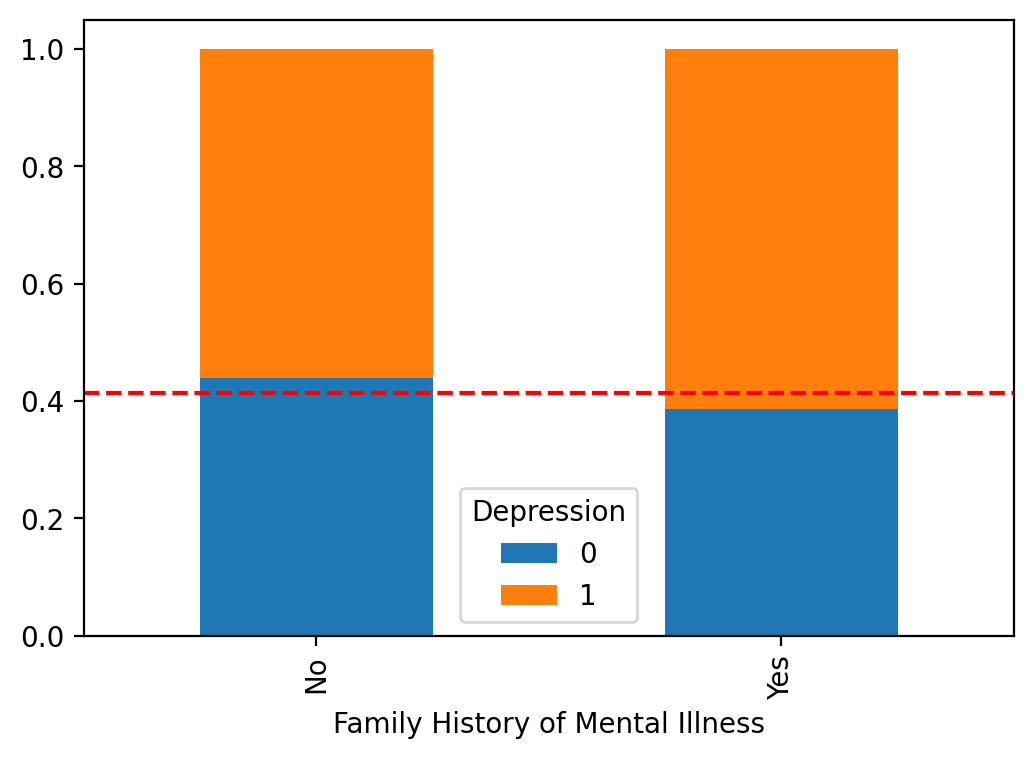

In [61]:
# 12)Family History of Mental Illness 가족의 정신질환 병력 여부 (범주형) -> Depression 우울증 여부 (범주형) 시각화
print(pd.crosstab(depr_df['Family History of Mental Illness'], depr_df['Depression']))
print('-'*100)

temp = pd.crosstab(depr_df['Family History of Mental Illness'], depr_df['Depression'], normalize='index')
print(temp)
print('-'*100)

temp.plot(kind='bar', stacked=True)
plt.axhline(1-depr_df['Depression'].mean(), color='r', linestyle='--')
plt.show()

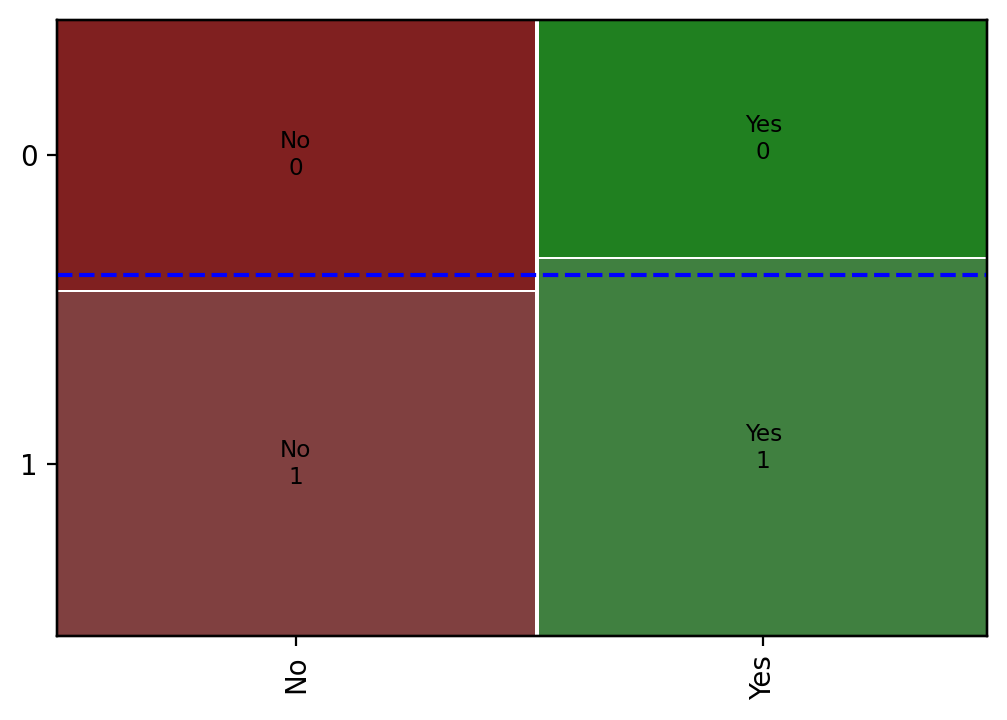

In [62]:
mosaic(depr_df, ['Family History of Mental Illness', 'Depression'], label_rotation=(90, 0))
plt.axhline(depr_df['Depression'].mean(), color='b', linestyle='--')
plt.show()

In [63]:
# 12)Family History of Mental Illness 가족의 정신질환 병력 여부 (범주형) -> Depression 우울증 여부 (범주형) 수치화 / 카이제곱 검정
table = pd.crosstab(depr_df['Family History of Mental Illness'], depr_df['Depression'])
result = spst.chi2_contingency(table)
print("카이제곱 통계량: ", result[0])
print("P-value: ", f'{result[1]}')
print("자유도: ", result[2])

카이제곱 통계량:  79.82164924507201
P-value:  4.097780788847429e-19
자유도:  1


🤔 Family History of Mental Illness 변수는 시각적·통계적 분석 결과 모두에서 종속 변수와 유의미한 관계가 있어보입니다.
- 카이제곱 통계량의 p-value가 4.09e-19로, 통계적으로 유의성을 가지는 변수로 확인됩니다.
- 가족의 정신질환 병력 여부에 따라 우울증 발생과의 유의미한 연관성이 나타납니다.

# 4.머신러닝 모델링

### (1) 머신러닝 라이브러리 Import

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

###(2)데이터 전처리

In [65]:
depr_df.head(3)

Gender  Age           City  Academic Pressure  CGPA  Study Satisfaction  \
0    Male   33  Visakhapatnam                  5  8.97                   2   
1  Female   24      Bangalore                  2  5.90                   5   
2    Male   31       Srinagar                  3  7.03                   5   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   

  Have you ever had suicidal thoughts ?  Work/Study Hours Financial Stress  \
0                                   Yes                 3                1   
1                                    No                 3                2   
2                                    No                 9                1   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0

In [66]:
# 결측치 확인
depr_df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [67]:
target = depr_df['Depression']
feature = depr_df.drop(['Depression'], axis=1)

In [68]:
obj_cols = feature.select_dtypes('object').columns
print(obj_cols)
feature = pd.get_dummies(feature, columns=obj_cols, drop_first=True, dtype=int)

Index(['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')


In [69]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27854 entries, 0 to 27900
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        27854 non-null  int64  
 1   Academic Pressure                          27854 non-null  int64  
 2   CGPA                                       27854 non-null  float64
 3   Study Satisfaction                         27854 non-null  int64  
 4   Work/Study Hours                           27854 non-null  int64  
 5   Gender_Male                                27854 non-null  int64  
 6   City_Ahmedabad                             27854 non-null  int64  
 7   City_Bangalore                             27854 non-null  int64  
 8   City_Bhopal                                27854 non-null  int64  
 9   City_Chennai                               27854 non-null  int64  
 10  City_Delhi                 

In [70]:
# 학습용, 평가용 데이터 분리
x_train, x_valid, y_train, y_valid = train_test_split(feature, target, test_size=0.2, random_state=42, stratify=target)

In [71]:
# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

###(3)머신러닝 모델링

###1) DecisionTreeClassifier

In [72]:
# DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled, y_train)
dtc_y_pred = dtc.predict(x_valid_scaled)
print(f'DecisionTreeClassifier 모델 성능 : {dtc.score(x_valid_scaled, y_valid)}')

DecisionTreeClassifier 모델 성능 : 0.7702387363130497


              precision    recall  f1-score   support

           0       0.72      0.73      0.72      2308
           1       0.81      0.80      0.80      3263

    accuracy                           0.77      5571
   macro avg       0.76      0.76      0.76      5571
weighted avg       0.77      0.77      0.77      5571



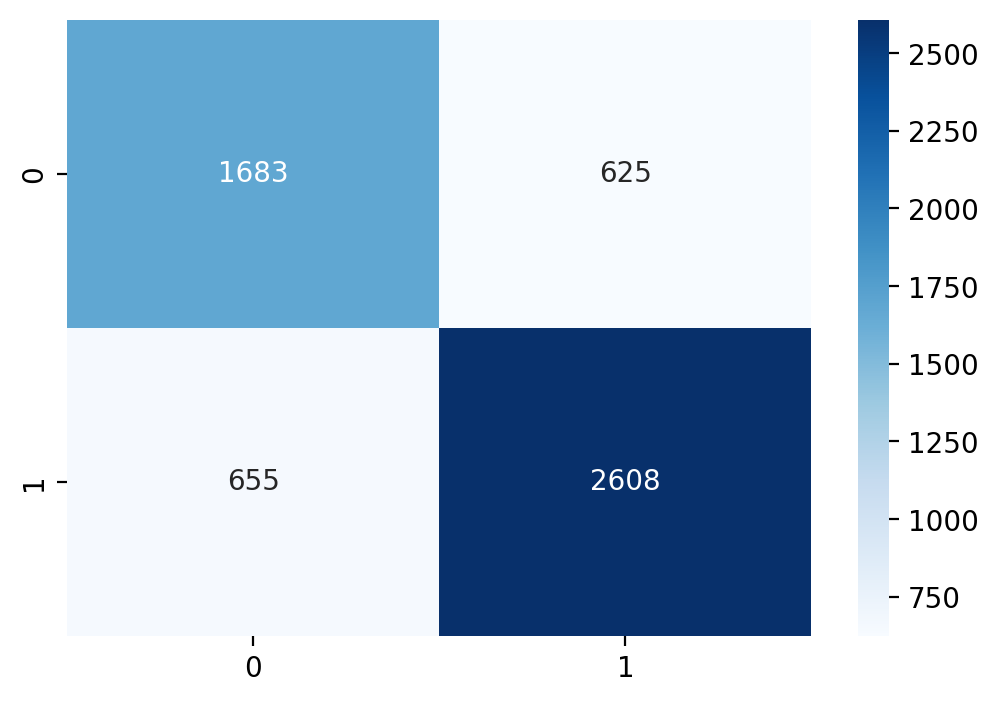

In [73]:
print(classification_report(y_valid, dtc_y_pred))
sns.heatmap(confusion_matrix(y_valid, dtc_y_pred), annot=True, fmt='d', cmap='Blues' )
plt.show()

###2) LogisticRegression

In [74]:
# LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)
lr_y_pred = lr.predict(x_valid_scaled)
print(f'LogisticRegression 모델 성능 : {lr.score(x_valid_scaled, y_valid)}')

LogisticRegression 모델 성능 : 0.846347154909352


              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2308
           1       0.86      0.88      0.87      3263

    accuracy                           0.85      5571
   macro avg       0.84      0.84      0.84      5571
weighted avg       0.85      0.85      0.85      5571



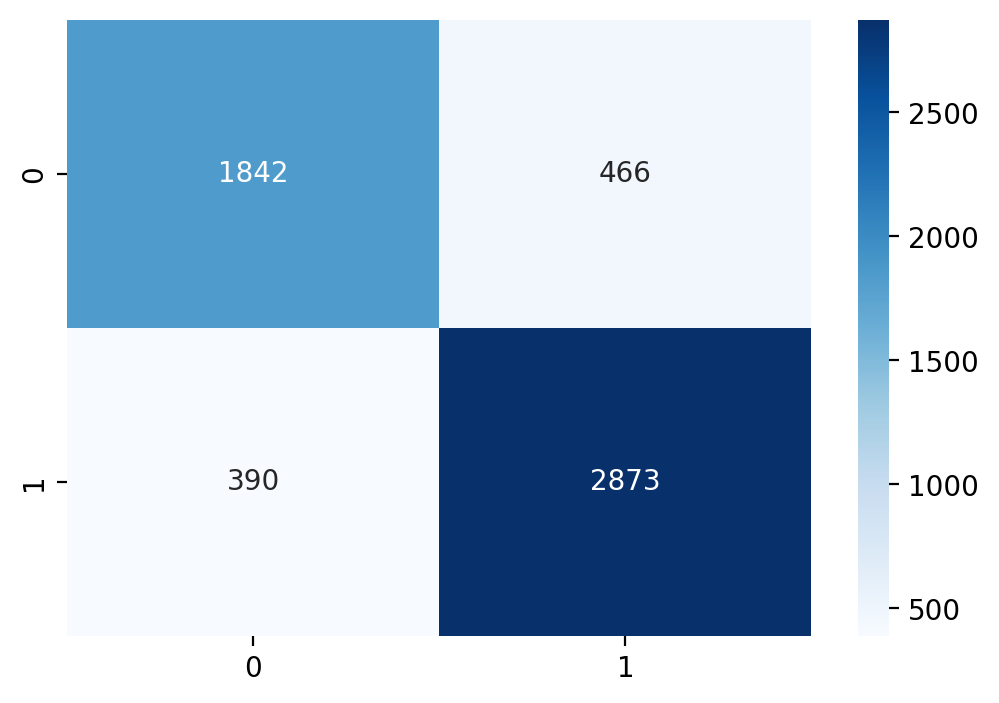

In [75]:
print(classification_report(y_valid, lr_y_pred))
sns.heatmap(confusion_matrix(y_valid, lr_y_pred), annot=True, fmt='d', cmap='Blues' )
plt.show()

###3) RandomForestClassifier

In [76]:
# RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)
rf_y_pred = rf.predict(x_valid_scaled)
print(f'RandomForestClassifier 모델 성능 : {rf.score(x_valid_scaled, y_valid)}')

RandomForestClassifier 모델 성능 : 0.8420391312152217


              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2308
           1       0.86      0.88      0.87      3263

    accuracy                           0.84      5571
   macro avg       0.84      0.84      0.84      5571
weighted avg       0.84      0.84      0.84      5571



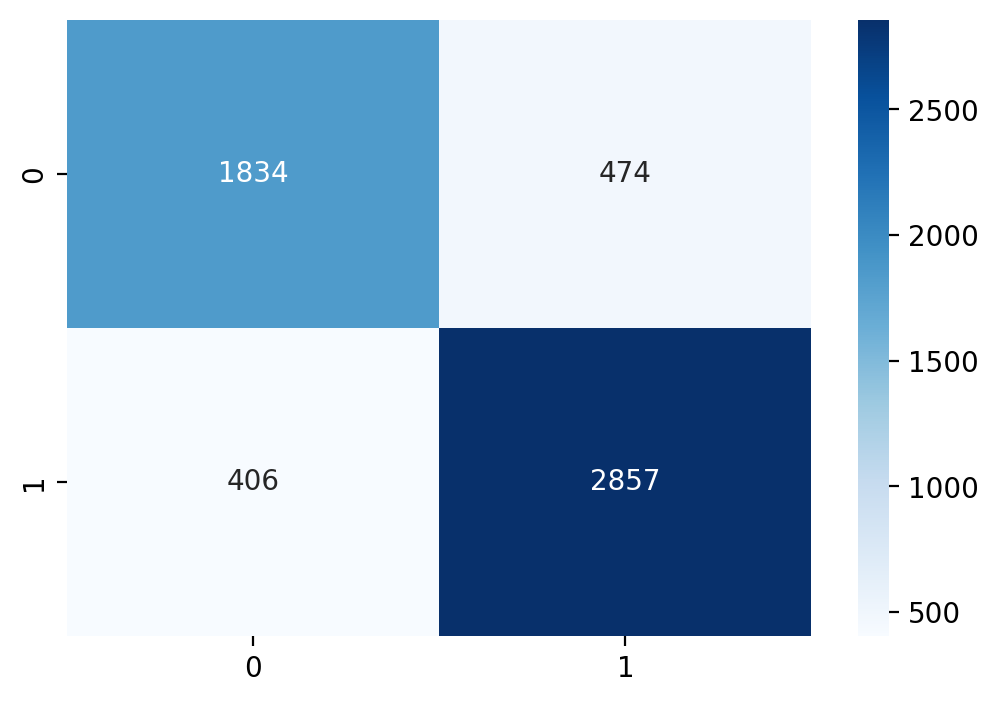

In [77]:
print(classification_report(y_valid, rf_y_pred))
sns.heatmap(confusion_matrix(y_valid, rf_y_pred), annot=True, fmt='d', cmap='Blues' )
plt.show()

# 5.특성 중요도

In [78]:
# 특성 중요도 추출
importances = rf.feature_importances_

# 각 특성 이름과 중요도를 DataFrame으로 정리
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))  # 상위 10개 확인

                                      Feature  Importance
69  Have you ever had suicidal thoughts ?_Yes    0.197827
1                           Academic Pressure    0.154706
0                                         Age    0.075926
2                                        CGPA    0.069091
4                            Work/Study Hours    0.064658
73                         Financial Stress_5    0.042151
3                          Study Satisfaction    0.041225
41                   Dietary Habits_Unhealthy    0.022426
72                         Financial Stress_4    0.016280
5                                 Gender_Male    0.015090


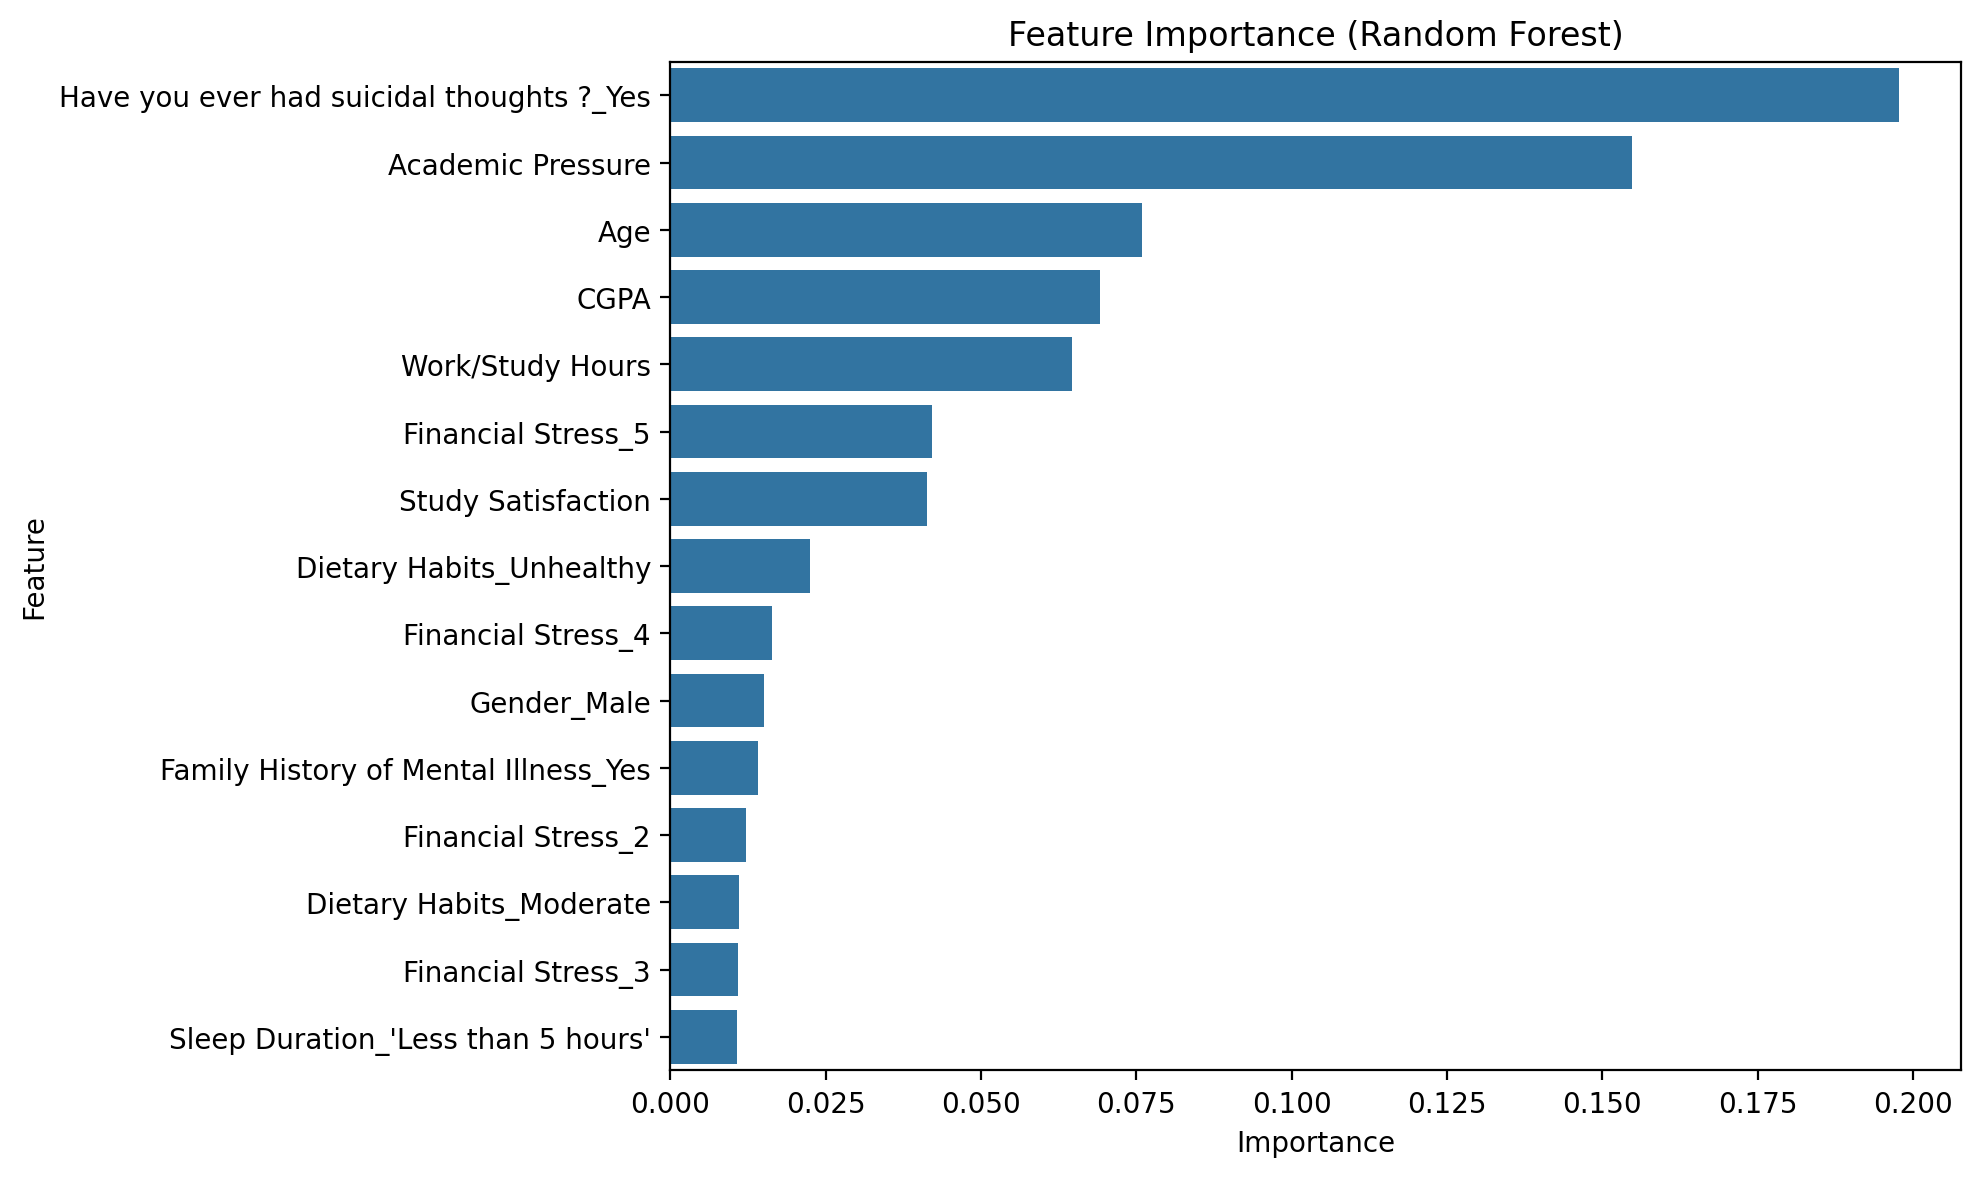

In [79]:
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))  # 상위 15개
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

🤔 depression 특성 중요도

1) 우울증 예측에 가장 영향력 있는 변수
Have you ever had suicidal thoughts ?_Yes (0.195)
→ 자살 충동을 느낀 적이 있는지는 우울증 여부에 매우 큰 영향을 미치는 변수로 확인됨.
이는 직관적으로도 타당하며, 자살 충동은 임상적으로도 심각한 우울 상태와 높은 상관관계를 보이는 지표임.

2) 주요 정신적 요인
Academic Pressure (0.157)
→ 학업 스트레스 수준이 높은 경우, 우울증과 밀접하게 연결됨.
이는 특히 학생이 주요 대상인 데이터 특성과도 일치. 학교나 교육 환경에서 정신 건강 관리의 필요성을 시사.

3) 인적 특성과 생활 습관
Age (0.076)
→ 젊은 연령대에서 우울증 빈도가 상대적으로 높게 나타남. 10대 후반~30대 초반 집중.

CGPA (0.068)
→ 학업 성적도 일정한 영향을 주는 요소로 보이며, 낮은 성적이 스트레스 요인으로 작용할 가능성 존재.

Study Satisfaction (0.041)
→ 학업에 대한 만족도 역시 심리 상태에 영향. 만족도가 낮을수록 우울 경향 증가.

4) 생활 패턴과 스트레스 요인
Work/Study Hours (0.065)
→ 과도한 업무/학습 시간은 정신적 피로 누적을 야기하며 우울증 유발 가능성 증가.

Financial Stress_5 (0.041)
→ **경제적 스트레스가 가장 높은 수준(5)**일 때, 우울증과 높은 상관성 존재.
→ 소득 불안정, 학비 부담 등의 금전적 요소도 심리적 건강에 큰 영향을 미침.

5) 부차적 요인들
Dietary Habits_Unhealthy (0.023)
→ 불규칙하거나 건강하지 못한 식습관 역시 일정한 영향을 미침.

Gender_Male (0.014)
→ 성별은 다소 낮은 중요도를 보였으며, 이번 데이터에선 크게 유의미한 영향은 아님.

🤔 전체 인사이트 요약
정신적 요인(자살 충동, 학업 스트레스)이 우울증 예측에 가장 큰 영향을 주며, 생활습관, 경제적 요인, 나이 등도 복합적으로 작용하고 있음.

# 6.전체 인사이트 요약

🤔 전체 인사이트 요약
- 정신적 요인(자살 충동, 학업 스트레스)이 우울증 예측에 가장 큰 영향을 주며, 생활습관, 경제적 요인, 나이 등도 복합적으로 작용하고 있음.
----------------------------------------------------------------------------
학생들을 대상으로 한 이 데이터에서, 우울증 여부를 결정짓는 가장 중요한 요인은 예상대로 자살 충동 여부였다. 단순한 스트레스가 아닌, 극단적인 선택을 고민한 경험은 명백히 정신 건강에 직접적인 위험 요소라는 점을 다시금 확인할 수 있었다.

그 뒤를 이은 학업 스트레스와 낮은 학업 만족도, 그리고 과도한 공부/일 시간은 하나의 패턴처럼 엮여 있었다. 이는 단순히 성적을 잘 받는 문제가 아닌, 학업을 어떻게 받아들이고 있는지, 그 과정에서 스스로를 얼마나 몰아붙이고 있는지가 우울에 미치는 영향이 크다는 것을 시사한다.

또한, 경제적 스트레스가 최고 수준일 때, 다른 어떤 범주보다 우울증 비율이 높게 나타났다. 학비, 생계, 진로 등 미래에 대한 불안이 극심한 경우, 정신 건강이 위협받는 구조임을 보여준다.

재미있게도, 식습관이나 성별은 상대적으로 영향력이 낮았다. 특히 성별은 일부에서는 주요 변수로 인식되지만, 이 데이터에선 다른 요인에 비해 큰 차이를 만들지 못했다. 이 역시 '정서적 문제는 외부 환경에 크게 반응한다'는 것을 다시 확인시켜주는 대목이다.

